# Data Preparation



---
In this part, data is loaded and explotary data analysis is conducted. Dataset contains 11 columns however "customer_sentiment" and "conversation" columns will be used in this assignment. <br>

Distribution of customer sentiment is imbalanced. There are 542 neutral, 411 negative and 17 positive instances in the dataset. There seems to be a negative correlation between experience level and customer sentiment. There is a balanced relationship between customer sentiment and issue complexity. Bar plots can be found below.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("/content/train.csv")
test_data_ = pd.read_csv("/content/test.csv")

train_data.shape, test_data_.shape

((970, 11), (30, 11))

In [ ]:
train_data.head(1)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...


In [ ]:
def generate_bar_plot(column_name1, column_name2, stacked):
  if stacked:
    plt.figure(figsize=(12, 6))
    sentiment_experience_crosstab = pd.crosstab(train_data[column_name1], train_data[column_name2])
    sentiment_experience_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'{column_name2} by {column_name1}')
    plt.xlabel(column_name1)
    plt.ylabel('Count')
    plt.legend(title=column_name2)
    plt.show()
  else:
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
    sns.countplot(data=train_data, x=column_name1, order = train_data[column_name1].value_counts().index)
    plt.title(f'Distribution of {column_name1}')
    plt.xlabel(column_name1)
    plt.ylabel('Count')
    plt.show()

In [ ]:
train_data["customer_sentiment"].value_counts()

neutral     542
negative    411
positive     17
Name: customer_sentiment, dtype: int64

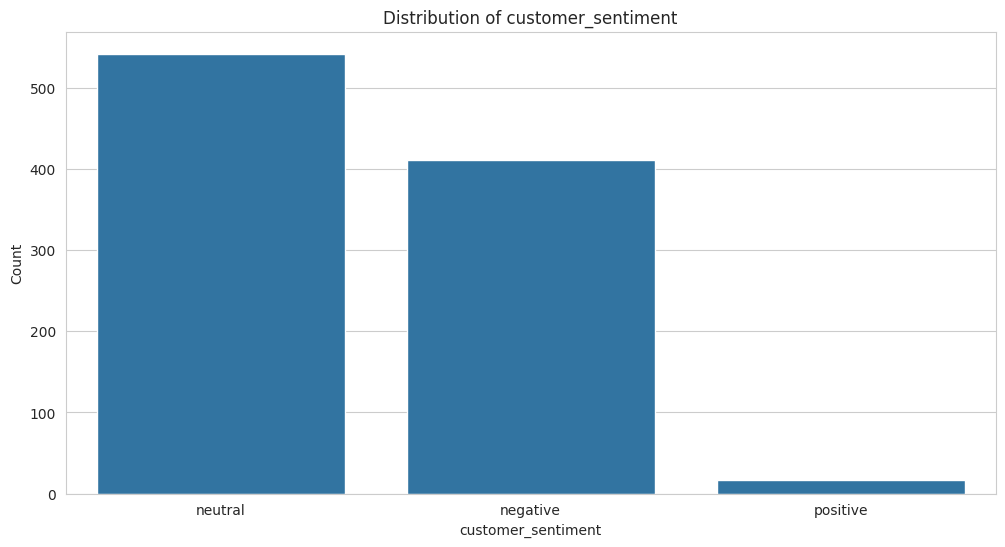

<Figure size 1200x600 with 0 Axes>

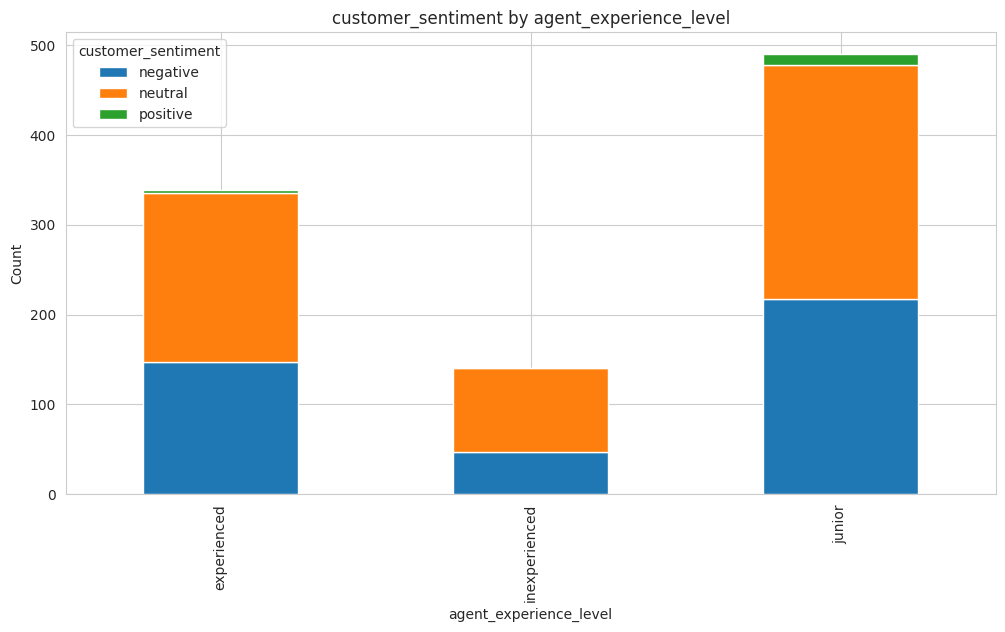

<Figure size 1200x600 with 0 Axes>

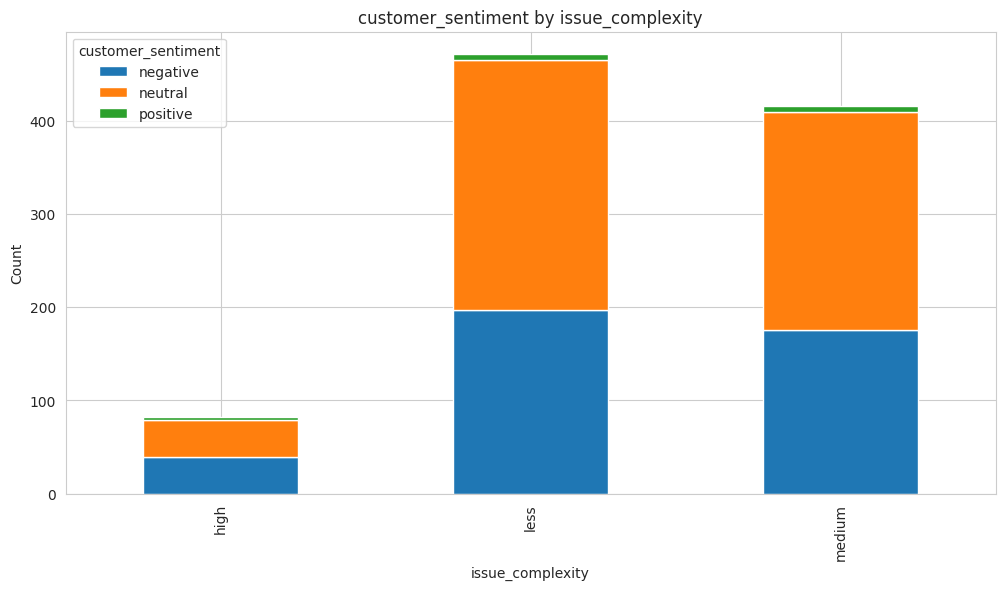

In [ ]:
generate_bar_plot("customer_sentiment","", False)
generate_bar_plot("agent_experience_level","customer_sentiment", True)
generate_bar_plot("issue_complexity","customer_sentiment", True)

# Data Preprocessing

---

In this part, functions for removing punctuation, stop words, numbers and word lemmatizer functions are used. I mapped the sentiments as 0, 1, 2 which corresponds to 'negative', 'neutral', 'positive' respectively. I used all the text in the "conservation" column. However, I applied some transformation and preprocessing steps.


*   I removed the punctuations such as "!,%,# etc.",
*   I make all the letters as lowercase.
*   I removed the stop words such as "the, and, is etc." which does not contribute to the model much.
*   I applied word level lematizer.
*   I removed all the digits which does not contribute to the model.

I applied all these steps or both train, validation and test sets. The first data before and after the preprocessing steps for test data can be found below.




In [3]:
!pip install tiktoken

In [4]:
import tiktoken
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import RegexpTokenizer, stopwords
# Remove Punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

# Remove Stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

def word_lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(x) for x in text]

def remove_numbers(text):
    return [x for x in text if not x.isdigit()]

In [5]:
!pip install nltk

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Filter the dataset to keep only 'customer_sentiment' and 'conversation'
data_filtered = train_data[['customer_sentiment', 'conversation']]

# Encode 'customer_sentiment' to numeric values
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
data_filtered['customer_sentiment'] = data_filtered['customer_sentiment'].map(sentiment_mapping)
data_filtered = data_filtered.loc[:,["customer_sentiment","conversation"]].copy()


data_filtered["conversation"] = data_filtered["conversation"].apply(lambda x: remove_punctuation(x))
tokenizer = RegexpTokenizer(r'\w+')
#df["conversation"] = df["conversation"].apply(lambda x: tokenizer.tokenize(x.lower()))
data_filtered["conversation"] = data_filtered["conversation"].apply(lambda x: tokenizer.tokenize(x.lower()))
data_filtered["conversation"] = data_filtered["conversation"].apply(lambda x: remove_stopwords(x))
data_filtered["conversation"] = data_filtered["conversation"].apply(lambda x: word_lemmatizer(x))
data_filtered["conversation"] = data_filtered["conversation"].apply(lambda x: remove_numbers(x))
data_filtered["conversation"] = data_filtered["conversation"].apply(lambda x: " ".join(x))

# Show the modified dataframe and check for null values
data_filtered.head(), data_filtered.isnull().sum()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-6-8cb43378d474>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['customer_sentiment'] = data_filtered['customer_sentiment'].map(sentiment_mapping)


(   customer_sentiment                                       conversation
 0                   1  agent thank calling brownbox customer support ...
 1                   1  agent thank calling brownbox customer support ...
 2                   1  agent thank calling brownbox customer support ...
 3                   1  customer hi facing issue logging account getti...
 4                   0  agent thank contacting brownbox customer suppo...,
 customer_sentiment    0
 conversation          0
 dtype: int64)

In [7]:
# Filter the dataset to keep only 'customer_sentiment' and 'conversation'
test_data = test_data_[['customer_sentiment', 'conversation']]

# Encode 'customer_sentiment' to numeric values
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
test_data['customer_sentiment'] = test_data['customer_sentiment'].map(sentiment_mapping)
test_data = test_data.loc[:,["customer_sentiment","conversation"]].copy()


test_data["conversation"] = test_data["conversation"].apply(lambda x: remove_punctuation(x))

tokenizer = RegexpTokenizer(r'\w+')
#df["conversation"] = df["conversation"].apply(lambda x: tokenizer.tokenize(x.lower()))

test_data["conversation"] = test_data["conversation"].apply(lambda x: tokenizer.tokenize(x.lower()))
test_data["conversation"] = test_data["conversation"].apply(lambda x: remove_stopwords(x))
test_data["conversation"] = test_data["conversation"].apply(lambda x: word_lemmatizer(x))
test_data["conversation"] = test_data["conversation"].apply(lambda x: remove_numbers(x))
test_data["conversation"] = test_data["conversation"].apply(lambda x: " ".join(x))


# Show the modified dataframe and check for null values
test_data.head(), test_data.isnull().sum()

<ipython-input-7-ad2be9bbc94f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['customer_sentiment'] = test_data['customer_sentiment'].map(sentiment_mapping)


(   customer_sentiment                                       conversation
 0                   0  agent thank calling brownbox customer support ...
 1                   0  agent thank calling brownbox customer support ...
 2                   0  agent thank calling brownbox customer support ...
 3                   0  agent thank calling brownbox customer support ...
 4                   0  agent thank calling brownbox customer support ...,
 customer_sentiment    0
 conversation          0
 dtype: int64)

In [1]:
test_data_['conversation'][0], test_data['conversation'][0]

NameError: name 'test_data_' is not defined

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_data, val_data = train_test_split(data_filtered, test_size=0.2, random_state=42)

# Display the shapes of the training and validation datasets to confirm the split
train_data.shape, val_data.shape

((776, 2), (194, 2))

# DataLoader

---

Rather than taking the inputs as .bin file, I created a DataLoader for train, val and test splits. This way, there is no need to run another script to generate .bin files, datas can be sent to the model on the fly. To apply these changes, there are changes made in the train script and the model. These changes will be explained in the corresponding parts. <br>

I used GPT2Tokenizer and used max_length padding. This way, each embedding will be padded to the maximum embedding length. Also, I added an EOS token after each embedding. There are 3 outputs in the embeddings. 'input_ids', 'attention_mask' and 'labels'. Eventhough attention_mask is not used in this model I included that part. I created iterators for the datas before giving it to the model.

In [9]:
from torch.utils.data import Dataset, DataLoader
from transformers import GPT2Tokenizer

class ConversationDataset(Dataset):
    def __init__(self, conversations, sentiments, tokenizer, max_length=512):
        self.conversations = conversations
        self.sentiments = sentiments
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.conversations)

    def __getitem__(self, idx):
        conversation = self.conversations[idx]
        sentiment = self.sentiments[idx]

        # Encode conversation text
        encoding = self.tokenizer.encode_plus(
            conversation,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(sentiment, dtype=torch.long)
        }

# Initialize tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Use the EOS token as the pad token
tokenizer.pad_token = tokenizer.eos_token

# Load dataset
train_dataset = ConversationDataset(train_data['conversation'].tolist(), train_data['customer_sentiment'].tolist(), tokenizer)
val_dataset = ConversationDataset(val_data['conversation'].tolist(), val_data['customer_sentiment'].tolist(), tokenizer)
test_dataset = ConversationDataset(test_data['conversation'].tolist(), test_data['customer_sentiment'].tolist(), tokenizer)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# GPT Model From Scratch

---

To apply sentiment analysis, I need to change the model structure. I made two main changes in the GPT class:


1.   Add a Linear layer at the output of the model which is responsible for classification.
2.   Change the forward method to do sentiment analysis. I added the classification layer after the final layer. This classification layer takes mean values of all of the heads. I tried using only the last embedding layer however, using mean values increases the model performance. <br>

I haven't changed values in the config file, my parameters are: <br>


```
    block_size: int = 1024
    vocab_size: int = 50304 # GPT-2 vocab_size of 50257, padded up to nearest multiple of 64 for efficiency
    n_layer: int = 12
    n_head: int = 12
    n_embd: int = 768
    dropout: float = 0.0
    bias: bool = True
```





In [16]:
"""
Full definition of a GPT Language Model, all of it in this single file.
References:
1) the official GPT-2 TensorFlow implementation released by OpenAI:
https://github.com/openai/gpt-2/blob/master/src/model.py
2) huggingface/transformers PyTorch implementation:
https://github.com/huggingface/transformers/blob/main/src/transformers/models/gpt2/modeling_gpt2.py
"""

import math
import inspect
from dataclasses import dataclass

import torch
import torch.nn as nn
from torch.nn import functional as F

class LayerNorm(nn.Module):
    """ LayerNorm but with an optional bias. PyTorch doesn't support simply bias=False """

    def __init__(self, ndim, bias):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(ndim))
        self.bias = nn.Parameter(torch.zeros(ndim)) if bias else None

    def forward(self, input):
        return F.layer_norm(input, self.weight.shape, self.weight, self.bias, 1e-5)

class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd, bias=config.bias)
        # regularization
        self.attn_dropout = nn.Dropout(config.dropout)
        self.resid_dropout = nn.Dropout(config.dropout)
        self.n_head = config.n_head
        self.n_embd = config.n_embd
        self.dropout = config.dropout
        # flash attention make GPU go brrrrr but support is only in PyTorch >= 2.0
        self.flash = hasattr(torch.nn.functional, 'scaled_dot_product_attention')
        if not self.flash:
            print("WARNING: using slow attention. Flash Attention requires PyTorch >= 2.0")
            # causal mask to ensure that attention is only applied to the left in the input sequence
            self.register_buffer("bias", torch.tril(torch.ones(config.block_size, config.block_size))
                                        .view(1, 1, config.block_size, config.block_size))

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)

        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        q, k, v  = self.c_attn(x).split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)

        # causal self-attention; Self-attend: (B, nh, T, hs) x (B, nh, hs, T) -> (B, nh, T, T)
        if self.flash:
            # efficient attention using Flash Attention CUDA kernels
            y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)
        else:
            # manual implementation of attention
            att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
            att = att.masked_fill(self.bias[:,:,:T,:T] == 0, float('-inf'))
            att = F.softmax(att, dim=-1)
            att = self.attn_dropout(att)
            y = att @ v # (B, nh, T, T) x (B, nh, T, hs) -> (B, nh, T, hs)
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side

        # output projection
        y = self.resid_dropout(self.c_proj(y))
        return y

class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd, bias=config.bias)
        self.gelu    = nn.GELU()
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd, bias=config.bias)
        self.dropout = nn.Dropout(config.dropout)

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        x = self.dropout(x)
        return x

class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = LayerNorm(config.n_embd, bias=config.bias)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = LayerNorm(config.n_embd, bias=config.bias)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x

@dataclass
class GPTConfig:
    block_size: int = 1024
    vocab_size: int = 50304 # GPT-2 vocab_size of 50257, padded up to nearest multiple of 64 for efficiency
    n_layer: int = 12
    n_head: int = 12
    n_embd: int = 768
    dropout: float = 0.0
    bias: bool = True # True: bias in Linears and LayerNorms, like GPT-2. False: a bit better and faster

class GPT(nn.Module):

    def __init__(self, config):

        super().__init__()
        self.config = config
        self.transformer = nn.ModuleDict({
            'wte': nn.Embedding(config.vocab_size, config.n_embd),
            'wpe': nn.Embedding(config.block_size, config.n_embd),
            'drop': nn.Dropout(config.dropout),
            'h': nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            'ln_f': LayerNorm(config.n_embd, bias=config.bias)
        })
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)
        self.transformer.wte.weight = self.lm_head.weight

        # Classification head
        self.classifier = nn.Linear(config.n_embd, 3)  # Output layer for three sentiment classes

        self.apply(self._init_weights)

        # report number of parameters
        print("number of parameters: %.2fM" % (self.get_num_params()/1e6,))

    def get_num_params(self, non_embedding=True):
        """
        Return the number of parameters in the model.
        For non-embedding count (default), the position embeddings get subtracted.
        The token embeddings would too, except due to the parameter sharing these
        params are actually used as weights in the final layer, so we include them.
        """
        n_params = sum(p.numel() for p in self.parameters())
        if non_embedding:
            n_params -= self.transformer.wpe.weight.numel()
        return n_params

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):

        device = idx.device
        b, t = idx.size()
        assert t <= self.config.block_size, f"Cannot forward sequence of length {t}, block size is only {self.config.block_size}"
        pos = torch.arange(0, t, dtype=torch.long, device=device) # shape (t)

        # forward the GPT model itself
        tok_emb = self.transformer.wte(idx) # token embeddings of shape (b, t, n_embd)
        pos_emb = self.transformer.wpe(pos) # position embeddings of shape (t, n_embd)
        x = self.transformer.drop(tok_emb + pos_emb)
        for block in self.transformer.h:
            x = block(x)
        x = self.transformer.ln_f(x)
        # x[:, -1]
        logits = self.classifier(x.mean(dim=1) )
        loss = None
        if targets is not None:
            # if we are given some desired targets also calculate the loss
            #logits = self.lm_head(x)
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1), ignore_index=-1)

        #else:
            # inference-time mini-optimization: only forward the lm_head on the very last position
            #logits = self.lm_head(x[:, [-1], :]) # note: using list [-1] to preserve the time dim
            #loss = None

        return logits, loss
        '''
        tok_emb = self.transformer.wte(idx)
        pos_emb = self.transformer.wpe(torch.arange(idx.size(1), device=idx.device))
        x = self.transformer.drop(tok_emb + pos_emb)
        for block in self.transformer.h:
            x = block(x)
        x = self.transformer.ln_f(x)

        # Use only the last token's output for classification
        logits = self.classifier(x[:, -1])

        if targets is not None:
            loss_fn = torch.nn.CrossEntropyLoss()
            loss = loss_fn(logits, targets)
            return logits, loss
        return logits
        '''

    def crop_block_size(self, block_size):
        # model surgery to decrease the block size if necessary
        # e.g. we may load the GPT2 pretrained model checkpoint (block size 1024)
        # but want to use a smaller block size for some smaller, simpler model
        assert block_size <= self.config.block_size
        self.config.block_size = block_size
        self.transformer.wpe.weight = nn.Parameter(self.transformer.wpe.weight[:block_size])
        for block in self.transformer.h:
            if hasattr(block.attn, 'bias'):
                block.attn.bias = block.attn.bias[:,:,:block_size,:block_size]

    @classmethod
    def from_pretrained(cls, model_type, override_args=None):
        assert model_type in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        override_args = override_args or {} # default to empty dict
        # only dropout can be overridden see more notes below
        assert all(k == 'dropout' for k in override_args)
        from transformers import GPT2LMHeadModel
        print("loading weights from pretrained gpt: %s" % model_type)

        # n_layer, n_head and n_embd are determined from model_type
        config_args = {
            'gpt2':         dict(n_layer=12, n_head=12, n_embd=768),  # 124M params
            'gpt2-medium':  dict(n_layer=24, n_head=16, n_embd=1024), # 350M params
            'gpt2-large':   dict(n_layer=36, n_head=20, n_embd=1280), # 774M params
            'gpt2-xl':      dict(n_layer=48, n_head=25, n_embd=1600), # 1558M params
        }[model_type]
        print("forcing vocab_size=50257, block_size=1024, bias=True")
        config_args['vocab_size'] = 50257 # always 50257 for GPT model checkpoints
        config_args['block_size'] = 1024 # always 1024 for GPT model checkpoints
        config_args['bias'] = True # always True for GPT model checkpoints
        # we can override the dropout rate, if desired
        if 'dropout' in override_args:
            print(f"overriding dropout rate to {override_args['dropout']}")
            config_args['dropout'] = override_args['dropout']
        # create a from-scratch initialized minGPT model
        config = GPTConfig(**config_args)
        model = GPT(config)
        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [k for k in sd_keys if not k.endswith('.attn.bias')] # discard this mask / buffer, not a param

        # init a huggingface/transformers model
        model_hf = GPT2LMHeadModel.from_pretrained(model_type)
        sd_hf = model_hf.state_dict()

        # copy while ensuring all of the parameters are aligned and match in names and shapes
        sd_keys_hf = sd_hf.keys()
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.masked_bias')] # ignore these, just a buffer
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.bias')] # same, just the mask (buffer)
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']
        # basically the openai checkpoints use a "Conv1D" module, but we only want to use a vanilla Linear
        # this means that we have to transpose these weights when we import them
        #assert len(sd_keys_hf) == len(sd_keys), f"mismatched keys: {len(sd_keys_hf)} != {len(sd_keys)}"
        for k in sd_keys_hf:
            if any(k.endswith(w) for w in transposed):
                # special treatment for the Conv1D weights we need to transpose
                assert sd_hf[k].shape[::-1] == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k].t())
            else:
                # vanilla copy over the other parameters
                assert sd_hf[k].shape == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k])

        return model

    def configure_optimizers(self, weight_decay, learning_rate, betas, device_type):
        # start with all of the candidate parameters
        param_dict = {pn: p for pn, p in self.named_parameters()}
        # filter out those that do not require grad
        param_dict = {pn: p for pn, p in param_dict.items() if p.requires_grad}
        # create optim groups. Any parameters that is 2D will be weight decayed, otherwise no.
        # i.e. all weight tensors in matmuls + embeddings decay, all biases and layernorms don't.
        decay_params = [p for n, p in param_dict.items() if p.dim() >= 2]
        nodecay_params = [p for n, p in param_dict.items() if p.dim() < 2]
        optim_groups = [
            {'params': decay_params, 'weight_decay': weight_decay},
            {'params': nodecay_params, 'weight_decay': 0.0}
        ]
        num_decay_params = sum(p.numel() for p in decay_params)
        num_nodecay_params = sum(p.numel() for p in nodecay_params)
        print(f"num decayed parameter tensors: {len(decay_params)}, with {num_decay_params:,} parameters")
        print(f"num non-decayed parameter tensors: {len(nodecay_params)}, with {num_nodecay_params:,} parameters")
        # Create AdamW optimizer and use the fused version if it is available
        fused_available = 'fused' in inspect.signature(torch.optim.AdamW).parameters
        use_fused = fused_available and device_type == 'cuda'
        extra_args = dict(fused=True) if use_fused else dict()
        optimizer = torch.optim.AdamW(optim_groups, lr=learning_rate, betas=betas, **extra_args)
        print(f"using fused AdamW: {use_fused}")

        return optimizer

    def estimate_mfu(self, fwdbwd_per_iter, dt):
        """ estimate model flops utilization (MFU) in units of A100 bfloat16 peak FLOPS """
        # first estimate the number of flops we do per iteration.
        # see PaLM paper Appendix B as ref: https://arxiv.org/abs/2204.02311
        N = self.get_num_params()
        cfg = self.config
        L, H, Q, T = cfg.n_layer, cfg.n_head, cfg.n_embd//cfg.n_head, cfg.block_size
        flops_per_token = 6*N + 12*L*H*Q*T
        flops_per_fwdbwd = flops_per_token * T
        flops_per_iter = flops_per_fwdbwd * fwdbwd_per_iter
        # express our flops throughput as ratio of A100 bfloat16 peak flops
        flops_achieved = flops_per_iter * (1.0/dt) # per second
        flops_promised = 312e12 # A100 GPU bfloat16 peak flops is 312 TFLOPS
        mfu = flops_achieved / flops_promised
        return mfu

    @torch.no_grad()
    def generate(self, idx, max_new_tokens, temperature=1.0, top_k=None):
        """
        Take a conditioning sequence of indices idx (LongTensor of shape (b,t)) and complete
        the sequence max_new_tokens times, feeding the predictions back into the model each time.
        Most likely you'll want to make sure to be in model.eval() mode of operation for this.
        """
        for _ in range(max_new_tokens):
            # if the sequence context is growing too long we must crop it at block_size
            idx_cond = idx if idx.size(1) <= self.config.block_size else idx[:, -self.config.block_size:]
            # forward the model to get the logits for the index in the sequence
            logits, _ = self(idx_cond)
            # pluck the logits at the final step and scale by desired temperature
            logits = logits[:, -1, :] / temperature
            # optionally crop the logits to only the top k options
            if top_k is not None:
                v, _ = torch.topk(logits, min(top_k, logits.size(-1)))
                logits[logits < v[:, [-1]]] = -float('Inf')
            # apply softmax to convert logits to (normalized) probabilities
            probs = F.softmax(logits, dim=-1)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)
            # append sampled index to the running sequence and continue
            idx = torch.cat((idx, idx_next), dim=1)

        return idx

# Train Script

---

I completely changed the data loading mechanism. Before starting to train the model, I create the iterators for train, val and test splits. In "get_batch" method, next batch of the input is retrieved and moved to the GPU if available. The retrieval mechanism is inside try except block. If iterator comes to an end, it creates a new iterator. It is done for both train and validation splits.  Also, there is "get_test_batch" method which does the same thing for the test iterators. <br>

I used accuracy, precision, F1 score and recall as metrics for validation and test sets. I also added confusion matrix. I am iterating for 300 iterations, in one iteration, model is trained using all the training data. It does the same thing for validation set. <br>

In every 10 iteration, metrics are calculated using validation set. Also, in every 20 iteration, metrics are calculated with the test set because validation set results are overfitted and since data is imbalanced and does not represent the whole possibilities, I also wanted to observe the test set results. <br>

I removed the gradient accumulation since I am using 32 batches it is unnecessary.

In [18]:
"""
This training script can be run both on a single gpu in debug mode,
and also in a larger training run with distributed data parallel (ddp).

To run on a single GPU, example:
$ python train.py --batch_size=32 --compile=False

To run with DDP on 4 gpus on 1 node, example:
$ torchrun --standalone --nproc_per_node=4 train.py

To run with DDP on 4 gpus across 2 nodes, example:
- Run on the first (master) node with example IP 123.456.123.456:
$ torchrun --nproc_per_node=8 --nnodes=2 --node_rank=0 --master_addr=123.456.123.456 --master_port=1234 train.py
- Run on the worker node:
$ torchrun --nproc_per_node=8 --nnodes=2 --node_rank=1 --master_addr=123.456.123.456 --master_port=1234 train.py
(If your cluster does not have Infiniband interconnect prepend NCCL_IB_DISABLE=1)
"""

import os
import time
import math
import pickle
from contextlib import nullcontext

import numpy as np
import torch
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.distributed import init_process_group, destroy_process_group
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#from model import GPTConfig, GPT

# -----------------------------------------------------------------------------
# default config values designed to train a gpt2 (124M) on OpenWebText
# I/O
out_dir = 'out'
eval_interval = 10
log_interval = 1
#eval_iters = 200
eval_only = False # if True, script exits right after the first eval
always_save_checkpoint = True # if True, always save a checkpoint after each eval
init_from = 'scratch' # 'scratch' or 'resume' or 'gpt2*'
test_interval = 20
# wandb logging
wandb_log = False # disabled by default
wandb_project = 'owt'
wandb_run_name = 'gpt2' # 'run' + str(time.time())
# data
dataset = '/content'
gradient_accumulation_steps = 1 #5 * 8 # used to simulate larger batch sizes
batch_size = 32 # if gradient_accumulation_steps > 1, this is the micro-batch size
block_size = 1024
# model
n_layer = 12
n_head = 12
n_embd = 768
dropout = 0.0 # for pretraining 0 is good, for finetuning try 0.1+
bias = False # do we use bias inside LayerNorm and Linear layers?
# adamw optimizer
learning_rate = 6e-4 # max learning rate
max_iters = 300 # total number of training iterations
weight_decay = 1e-1
beta1 = 0.9
beta2 = 0.95
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
# learning rate decay settings
decay_lr = True # whether to decay the learning rate
warmup_iters = 30 # how many steps to warm up for
lr_decay_iters = 500 # should be ~= max_iters per Chinchilla
min_lr = 6e-5 # minimum learning rate, should be ~= learning_rate/10 per Chinchilla
# DDP settings
backend = 'nccl' # 'nccl', 'gloo', etc.
# system
device = 'cuda' # examples: 'cpu', 'cuda', 'cuda:0', 'cuda:1' etc., or try 'mps' on macbooks
dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler
compile = False # use PyTorch 2.0 to compile the model to be faster
# -----------------------------------------------------------------------------
config_keys = [k for k,v in globals().items() if not k.startswith('_') and isinstance(v, (int, float, bool, str))]
#exec(open('configurator.py').read()) # overrides from command line or config file
config = {k: globals()[k] for k in config_keys} # will be useful for logging
# -----------------------------------------------------------------------------

iter_val = iter(val_loader)
iter_train = iter(train_loader)
iter_test = iter(test_loader)
# -----------------------------------------------------------------------------

# various inits, derived attributes, I/O setup
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?
if ddp:
    init_process_group(backend=backend)
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
    seed_offset = ddp_rank # each process gets a different seed
    # world_size number of processes will be training simultaneously, so we can scale
    # down the desired gradient accumulation iterations per process proportionally
    assert gradient_accumulation_steps % ddp_world_size == 0
    gradient_accumulation_steps //= ddp_world_size
else:
    # if not ddp, we are running on a single gpu, and one process
    master_process = True
    seed_offset = 0
    ddp_world_size = 1
tokens_per_iter = gradient_accumulation_steps * ddp_world_size * batch_size * block_size
print(f"tokens per iteration will be: {tokens_per_iter:,}")

if master_process:
    os.makedirs(out_dir, exist_ok=True)
torch.manual_seed(1337 + seed_offset)
torch.backends.cuda.matmul.allow_tf32 = True # allow tf32 on matmul
torch.backends.cudnn.allow_tf32 = True # allow tf32 on cudnn
device_type = 'cuda' if 'cuda' in device else 'cpu' # for later use in torch.autocast
# note: float16 data type will automatically use a GradScaler
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]
ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)

# poor man's data loader
data_dir = os.path.join('data', dataset)
def get_batch(iter_data):
    try:
        batch = next(iter_data)
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        return input_ids, labels, iter_data
    except StopIteration:
        # Reset the iterator
        iter_data = iter(train_loader if iter_data is iter_train else val_loader)
        batch = next(iter_data)
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        return input_ids, labels, iter_data
def get_test_batch(iter_data):
    try:
        batch = next(iter_data)
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        return input_ids, labels, iter_data
    except StopIteration:
        # Reset the iterator
        iter_data = iter(test_loader)
        batch = next(iter_data)
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        return input_ids, labels, iter_data

# init these up here, can override if init_from='resume' (i.e. from a checkpoint)
iter_num = 0
best_val_loss = 1e9

# attempt to derive vocab_size from the dataset
meta_path = os.path.join(data_dir, 'meta.pkl')
meta_vocab_size = None
if os.path.exists(meta_path):
    with open(meta_path, 'rb') as f:
        meta = pickle.load(f)
    meta_vocab_size = meta['vocab_size']
    print(f"found vocab_size = {meta_vocab_size} (inside {meta_path})")

# model init
model_args = dict(n_layer=n_layer, n_head=n_head, n_embd=n_embd, block_size=block_size,
                  bias=bias, vocab_size=None, dropout=dropout) # start with model_args from command line
if init_from == 'scratch':
    # init a new model from scratch
    print("Initializing a new model from scratch")
    # determine the vocab size we'll use for from-scratch training
    if meta_vocab_size is None:
        print("defaulting to vocab_size of GPT-2 to 50304 (50257 rounded up for efficiency)")
    model_args['vocab_size'] = meta_vocab_size if meta_vocab_size is not None else 50304
    gptconf = GPTConfig(**model_args)
    model = GPT(gptconf)
elif init_from == 'resume':
    print(f"Resuming training from {out_dir}")
    # resume training from a checkpoint.
    ckpt_path = os.path.join(out_dir, 'ckpt.pt')
    checkpoint = torch.load(ckpt_path, map_location=device)
    checkpoint_model_args = checkpoint['model_args']
    # force these config attributes to be equal otherwise we can't even resume training
    # the rest of the attributes (e.g. dropout) can stay as desired from command line
    for k in ['n_layer', 'n_head', 'n_embd', 'block_size', 'bias', 'vocab_size']:
        model_args[k] = checkpoint_model_args[k]
    # create the model
    gptconf = GPTConfig(**model_args)
    model = GPT(gptconf)
    state_dict = checkpoint['model']
    # fix the keys of the state dictionary :(
    # honestly no idea how checkpoints sometimes get this prefix, have to debug more
    unwanted_prefix = '_orig_mod.'
    for k,v in list(state_dict.items()):
        if k.startswith(unwanted_prefix):
            state_dict[k[len(unwanted_prefix):]] = state_dict.pop(k)
    model.load_state_dict(state_dict)
    iter_num = checkpoint['iter_num']
    best_val_loss = checkpoint['best_val_loss']
elif init_from.startswith('gpt2'):
    print(f"Initializing from OpenAI GPT-2 weights: {init_from}")
    # initialize from OpenAI GPT-2 weights
    override_args = dict(dropout=dropout)
    model = GPT.from_pretrained(init_from, override_args)
    # read off the created config params, so we can store them into checkpoint correctly
    for k in ['n_layer', 'n_head', 'n_embd', 'block_size', 'bias', 'vocab_size']:
        model_args[k] = getattr(model.config, k)
# crop down the model block size if desired, using model surgery
if block_size < model.config.block_size:
    model.crop_block_size(block_size)
    model_args['block_size'] = block_size # so that the checkpoint will have the right value
model.to(device)

# initialize a GradScaler. If enabled=False scaler is a no-op
scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))

# optimizer
optimizer = model.configure_optimizers(weight_decay, learning_rate, (beta1, beta2), device_type)
if init_from == 'resume':
    optimizer.load_state_dict(checkpoint['optimizer'])
checkpoint = None # free up memory

# compile the model
if compile:
    print("compiling the model... (takes a ~minute)")
    unoptimized_model = model
    model = torch.compile(model) # requires PyTorch 2.0

# wrap model into DDP container
if ddp:
    model = DDP(model, device_ids=[ddp_local_rank])

# helps estimate an arbitrarily accurate loss over either split using many batches
@torch.no_grad()
def estimate_loss(iter_train, iter_val):
    out = {}
    model.eval()
    losses_train = []
    losses_val = []
    predictions_val, labels_val = [], []
    val_precision, val_recall , val_f1, val_acc = 0, 0, 0, 0
    for split in ['train', 'val']:
        if split == 'train':
            for i in range(len(iter_train)):
                X, Y, iter_train = get_batch(iter_train)
                output = model(X, Y)
                losses_train.append(output[1].item())
        else:
            for i in range(len(iter_val)):
                X, Y, iter_val = get_batch(iter_val)
                output = model(X, Y)
                losses_val.append(output[1].item())
                _, predicted_labels = torch.max(output[0], 1)
                predictions_val.extend(predicted_labels.cpu().numpy())
                labels_val.extend(Y.cpu().numpy())
            val_acc = accuracy_score(labels_val, predictions_val)
            val_precision = precision_score(labels_val, predictions_val, average='weighted')
            val_recall = recall_score(labels_val, predictions_val, average='weighted')
            val_f1 = f1_score(labels_val, predictions_val, average='weighted')
        out['val_precision'] = val_precision
        out['val_recall'] = val_recall
        out['val_f1'] = val_f1
        out['val_acc'] = val_acc
        val_conf_matrix = confusion_matrix(labels_val, predictions_val)
        print("Validation Confusion Matrix \n", val_conf_matrix)
        out[split] = torch.tensor(losses_train if split == 'train' else losses_val).mean()
    model.train()
    return out, iter_train, iter_val

# helps estimate an arbitrarily accurate loss over either split using many batches
@torch.no_grad()
def estimate_test_loss(iter_test):
    out = {}
    losses_test = []
    predictions_test, labels_test = [], []
    model.eval()
    for i in range(len(iter_test)):
        X, Y, iter_test = get_test_batch(iter_test)
        output = model(X, Y)
        losses_test.append(output[1].item())
        _, predicted_labels = torch.max(output[0], 1)
        predictions_test.extend(predicted_labels.cpu().numpy())
        labels_test.extend(Y.cpu().numpy())
    test_acc = accuracy_score(labels_test, predictions_test)
    test_precision = precision_score(labels_test, predictions_test, average='weighted')
    test_recall = recall_score(labels_test, predictions_test, average='weighted')
    test_f1 = f1_score(labels_test, predictions_test, average='weighted')
    out['test_precision'] = test_precision
    out['test_recall'] = test_recall
    out['test_f1'] = test_f1
    out['test_acc'] = test_acc
    test_conf_matrix = confusion_matrix(labels_test, predictions_test)
    print("Test Confusion Matrix \n",test_conf_matrix)
    out['test'] = torch.tensor(losses_test).mean()
    model.train()
    return out, iter_test

# learning rate decay scheduler (cosine with warmup)
def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_iters:
        return learning_rate * it / warmup_iters
    # 2) if it > lr_decay_iters, return min learning rate
    if it > lr_decay_iters:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
    return min_lr + coeff * (learning_rate - min_lr)

# logging
if wandb_log and master_process:
    import wandb
    wandb.init(project=wandb_project, name=wandb_run_name, config=config)

# training loop
X, Y, iter_train = get_batch(iter_train) # fetch the very first batch
t0 = time.time()
local_iter_num = 0 # number of iterations in the lifetime of this process
raw_model = model.module if ddp else model # unwrap DDP container if needed
running_mfu = -1.0
while True:

    # determine and set the learning rate for this iteration
    lr = get_lr(iter_num) if decay_lr else learning_rate
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

    # evaluate the loss on train/val sets and write checkpoints
    if iter_num % eval_interval == 0 and master_process:
        losses, iter_train, iter_val = estimate_loss(iter_val, iter_train)
        print(f"step {iter_num}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f},val accuracy {losses['val_acc']:.4f}, val precision {losses['val_precision']:.4f}, , val recall {losses['val_recall']:.4f}, , val f1 {losses['val_f1']:.4f}")
        if wandb_log:
            wandb.log({
                "iter": iter_num,
                "train/loss": losses['train'],
                "val/loss": losses['val'],
                "lr": lr,
                "mfu": running_mfu*100, # convert to percentage
            })
        if losses['val'] < best_val_loss or always_save_checkpoint:
            best_val_loss = losses['val']
            if iter_num > 0:
                checkpoint = {
                    'model': raw_model.state_dict(),
                    'optimizer': optimizer.state_dict(),
                    'model_args': model_args,
                    'iter_num': iter_num,
                    'best_val_loss': best_val_loss,
                    'config': config,
                }
                print(f"saving checkpoint to {out_dir}")
                torch.save(checkpoint, os.path.join(out_dir, 'ckpt.pt'))
    if iter_num % test_interval == 0 and master_process:
      losses, iter_test = estimate_test_loss(iter_test)
      print(f"step {iter_num}: test loss {losses['test']:.4f},test accuracy {losses['test_acc']:.4f}, test precision {losses['test_precision']:.4f}, , test recall {losses['test_recall']:.4f}, , test f1 {losses['test_f1']:.4f}")
      if wandb_log:
        wandb.log({
            "iter": iter_num,
            "test/loss": losses,
            "lr": lr,
            "mfu": running_mfu*100, # convert to percentage
        })
    if iter_num == 0 and eval_only:
        break

    # forward backward update, with optional gradient accumulation to simulate larger batch size
    # and using the GradScaler if data type is float16
    for micro_step in range(gradient_accumulation_steps):
        if ddp:
            # in DDP training we only need to sync gradients at the last micro step.
            # the official way to do this is with model.no_sync() context manager, but
            # I really dislike that this bloats the code and forces us to repeat code
            # looking at the source of that context manager, it just toggles this variable
            model.require_backward_grad_sync = (micro_step == gradient_accumulation_steps - 1)
        with ctx:
            logits, loss = model(X, Y)
            loss = loss / gradient_accumulation_steps # scale the loss to account for gradient accumulation
        # immediately async prefetch next batch while model is doing the forward pass on the GPU
        X, Y, iter_train = get_batch(iter_train)
        if Y is None:
            iter_train = iter(train_loader)
            X, Y, iter_train = get_batch( iter_train)
        # backward pass, with gradient scaling if training in fp16
        scaler.scale(loss).backward()
    # clip the gradient
    if grad_clip != 0.0:
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
    # step the optimizer and scaler if training in fp16
    scaler.step(optimizer)
    scaler.update()
    # flush the gradients as soon as we can, no need for this memory anymore
    optimizer.zero_grad(set_to_none=True)

    # timing and logging
    t1 = time.time()
    dt = t1 - t0
    t0 = t1
    if iter_num % log_interval == 0 and master_process:
        # get loss as float. note: this is a CPU-GPU sync point
        # scale up to undo the division above, approximating the true total loss (exact would have been a sum)
        lossf = loss.item() * gradient_accumulation_steps
        if local_iter_num >= 5: # let the training loop settle a bit
            mfu = raw_model.estimate_mfu(batch_size * gradient_accumulation_steps, dt)
            running_mfu = mfu if running_mfu == -1.0 else 0.9*running_mfu + 0.1*mfu
        print(f"iter {iter_num}: loss {lossf:.4f}, time {dt*1000:.2f}ms, mfu {running_mfu*100:.2f}%")
    iter_num += 1
    local_iter_num += 1

    # termination conditions
    if iter_num > max_iters:
        break

if ddp:
    destroy_process_group()

tokens per iteration will be: 32,768
Initializing a new model from scratch
defaulting to vocab_size of GPT-2 to 50304 (50257 rounded up for efficiency)
number of parameters: 123.59M
num decayed parameter tensors: 51, with 124,356,864 parameters
num non-decayed parameter tensors: 26, with 19,203 parameters
using fused AdamW: True
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[327   0   0]
 [436   0   0]
 [ 13   0   0]]
step 0: train loss 1.0788, val loss 1.1385,val accuracy 0.4214, val precision 0.1776, , val recall 0.4214, , val f1 0.2499


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [10  0  0]
 [10  0  0]]
step 0: test loss 1.2700,test accuracy 0.3333, test precision 0.1111, , test recall 0.3333, , test f1 0.1667
iter 0: loss 1.1216, time 8777.86ms, mfu -100.00%
iter 1: loss 0.9887, time 177.05ms, mfu -100.00%
iter 2: loss 1.9255, time 184.75ms, mfu -100.00%
iter 3: loss 1.0961, time 185.05ms, mfu -100.00%
iter 4: loss 1.1929, time 182.92ms, mfu -100.00%
iter 5: loss 0.7960, time 185.60ms, mfu 48.37%
iter 6: loss 0.5942, time 186.24ms, mfu 48.35%
iter 7: loss 0.9260, time 187.28ms, mfu 48.31%
iter 8: loss 0.6343, time 183.64ms, mfu 48.37%
iter 9: loss 0.9067, time 190.00ms, mfu 48.26%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[ 22 296   0]
 [  0 445   0]
 [  0  13   0]]
step 10: train loss 0.9604, val loss 0.9375,val accuracy 0.6018, val precision 0.7482, , val recall 0.6018, , val f1 0.4787
saving checkpoint to out
iter 10: loss 0.9418, time 18464.39ms, mfu 43.48%
iter 11: loss 0.9089, time 182.82ms, mfu 44.04%
iter 12: loss 0.8403, time 185.10ms, mfu 44.49%
iter 13: loss 1.0366, time 183.18ms, mfu 44.94%
iter 14: loss 0.5541, time 182.96ms, mfu 45.35%
iter 15: loss 0.9060, time 183.27ms, mfu 45.72%
iter 16: loss 0.4586, time 184.61ms, mfu 46.01%
iter 17: loss 0.5240, time 88.07ms, mfu 51.60%
iter 18: loss 0.3085, time 185.36ms, mfu 51.28%
iter 19: loss 0.9129, time 184.00ms, mfu 51.03%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[316   9   0]
 [183 256   0]
 [  5   7   0]]
step 20: train loss 0.7793, val loss 0.8196,val accuracy 0.7371, val precision 0.7950, , val recall 0.7371, , val f1 0.7267
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[9 1 0]
 [4 6 0]
 [4 6 0]]
step 20: test loss 2.1353,test accuracy 0.5000, test precision 0.3303, , test recall 0.5000, , test f1 0.3961
iter 20: loss 0.8322, time 16600.97ms, mfu 45.99%
iter 21: loss 0.3833, time 183.56ms, mfu 46.28%
iter 22: loss 0.1848, time 183.06ms, mfu 46.55%
iter 23: loss 0.3131, time 183.23ms, mfu 46.80%
iter 24: loss 0.0287, time 184.58ms, mfu 46.98%
iter 25: loss 0.4388, time 75.92ms, mfu 54.11%
iter 26: loss 0.4967, time 183.48ms, mfu 53.59%
iter 27: loss 0.6928, time 188.39ms, mfu 53.00%
iter 28: loss 0.9808, time 182.20ms, mfu 52.62%
iter 29: loss 0.4570, time 182.28ms, mfu 52.29%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[315  24   0]
 [ 60 363   0]
 [  0  14   0]]
step 30: train loss 0.4030, val loss 0.4301,val accuracy 0.8737, val precision 0.8604, , val recall 0.8737, , val f1 0.8657
saving checkpoint to out
iter 30: loss 0.5132, time 16318.55ms, mfu 47.11%
iter 31: loss 0.2480, time 182.88ms, mfu 47.31%
iter 32: loss 0.6280, time 183.31ms, mfu 47.48%
iter 33: loss 0.2400, time 184.14ms, mfu 47.61%
iter 34: loss 0.2206, time 76.35ms, mfu 54.60%
iter 35: loss 0.3537, time 183.06ms, mfu 54.05%
iter 36: loss 0.6763, time 187.83ms, mfu 53.42%
iter 37: loss 0.5889, time 188.51ms, mfu 52.84%
iter 38: loss 0.6333, time 186.43ms, mfu 52.37%
iter 39: loss 0.8953, time 183.87ms, mfu 52.02%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[272  51   0]
 [ 12 431   0]
 [  0  10   0]]
step 40: train loss 0.3559, val loss 0.3477,val accuracy 0.9059, val precision 0.8987, , val recall 0.9059, , val f1 0.8993
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 1  9  0]
 [ 0 10  0]]
step 40: test loss 1.6120,test accuracy 0.6000, test precision 0.4500, , test recall 0.6000, , test f1 0.5000
iter 40: loss 0.3492, time 16684.28ms, mfu 46.87%
iter 41: loss 0.2415, time 182.90ms, mfu 47.09%
iter 42: loss 0.3112, time 81.57ms, mfu 53.39%
iter 43: loss 0.2325, time 184.94ms, mfu 52.90%
iter 44: loss 0.4193, time 182.11ms, mfu 52.54%
iter 45: loss 0.3301, time 188.40ms, mfu 52.05%
iter 46: loss 0.4193, time 190.37ms, mfu 51.56%
iter 47: loss 0.5129, time 188.49ms, mfu 51.17%
iter 48: loss 0.4813, time 182.98ms, mfu 50.96%
iter 49: loss 0.1795, time 184.09ms, mfu 50.74%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[296  30   0]
 [ 13 424   0]
 [  2  11   0]]
step 50: train loss 0.2272, val loss 0.2293,val accuracy 0.9278, val precision 0.9133, , val recall 0.9278, , val f1 0.9199
saving checkpoint to out
iter 50: loss 0.2872, time 16276.42ms, mfu 45.72%
iter 51: loss 0.5513, time 187.45ms, mfu 45.94%
iter 52: loss 0.5613, time 182.72ms, mfu 46.26%
iter 53: loss 0.7239, time 186.04ms, mfu 46.46%
iter 54: loss 0.1460, time 186.33ms, mfu 46.63%
iter 55: loss 0.3137, time 189.14ms, mfu 46.71%
iter 56: loss 0.1786, time 189.20ms, mfu 46.79%
iter 57: loss 0.4829, time 179.22ms, mfu 47.12%
iter 58: loss 0.2312, time 188.62ms, mfu 47.17%
iter 59: loss 0.5097, time 181.78ms, mfu 47.39%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[322   8   0]
 [ 33 404   0]
 [  0   9   0]]
step 60: train loss 0.2502, val loss 0.2298,val accuracy 0.9356, val precision 0.9261, , val recall 0.9356, , val f1 0.9301
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 60: test loss 1.4240,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 60: loss 0.1721, time 16339.22ms, mfu 42.70%
iter 61: loss 0.5161, time 186.24ms, mfu 43.25%
iter 62: loss 0.4817, time 180.33ms, mfu 43.91%
iter 63: loss 0.0477, time 180.76ms, mfu 44.48%
iter 64: loss 0.4009, time 181.89ms, mfu 44.97%
iter 65: loss 0.0133, time 188.67ms, mfu 45.23%
iter 66: loss 0.5333, time 76.62ms, mfu 52.42%
iter 67: loss 0.5889, time 188.86ms, mfu 51.94%
iter 68: loss 0.3022, time 182.51ms, mfu 51.66%
iter 69: loss 0.1168, time 187.57ms, mfu 51.28%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[333  12   0]
 [ 17 402   0]
 [  1  11   0]]
step 70: train loss 0.2414, val loss 0.2713,val accuracy 0.9472, val precision 0.9325, , val recall 0.9472, , val f1 0.9398
saving checkpoint to out
iter 70: loss 0.1927, time 16054.60ms, mfu 46.21%
iter 71: loss 0.4429, time 182.49ms, mfu 46.51%
iter 72: loss 0.1464, time 183.38ms, mfu 46.75%
iter 73: loss 0.4732, time 185.28ms, mfu 46.92%
iter 74: loss 0.0132, time 188.54ms, mfu 46.99%
iter 75: loss 0.5249, time 83.02ms, mfu 53.11%
iter 76: loss 0.0546, time 186.29ms, mfu 52.61%
iter 77: loss 0.1166, time 186.48ms, mfu 52.17%
iter 78: loss 0.0297, time 192.23ms, mfu 51.62%
iter 79: loss 0.4806, time 187.53ms, mfu 51.25%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[318  28   0]
 [  3 410   0]
 [  3  14   0]]
step 80: train loss 0.2854, val loss 0.3081,val accuracy 0.9381, val precision 0.9204, , val recall 0.9381, , val f1 0.9278
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 0 10  0]
 [ 0 10  0]]
step 80: test loss 2.5083,test accuracy 0.6333, test precision 0.4921, , test recall 0.6333, , test f1 0.5308
iter 80: loss 0.2148, time 16547.00ms, mfu 46.18%
iter 81: loss 0.4653, time 180.69ms, mfu 46.53%
iter 82: loss 0.0014, time 186.19ms, mfu 46.70%
iter 83: loss 0.2724, time 79.44ms, mfu 53.33%
iter 84: loss 0.1192, time 182.96ms, mfu 52.90%
iter 85: loss 0.2749, time 191.73ms, mfu 52.29%
iter 86: loss 0.3598, time 185.19ms, mfu 51.91%
iter 87: loss 0.3099, time 187.37ms, mfu 51.51%
iter 88: loss 0.2111, time 181.83ms, mfu 51.30%
iter 89: loss 0.1930, time 186.94ms, mfu 50.97%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[310  32   0]
 [  2 418   0]
 [  1  13   0]]
step 90: train loss 0.1846, val loss 0.2028,val accuracy 0.9381, val precision 0.9251, , val recall 0.9381, , val f1 0.9296
saving checkpoint to out
iter 90: loss 0.2653, time 16313.53ms, mfu 45.93%
iter 91: loss 0.0055, time 184.84ms, mfu 46.19%
iter 92: loss 0.0775, time 79.27ms, mfu 52.90%
iter 93: loss 0.0668, time 181.03ms, mfu 52.57%
iter 94: loss 0.3949, time 183.04ms, mfu 52.22%
iter 95: loss 0.1536, time 181.38ms, mfu 51.94%
iter 96: loss 0.1489, time 186.85ms, mfu 51.55%
iter 97: loss 0.0914, time 177.09ms, mfu 51.47%
iter 98: loss 0.0353, time 184.05ms, mfu 51.20%
iter 99: loss 0.1668, time 180.04ms, mfu 51.07%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[298  13   0]
 [  9 441   0]
 [  2  13   0]]
step 100: train loss 0.1996, val loss 0.1827,val accuracy 0.9523, val precision 0.9341, , val recall 0.9523, , val f1 0.9430
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 0 10  0]
 [ 0 10  0]]
step 100: test loss 1.4693,test accuracy 0.6333, test precision 0.4921, , test recall 0.6333, , test f1 0.5308
iter 100: loss 0.1729, time 16288.48ms, mfu 46.01%
iter 101: loss 0.1709, time 183.45ms, mfu 46.31%
iter 102: loss 0.6779, time 187.11ms, mfu 46.47%
iter 103: loss 0.2692, time 179.26ms, mfu 46.83%
iter 104: loss 0.0884, time 182.84ms, mfu 47.06%
iter 105: loss 0.2384, time 181.00ms, mfu 47.31%
iter 106: loss 0.0112, time 181.30ms, mfu 47.53%
iter 107: loss 0.2217, time 76.37ms, mfu 54.54%
iter 108: loss 0.4192, time 183.66ms, mfu 53.97%
iter 109: loss 0.5687, time 184.27ms, mfu 53.45%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[288  37   0]
 [  0 440   0]
 [  1  10   0]]
step 110: train loss 0.2977, val loss 0.2347,val accuracy 0.9381, val precision 0.9297, , val recall 0.9381, , val f1 0.9312
saving checkpoint to out
iter 110: loss 0.2602, time 15983.57ms, mfu 48.16%
iter 111: loss 0.3861, time 188.03ms, mfu 48.12%
iter 112: loss 0.2502, time 182.61ms, mfu 48.22%
iter 113: loss 0.1633, time 182.08ms, mfu 48.33%
iter 114: loss 0.3790, time 182.33ms, mfu 48.42%
iter 115: loss 0.2546, time 180.26ms, mfu 48.56%
iter 116: loss 0.7178, time 75.91ms, mfu 55.53%
iter 117: loss 0.4106, time 185.37ms, mfu 54.82%
iter 118: loss 0.1627, time 188.04ms, mfu 54.11%
iter 119: loss 0.1227, time 181.70ms, mfu 53.64%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[302  36   0]
 [  1 425   0]
 [  1  11   0]]
step 120: train loss 0.2693, val loss 0.2134,val accuracy 0.9369, val precision 0.9270, , val recall 0.9369, , val f1 0.9294
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
step 120: test loss 2.3757,test accuracy 0.6000, test precision 0.4848, , test recall 0.6000, , test f1 0.5046
iter 120: loss 0.3057, time 16586.74ms, mfu 48.33%
iter 121: loss 0.1395, time 185.46ms, mfu 48.34%
iter 122: loss 0.7857, time 181.39ms, mfu 48.45%
iter 123: loss 0.0007, time 183.81ms, mfu 48.49%
iter 124: loss 0.0623, time 77.14ms, mfu 55.28%
iter 125: loss 0.0410, time 183.52ms, mfu 54.65%
iter 126: loss 0.0876, time 181.75ms, mfu 54.12%
iter 127: loss 0.1599, time 184.87ms, mfu 53.56%
iter 128: loss 0.2032, time 186.83ms, mfu 53.01%
iter 129: loss 0.0450, time 184.90ms, mfu 52.57%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[346   0   0]
 [ 43 373   0]
 [ 10   4   0]]
step 130: train loss 0.2897, val loss 0.2558,val accuracy 0.9265, val precision 0.9170, , val recall 0.9265, , val f1 0.9185
saving checkpoint to out
iter 130: loss 0.7532, time 16300.31ms, mfu 47.37%
iter 131: loss 0.2757, time 185.03ms, mfu 47.48%
iter 132: loss 0.0060, time 180.88ms, mfu 47.70%
iter 133: loss 0.6475, time 74.35ms, mfu 55.00%
iter 134: loss 0.1214, time 179.88ms, mfu 54.49%
iter 135: loss 0.2964, time 185.02ms, mfu 53.89%
iter 136: loss 0.0589, time 185.47ms, mfu 53.35%
iter 137: loss 0.0561, time 187.44ms, mfu 52.80%
iter 138: loss 0.1458, time 179.23ms, mfu 52.53%
iter 139: loss 0.0528, time 186.01ms, mfu 52.10%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[299  34   0]
 [  0 430   0]
 [  0  13   0]]
step 140: train loss 0.2232, val loss 0.1962,val accuracy 0.9394, val precision 0.9286, , val recall 0.9394, , val f1 0.9314
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 0 10  0]
 [ 0 10  0]]
step 140: test loss 2.2017,test accuracy 0.6333, test precision 0.4921, , test recall 0.6333, , test f1 0.5308
iter 140: loss 0.0776, time 16297.95ms, mfu 46.95%
iter 141: loss 0.3372, time 192.25ms, mfu 46.92%
iter 142: loss 0.0129, time 185.07ms, mfu 47.08%
iter 143: loss 0.0588, time 184.87ms, mfu 47.23%
iter 144: loss 0.1631, time 181.70ms, mfu 47.45%
iter 145: loss 0.1476, time 191.16ms, mfu 47.40%
iter 146: loss 0.1228, time 178.42ms, mfu 47.69%
iter 147: loss 0.0706, time 185.08ms, mfu 47.77%
iter 148: loss 0.2818, time 183.46ms, mfu 47.89%
iter 149: loss 0.0206, time 185.02ms, mfu 47.95%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[314   3   0]
 [ 27 419   0]
 [  3  10   0]]
step 150: train loss 0.2259, val loss 0.1944,val accuracy 0.9446, val precision 0.9303, , val recall 0.9446, , val f1 0.9367
saving checkpoint to out
iter 150: loss 0.1605, time 16137.73ms, mfu 43.21%
iter 151: loss 0.2109, time 182.40ms, mfu 43.81%
iter 152: loss 0.4764, time 189.74ms, mfu 44.16%
iter 153: loss 0.3281, time 179.15ms, mfu 44.76%
iter 154: loss 0.0559, time 182.02ms, mfu 45.21%
iter 155: loss 0.3108, time 181.72ms, mfu 45.63%
iter 156: loss 0.0094, time 185.32ms, mfu 45.91%
iter 157: loss 0.0807, time 83.07ms, mfu 52.13%
iter 158: loss 0.1151, time 181.37ms, mfu 51.87%
iter 159: loss 0.0505, time 188.57ms, mfu 51.44%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[326  11   0]
 [  6 420   0]
 [  0  13   0]]
step 160: train loss 0.2484, val loss 0.1433,val accuracy 0.9613, val precision 0.9457, , val recall 0.9613, , val f1 0.9533
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 1  9  0]
 [ 0 10  0]]
step 160: test loss 1.9179,test accuracy 0.6000, test precision 0.4500, , test recall 0.6000, , test f1 0.5000
iter 160: loss 0.3804, time 18227.60ms, mfu 46.35%
iter 161: loss 0.3197, time 183.94ms, mfu 46.59%
iter 162: loss 0.0263, time 181.33ms, mfu 46.88%
iter 163: loss 0.2039, time 186.89ms, mfu 47.00%
iter 164: loss 0.0181, time 180.59ms, mfu 47.27%
iter 165: loss 0.0394, time 77.14ms, mfu 54.18%
iter 166: loss 0.1453, time 180.60ms, mfu 53.73%
iter 167: loss 0.0237, time 180.36ms, mfu 53.34%
iter 168: loss 0.0189, time 179.25ms, mfu 53.01%
iter 169: loss 0.0153, time 182.62ms, mfu 52.63%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[315  13   0]
 [  4 431   0]
 [  0  13   0]]
step 170: train loss 0.1843, val loss 0.1496,val accuracy 0.9613, val precision 0.9461, , val recall 0.9613, , val f1 0.9533
saving checkpoint to out
iter 170: loss 0.1761, time 16307.25ms, mfu 47.42%
iter 171: loss 0.0032, time 184.28ms, mfu 47.55%
iter 172: loss 0.3022, time 177.90ms, mfu 47.84%
iter 173: loss 0.0013, time 182.71ms, mfu 47.97%
iter 174: loss 0.1467, time 86.62ms, mfu 53.54%
iter 175: loss 0.0264, time 186.11ms, mfu 53.01%
iter 176: loss 0.0075, time 182.83ms, mfu 52.62%
iter 177: loss 0.1877, time 181.82ms, mfu 52.29%
iter 178: loss 0.1728, time 182.97ms, mfu 51.97%
iter 179: loss 0.7358, time 181.04ms, mfu 51.73%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[327   9   0]
 [  7 424   0]
 [  0   9   0]]
step 180: train loss 0.1955, val loss 0.1306,val accuracy 0.9678, val precision 0.9567, , val recall 0.9678, , val f1 0.9622
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 1  9  0]
 [ 0 10  0]]
step 180: test loss 1.8027,test accuracy 0.6000, test precision 0.4500, , test recall 0.6000, , test f1 0.5000
iter 180: loss 0.0123, time 16789.93ms, mfu 46.61%
iter 181: loss 0.0060, time 183.56ms, mfu 46.84%
iter 182: loss 0.1191, time 84.71ms, mfu 52.75%
iter 183: loss 0.1195, time 182.28ms, mfu 52.40%
iter 184: loss 0.1785, time 180.29ms, mfu 52.14%
iter 185: loss 0.0229, time 180.45ms, mfu 51.90%
iter 186: loss 0.0211, time 185.38ms, mfu 51.56%
iter 187: loss 0.1856, time 181.56ms, mfu 51.35%
iter 188: loss 0.2449, time 182.37ms, mfu 51.13%
iter 189: loss 0.0425, time 179.67ms, mfu 51.02%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[324  17   0]
 [ 12 412   0]
 [  3   8   0]]
step 190: train loss 0.2649, val loss 0.2376,val accuracy 0.9485, val precision 0.9351, , val recall 0.9485, , val f1 0.9417
saving checkpoint to out
iter 190: loss 0.0728, time 18026.36ms, mfu 45.96%
iter 191: loss 0.0403, time 186.32ms, mfu 46.19%
iter 192: loss 0.2800, time 191.03ms, mfu 46.27%
iter 193: loss 0.2127, time 185.95ms, mfu 46.47%
iter 194: loss 0.0896, time 189.47ms, mfu 46.56%
iter 195: loss 0.4391, time 186.04ms, mfu 46.73%
iter 196: loss 0.1686, time 197.93ms, mfu 46.59%
iter 197: loss 0.1163, time 184.01ms, mfu 46.81%
iter 198: loss 0.1337, time 182.19ms, mfu 47.06%
iter 199: loss 0.0232, time 179.31ms, mfu 47.36%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[303  17   0]
 [  3 439   0]
 [  2  12   0]]
step 200: train loss 0.1966, val loss 0.1661,val accuracy 0.9562, val precision 0.9400, , val recall 0.9562, , val f1 0.9475
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
step 200: test loss 1.4226,test accuracy 0.6000, test precision 0.4848, , test recall 0.6000, , test f1 0.5046
iter 200: loss 0.1228, time 16319.14ms, mfu 42.68%
iter 201: loss 0.3119, time 180.42ms, mfu 43.39%
iter 202: loss 0.3283, time 181.97ms, mfu 43.98%
iter 203: loss 0.0442, time 181.26ms, mfu 44.54%
iter 204: loss 0.2778, time 180.99ms, mfu 45.04%
iter 205: loss 0.0172, time 182.91ms, mfu 45.45%
iter 206: loss 0.0544, time 77.15ms, mfu 52.54%
iter 207: loss 0.0374, time 187.06ms, mfu 52.08%
iter 208: loss 0.0375, time 180.31ms, mfu 51.85%
iter 209: loss 0.1374, time 189.46ms, mfu 51.41%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[324   5   0]
 [  5 434   0]
 [  3   5   0]]
step 210: train loss 0.1814, val loss 0.1117,val accuracy 0.9768, val precision 0.9667, , val recall 0.9768, , val f1 0.9717
saving checkpoint to out
iter 210: loss 0.6740, time 16054.40ms, mfu 46.32%
iter 211: loss 0.2520, time 182.39ms, mfu 46.61%
iter 212: loss 0.0129, time 183.58ms, mfu 46.84%
iter 213: loss 0.2966, time 181.80ms, mfu 47.10%
iter 214: loss 0.0087, time 187.72ms, mfu 47.17%
iter 215: loss 0.4226, time 77.78ms, mfu 53.99%
iter 216: loss 0.0460, time 179.73ms, mfu 53.59%
iter 217: loss 0.2382, time 185.63ms, mfu 53.07%
iter 218: loss 0.0213, time 185.59ms, mfu 52.60%
iter 219: loss 0.0814, time 185.30ms, mfu 52.18%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[312  19   0]
 [  3 429   0]
 [  0  13   0]]
step 220: train loss 0.2351, val loss 0.1791,val accuracy 0.9549, val precision 0.9405, , val recall 0.9549, , val f1 0.9469
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
step 220: test loss 1.8432,test accuracy 0.6000, test precision 0.4848, , test recall 0.6000, , test f1 0.5046
iter 220: loss 0.0121, time 16354.41ms, mfu 47.02%
iter 221: loss 0.2106, time 182.03ms, mfu 47.25%
iter 222: loss 0.0053, time 184.01ms, mfu 47.40%
iter 223: loss 0.3736, time 75.62ms, mfu 54.53%
iter 224: loss 0.2621, time 184.72ms, mfu 53.94%
iter 225: loss 0.0135, time 182.78ms, mfu 53.46%
iter 226: loss 0.1646, time 184.97ms, mfu 52.97%
iter 227: loss 0.1311, time 179.27ms, mfu 52.68%
iter 228: loss 0.2186, time 184.00ms, mfu 52.29%
iter 229: loss 0.3616, time 179.31ms, mfu 52.07%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[324   8   0]
 [  6 427   0]
 [  5   6   0]]
step 230: train loss 0.1773, val loss 0.1156,val accuracy 0.9678, val precision 0.9541, , val recall 0.9678, , val f1 0.9609
saving checkpoint to out
iter 230: loss 0.0703, time 16341.07ms, mfu 46.91%
iter 231: loss 0.0143, time 184.55ms, mfu 47.09%
iter 232: loss 0.3129, time 75.56ms, mfu 54.26%
iter 233: loss 0.3132, time 185.16ms, mfu 53.68%
iter 234: loss 0.1631, time 182.24ms, mfu 53.24%
iter 235: loss 0.0461, time 188.94ms, mfu 52.67%
iter 236: loss 0.0981, time 176.28ms, mfu 52.49%
iter 237: loss 0.0311, time 181.49ms, mfu 52.19%
iter 238: loss 0.1266, time 186.60ms, mfu 51.78%
iter 239: loss 0.0741, time 189.31ms, mfu 51.35%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[305  15   0]
 [  2 442   0]
 [  2  10   0]]
step 240: train loss 0.1838, val loss 0.1266,val accuracy 0.9626, val precision 0.9486, , val recall 0.9626, , val f1 0.9551
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
step 240: test loss 1.8011,test accuracy 0.6000, test precision 0.4848, , test recall 0.6000, , test f1 0.5046
iter 240: loss 0.0732, time 16464.73ms, mfu 46.27%
iter 241: loss 0.2136, time 183.39ms, mfu 46.54%
iter 242: loss 0.4765, time 191.97ms, mfu 46.56%
iter 243: loss 0.2960, time 185.64ms, mfu 46.74%
iter 244: loss 0.0045, time 185.98ms, mfu 46.89%
iter 245: loss 0.2273, time 180.78ms, mfu 47.17%
iter 246: loss 0.0040, time 187.64ms, mfu 47.24%
iter 247: loss 0.3230, time 88.64ms, mfu 52.64%
iter 248: loss 0.1753, time 181.49ms, mfu 52.32%
iter 249: loss 0.1887, time 185.24ms, mfu 51.94%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[320   1   0]
 [  9 436   0]
 [  6   4   0]]
step 250: train loss 0.1768, val loss 0.1073,val accuracy 0.9742, val precision 0.9621, , val recall 0.9742, , val f1 0.9680
saving checkpoint to out
iter 250: loss 0.0222, time 16073.49ms, mfu 46.80%
iter 251: loss 0.3852, time 185.45ms, mfu 46.96%
iter 252: loss 0.1811, time 178.08ms, mfu 47.31%
iter 253: loss 0.0271, time 183.02ms, mfu 47.48%
iter 254: loss 0.1380, time 180.18ms, mfu 47.71%
iter 255: loss 0.0133, time 177.64ms, mfu 48.00%
iter 256: loss 0.0465, time 79.43ms, mfu 54.50%
iter 257: loss 0.0394, time 178.59ms, mfu 54.08%
iter 258: loss 0.0636, time 182.44ms, mfu 53.59%
iter 259: loss 0.1991, time 185.93ms, mfu 53.06%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[334   4   0]
 [  4 421   0]
 [  8   5   0]]
step 260: train loss 0.1277, val loss 0.0916,val accuracy 0.9729, val precision 0.9567, , val recall 0.9729, , val f1 0.9647
saving checkpoint to out


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 2  8  0]
 [ 0 10  0]]
step 260: test loss 1.5006,test accuracy 0.5667, test precision 0.4131, , test recall 0.5667, , test f1 0.4696
iter 260: loss 0.0599, time 16528.45ms, mfu 47.81%
iter 261: loss 0.0112, time 188.63ms, mfu 47.79%
iter 262: loss 0.1408, time 176.53ms, mfu 48.09%
iter 263: loss 0.0054, time 182.46ms, mfu 48.20%
iter 264: loss 0.0708, time 76.32ms, mfu 55.15%
iter 265: loss 0.1339, time 183.76ms, mfu 54.52%
iter 266: loss 0.0213, time 180.45ms, mfu 54.04%
iter 267: loss 0.1171, time 185.13ms, mfu 53.48%
iter 268: loss 0.0640, time 181.91ms, mfu 53.07%
iter 269: loss 0.0728, time 183.00ms, mfu 52.67%
Validation Confusion Matrix 
 []
Validation Confusion Matrix 
 [[336   3   0]
 [  8 419   0]
 [  0   4   6]]
step 270: train loss 0.1306, val loss 0.0864,val accuracy 0.9807, val precision 0.9808, , val recall 0.9807, , val f1 0.9801
saving checkpoint to out
iter 270: loss 0.0090, time 16255.73ms, mfu 47.46%
iter 271: loss 0.1036, time

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
step 280: test loss 1.9708,test accuracy 0.6000, test precision 0.4848, , test recall 0.6000, , test f1 0.5046
iter 280: loss 0.0889, time 16323.54ms, mfu 47.13%
iter 281: loss 0.1967, time 182.76ms, mfu 47.33%
iter 282: loss 0.0180, time 186.54ms, mfu 47.41%
iter 283: loss 0.0492, time 178.73ms, mfu 47.69%
iter 284: loss 0.1850, time 179.69ms, mfu 47.92%
iter 285: loss 0.1128, time 184.00ms, mfu 48.00%
iter 286: loss 0.0094, time 177.87ms, mfu 48.25%
iter 287: loss 0.0149, time 180.56ms, mfu 48.40%
iter 288: loss 0.0187, time 182.21ms, mfu 48.49%
iter 289: loss 0.1226, time 180.41ms, mfu 48.61%
Validation Confusion Matrix 
 []
Validation Confusion Matrix 
 [[323   2   0]
 [  3 438   0]
 [  0   2   8]]
step 290: train loss 0.1118, val loss 0.0476,val accuracy 0.9910, val precision 0.9910, , val recall 0.9910, , val f1 0.9908
saving checkpoint to out
iter 290: loss 0.0069, time 16786.75ms, mfu 43.80%
iter 291: loss 0.0934, tim

# Train Script for Pretrained GPT2

---

Changes for the train script is valid in this part. Only "init_from = 'gpt-2'" is added.

In [15]:
"""
This training script can be run both on a single gpu in debug mode,
and also in a larger training run with distributed data parallel (ddp).

To run on a single GPU, example:
$ python train.py --batch_size=32 --compile=False

To run with DDP on 4 gpus on 1 node, example:
$ torchrun --standalone --nproc_per_node=4 train.py

To run with DDP on 4 gpus across 2 nodes, example:
- Run on the first (master) node with example IP 123.456.123.456:
$ torchrun --nproc_per_node=8 --nnodes=2 --node_rank=0 --master_addr=123.456.123.456 --master_port=1234 train.py
- Run on the worker node:
$ torchrun --nproc_per_node=8 --nnodes=2 --node_rank=1 --master_addr=123.456.123.456 --master_port=1234 train.py
(If your cluster does not have Infiniband interconnect prepend NCCL_IB_DISABLE=1)
"""

import os
import time
import math
import pickle
from contextlib import nullcontext

import numpy as np
import torch
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.distributed import init_process_group, destroy_process_group
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#from model import GPTConfig, GPT

# -----------------------------------------------------------------------------
# default config values designed to train a gpt2 (124M) on OpenWebText
# I/O
out_dir = 'out_pretrain'
eval_interval = 10
log_interval = 1
#eval_iters = 200
eval_only = False # if True, script exits right after the first eval
always_save_checkpoint = True # if True, always save a checkpoint after each eval
init_from = 'gpt2' # 'scratch' or 'resume' or 'gpt2*'
test_interval = 20
# wandb logging
wandb_log = False # disabled by default
wandb_project = 'owt'
wandb_run_name = 'gpt2' # 'run' + str(time.time())
# data
dataset = '/content'
gradient_accumulation_steps = 1 #5 * 8 # used to simulate larger batch sizes
batch_size = 32 # if gradient_accumulation_steps > 1, this is the micro-batch size
block_size = 1024
# model
n_layer = 12
n_head = 12
n_embd = 768
dropout = 0.0 # for pretraining 0 is good, for finetuning try 0.1+
bias = False # do we use bias inside LayerNorm and Linear layers?
# adamw optimizer
learning_rate = 5e-5 # max learning rate
max_iters = 300 # total number of training iterations
weight_decay = 1e-1
beta1 = 0.9
beta2 = 0.95
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
# learning rate decay settings
decay_lr = True # whether to decay the learning rate
warmup_iters = 30 # how many steps to warm up for
lr_decay_iters = 500 # should be ~= max_iters per Chinchilla
min_lr = 6e-5 # minimum learning rate, should be ~= learning_rate/10 per Chinchilla
# DDP settings
backend = 'nccl' # 'nccl', 'gloo', etc.
# system
device = 'cuda' # examples: 'cpu', 'cuda', 'cuda:0', 'cuda:1' etc., or try 'mps' on macbooks
dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler
compile = False # use PyTorch 2.0 to compile the model to be faster
# -----------------------------------------------------------------------------
config_keys = [k for k,v in globals().items() if not k.startswith('_') and isinstance(v, (int, float, bool, str))]
#exec(open('configurator.py').read()) # overrides from command line or config file
config = {k: globals()[k] for k in config_keys} # will be useful for logging
# -----------------------------------------------------------------------------

iter_val = iter(val_loader)
iter_train = iter(train_loader)
iter_test = iter(test_loader)
# -----------------------------------------------------------------------------

# various inits, derived attributes, I/O setup
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?
if ddp:
    init_process_group(backend=backend)
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
    seed_offset = ddp_rank # each process gets a different seed
    # world_size number of processes will be training simultaneously, so we can scale
    # down the desired gradient accumulation iterations per process proportionally
    assert gradient_accumulation_steps % ddp_world_size == 0
    gradient_accumulation_steps //= ddp_world_size
else:
    # if not ddp, we are running on a single gpu, and one process
    master_process = True
    seed_offset = 0
    ddp_world_size = 1
tokens_per_iter = gradient_accumulation_steps * ddp_world_size * batch_size * block_size
print(f"tokens per iteration will be: {tokens_per_iter:,}")

if master_process:
    os.makedirs(out_dir, exist_ok=True)
torch.manual_seed(1337 + seed_offset)
torch.backends.cuda.matmul.allow_tf32 = True # allow tf32 on matmul
torch.backends.cudnn.allow_tf32 = True # allow tf32 on cudnn
device_type = 'cuda' if 'cuda' in device else 'cpu' # for later use in torch.autocast
# note: float16 data type will automatically use a GradScaler
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]
ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)

# poor man's data loader
data_dir = os.path.join('data', dataset)
def get_batch(iter_data):
    try:
        batch = next(iter_data)
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        return input_ids, labels, iter_data
    except StopIteration:
        # Reset the iterator
        iter_data = iter(train_loader if iter_data is iter_train else val_loader)
        batch = next(iter_data)
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        return input_ids, labels, iter_data
def get_test_batch(iter_data):
    try:
        batch = next(iter_data)
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        return input_ids, labels, iter_data
    except StopIteration:
        # Reset the iterator
        iter_data = iter(test_loader)
        batch = next(iter_data)
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        return input_ids, labels, iter_data

# init these up here, can override if init_from='resume' (i.e. from a checkpoint)
iter_num = 0
best_val_loss = 1e9

# attempt to derive vocab_size from the dataset
meta_path = os.path.join(data_dir, 'meta.pkl')
meta_vocab_size = None
if os.path.exists(meta_path):
    with open(meta_path, 'rb') as f:
        meta = pickle.load(f)
    meta_vocab_size = meta['vocab_size']
    print(f"found vocab_size = {meta_vocab_size} (inside {meta_path})")

# model init
model_args = dict(n_layer=n_layer, n_head=n_head, n_embd=n_embd, block_size=block_size,
                  bias=bias, vocab_size=None, dropout=dropout) # start with model_args from command line
if init_from == 'scratch':
    # init a new model from scratch
    print("Initializing a new model from scratch")
    # determine the vocab size we'll use for from-scratch training
    if meta_vocab_size is None:
        print("defaulting to vocab_size of GPT-2 to 50304 (50257 rounded up for efficiency)")
    model_args['vocab_size'] = meta_vocab_size if meta_vocab_size is not None else 50304
    gptconf = GPTConfig(**model_args)
    model = GPT(gptconf)
elif init_from == 'resume':
    print(f"Resuming training from {out_dir}")
    # resume training from a checkpoint.
    ckpt_path = os.path.join(out_dir, 'ckpt.pt')
    checkpoint = torch.load(ckpt_path, map_location=device)
    checkpoint_model_args = checkpoint['model_args']
    # force these config attributes to be equal otherwise we can't even resume training
    # the rest of the attributes (e.g. dropout) can stay as desired from command line
    for k in ['n_layer', 'n_head', 'n_embd', 'block_size', 'bias', 'vocab_size']:
        model_args[k] = checkpoint_model_args[k]
    # create the model
    gptconf = GPTConfig(**model_args)
    model = GPT(gptconf)
    state_dict = checkpoint['model']
    # fix the keys of the state dictionary :(
    # honestly no idea how checkpoints sometimes get this prefix, have to debug more
    unwanted_prefix = '_orig_mod.'
    for k,v in list(state_dict.items()):
        if k.startswith(unwanted_prefix):
            state_dict[k[len(unwanted_prefix):]] = state_dict.pop(k)
    model.load_state_dict(state_dict)
    iter_num = checkpoint['iter_num']
    best_val_loss = checkpoint['best_val_loss']
elif init_from.startswith('gpt2'):
    print(f"Initializing from OpenAI GPT-2 weights: {init_from}")
    # initialize from OpenAI GPT-2 weights
    override_args = dict(dropout=dropout)
    model = GPT.from_pretrained(init_from, override_args)
    # read off the created config params, so we can store them into checkpoint correctly
    for k in ['n_layer', 'n_head', 'n_embd', 'block_size', 'bias', 'vocab_size']:
        model_args[k] = getattr(model.config, k)
# crop down the model block size if desired, using model surgery
if block_size < model.config.block_size:
    model.crop_block_size(block_size)
    model_args['block_size'] = block_size # so that the checkpoint will have the right value
model.to(device)

# initialize a GradScaler. If enabled=False scaler is a no-op
scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))

# optimizer
optimizer = model.configure_optimizers(weight_decay, learning_rate, (beta1, beta2), device_type)
if init_from == 'resume':
    optimizer.load_state_dict(checkpoint['optimizer'])
checkpoint = None # free up memory

# compile the model
if compile:
    print("compiling the model... (takes a ~minute)")
    unoptimized_model = model
    model = torch.compile(model) # requires PyTorch 2.0

# wrap model into DDP container
if ddp:
    model = DDP(model, device_ids=[ddp_local_rank])

# helps estimate an arbitrarily accurate loss over either split using many batches
@torch.no_grad()
def estimate_loss(iter_train, iter_val):
    out = {}
    model.eval()
    losses_train = []
    losses_val = []
    predictions_val, labels_val = [], []
    val_precision, val_recall , val_f1, val_acc = 0, 0, 0, 0
    for split in ['train', 'val']:
        if split == 'train':
            for i in range(len(iter_train)):
                X, Y, iter_train = get_batch(iter_train)
                output = model(X, Y)
                losses_train.append(output[1].item())
        else:
            for i in range(len(iter_val)):
                X, Y, iter_val = get_batch(iter_val)
                output = model(X, Y)
                losses_val.append(output[1].item())
                _, predicted_labels = torch.max(output[0], 1)
                predictions_val.extend(predicted_labels.cpu().numpy())
                labels_val.extend(Y.cpu().numpy())
            val_acc = accuracy_score(labels_val, predictions_val)
            val_precision = precision_score(labels_val, predictions_val, average='weighted')
            val_recall = recall_score(labels_val, predictions_val, average='weighted')
            val_f1 = f1_score(labels_val, predictions_val, average='weighted')
        out['val_precision'] = val_precision
        out['val_recall'] = val_recall
        out['val_f1'] = val_f1
        out['val_acc'] = val_acc
        val_conf_matrix = confusion_matrix(labels_val, predictions_val)
        print("Validation Confusion Matrix \n", val_conf_matrix)
        out[split] = torch.tensor(losses_train if split == 'train' else losses_val).mean()
    model.train()
    return out, iter_train, iter_val

# helps estimate an arbitrarily accurate loss over either split using many batches
@torch.no_grad()
def estimate_test_loss(iter_test):
    out = {}
    losses_test = []
    predictions_test, labels_test = [], []
    model.eval()
    for i in range(len(iter_test)):
        X, Y, iter_test = get_test_batch(iter_test)
        output = model(X, Y)
        losses_test.append(output[1].item())
        _, predicted_labels = torch.max(output[0], 1)
        predictions_test.extend(predicted_labels.cpu().numpy())
        labels_test.extend(Y.cpu().numpy())
    test_acc = accuracy_score(labels_test, predictions_test)
    test_precision = precision_score(labels_test, predictions_test, average='weighted')
    test_recall = recall_score(labels_test, predictions_test, average='weighted')
    test_f1 = f1_score(labels_test, predictions_test, average='weighted')
    out['test_precision'] = test_precision
    out['test_recall'] = test_recall
    out['test_f1'] = test_f1
    out['test_acc'] = test_acc
    test_conf_matrix = confusion_matrix(labels_test, predictions_test)
    print("Test Confusion Matrix \n",test_conf_matrix)
    out['test'] = torch.tensor(losses_test).mean()
    model.train()
    return out, iter_test

# learning rate decay scheduler (cosine with warmup)
def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_iters:
        return learning_rate * it / warmup_iters
    # 2) if it > lr_decay_iters, return min learning rate
    if it > lr_decay_iters:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
    return min_lr + coeff * (learning_rate - min_lr)

# logging
if wandb_log and master_process:
    import wandb
    wandb.init(project=wandb_project, name=wandb_run_name, config=config)

# training loop
X, Y, iter_train = get_batch(iter_train) # fetch the very first batch
t0 = time.time()
local_iter_num = 0 # number of iterations in the lifetime of this process
raw_model = model.module if ddp else model # unwrap DDP container if needed
running_mfu = -1.0
while True:

    # determine and set the learning rate for this iteration
    lr = get_lr(iter_num) if decay_lr else learning_rate
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

    # evaluate the loss on train/val sets and write checkpoints
    if iter_num % eval_interval == 0 and master_process:
        losses, iter_train, iter_val = estimate_loss(iter_val, iter_train)
        print(f"step {iter_num}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f},val accuracy {losses['val_acc']:.4f}, val precision {losses['val_precision']:.4f}, , val recall {losses['val_recall']:.4f}, , val f1 {losses['val_f1']:.4f}")
        if wandb_log:
            wandb.log({
                "iter": iter_num,
                "train/loss": losses['train'],
                "val/loss": losses['val'],
                "lr": lr,
                "mfu": running_mfu*100, # convert to percentage
            })
        if losses['val'] < best_val_loss or always_save_checkpoint:
            best_val_loss = losses['val']
            if iter_num > 0:
                checkpoint = {
                    'model': raw_model.state_dict(),
                    'optimizer': optimizer.state_dict(),
                    'model_args': model_args,
                    'iter_num': iter_num,
                    'best_val_loss': best_val_loss,
                    'config': config,
                }
                print(f"saving checkpoint to {out_dir}")
                torch.save(checkpoint, os.path.join(out_dir, 'ckpt.pt'))
    if iter_num % test_interval == 0 and master_process:
      losses, iter_test = estimate_test_loss(iter_test)
      print(f"step {iter_num}: test loss {losses['test']:.4f},test accuracy {losses['test_acc']:.4f}, test precision {losses['test_precision']:.4f}, , test recall {losses['test_recall']:.4f}, , test f1 {losses['test_f1']:.4f}")
      if wandb_log:
        wandb.log({
            "iter": iter_num,
            "test/loss": losses,
            "lr": lr,
            "mfu": running_mfu*100, # convert to percentage
        })
    if iter_num == 0 and eval_only:
        break

    # forward backward update, with optional gradient accumulation to simulate larger batch size
    # and using the GradScaler if data type is float16
    for micro_step in range(gradient_accumulation_steps):
        if ddp:
            # in DDP training we only need to sync gradients at the last micro step.
            # the official way to do this is with model.no_sync() context manager, but
            # I really dislike that this bloats the code and forces us to repeat code
            # looking at the source of that context manager, it just toggles this variable
            model.require_backward_grad_sync = (micro_step == gradient_accumulation_steps - 1)
        with ctx:
            logits, loss = model(X, Y)
            loss = loss / gradient_accumulation_steps # scale the loss to account for gradient accumulation
        # immediately async prefetch next batch while model is doing the forward pass on the GPU
        X, Y, iter_train = get_batch(iter_train)
        if Y is None:
            iter_train = iter(train_loader)
            X, Y, iter_train = get_batch( iter_train)
        # backward pass, with gradient scaling if training in fp16
        scaler.scale(loss).backward()
    # clip the gradient
    if grad_clip != 0.0:
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
    # step the optimizer and scaler if training in fp16
    scaler.step(optimizer)
    scaler.update()
    # flush the gradients as soon as we can, no need for this memory anymore
    optimizer.zero_grad(set_to_none=True)

    # timing and logging
    t1 = time.time()
    dt = t1 - t0
    t0 = t1
    if iter_num % log_interval == 0 and master_process:
        # get loss as float. note: this is a CPU-GPU sync point
        # scale up to undo the division above, approximating the true total loss (exact would have been a sum)
        lossf = loss.item() * gradient_accumulation_steps
        if local_iter_num >= 5: # let the training loop settle a bit
            mfu = raw_model.estimate_mfu(batch_size * gradient_accumulation_steps, dt)
            running_mfu = mfu if running_mfu == -1.0 else 0.9*running_mfu + 0.1*mfu
        print(f"iter {iter_num}: loss {lossf:.4f}, time {dt*1000:.2f}ms, mfu {running_mfu*100:.2f}%")
    iter_num += 1
    local_iter_num += 1

    # termination conditions
    if iter_num > max_iters:
        break

if ddp:
    destroy_process_group()

tokens per iteration will be: 32,768
Initializing from OpenAI GPT-2 weights: gpt2
loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.0
number of parameters: 123.66M
num decayed parameter tensors: 51, with 124,320,768 parameters
num non-decayed parameter tensors: 99, with 121,347 parameters
using fused AdamW: True
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 329]
 [  0   0 433]
 [  0   0  14]]
step 0: train loss 4.1345, val loss 4.2081,val accuracy 0.0180, val precision 0.0003, , val recall 0.0180, , val f1 0.0006


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]
step 0: test loss 2.7203,test accuracy 0.3333, test precision 0.1111, , test recall 0.3333, , test f1 0.1667
iter 0: loss 4.2951, time 8713.51ms, mfu -100.00%
iter 1: loss 4.2205, time 183.44ms, mfu -100.00%
iter 2: loss 4.3860, time 182.89ms, mfu -100.00%
iter 3: loss 3.9555, time 187.62ms, mfu -100.00%
iter 4: loss 4.0326, time 183.56ms, mfu -100.00%
iter 5: loss 3.9601, time 182.96ms, mfu 49.09%
iter 6: loss 4.4178, time 183.43ms, mfu 49.08%
iter 7: loss 4.2607, time 187.12ms, mfu 48.97%
iter 8: loss 4.3156, time 189.64ms, mfu 48.81%
iter 9: loss 3.1037, time 189.75ms, mfu 48.66%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 339]
 [  0   0 426]
 [  0   0  11]]
step 10: train loss 1.9857, val loss 1.9764,val accuracy 0.0142, val precision 0.0002, , val recall 0.0142, , val f1 0.0004
saving checkpoint to out_pretrain
iter 10: loss 1.9259, time 21404.01ms, mfu 43.84%
iter 11: loss 1.4577, time 191.30ms, mfu 44.15%
iter 12: loss 1.0887, time 190.78ms, mfu 44.44%
iter 13: loss 0.8827, time 191.24ms, mfu 44.69%
iter 14: loss 1.4634, time 190.49ms, mfu 44.94%
iter 15: loss 0.8946, time 193.92ms, mfu 45.08%
iter 16: loss 0.7625, time 185.37ms, mfu 45.41%
iter 17: loss 0.6928, time 82.55ms, mfu 51.75%
iter 18: loss 0.6860, time 191.74ms, mfu 51.26%
iter 19: loss 0.7876, time 190.12ms, mfu 50.86%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[282  22   0]
 [295 164   0]
 [  6   7   0]]
step 20: train loss 0.7296, val loss 0.7381,val accuracy 0.5747, val precision 0.6921, , val recall 0.5747, , val f1 0.5467
saving checkpoint to out_pretrain


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 7  3  0]
 [ 4  6  0]]
step 20: test loss 2.0360,test accuracy 0.4333, test precision 0.2698, , test recall 0.4333, , test f1 0.3203
iter 20: loss 0.7594, time 16645.57ms, mfu 45.83%
iter 21: loss 0.9577, time 193.31ms, mfu 45.89%
iter 22: loss 0.6916, time 186.44ms, mfu 46.12%
iter 23: loss 0.8241, time 189.92ms, mfu 46.24%
iter 24: loss 0.5332, time 191.40ms, mfu 46.31%
iter 25: loss 0.6007, time 84.41ms, mfu 52.32%
iter 26: loss 0.5622, time 192.67ms, mfu 51.75%
iter 27: loss 0.6908, time 196.24ms, mfu 51.15%
iter 28: loss 0.8409, time 191.65ms, mfu 50.72%
iter 29: loss 0.6094, time 188.98ms, mfu 50.40%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[136 199   0]
 [ 26 402   0]
 [  0  13   0]]
step 30: train loss 0.6436, val loss 0.6416,val accuracy 0.6933, val precision 0.7235, , val recall 0.6933, , val f1 0.6618
saving checkpoint to out_pretrain
iter 30: loss 0.7000, time 16526.46ms, mfu 45.41%
iter 31: loss 0.6129, time 192.06ms, mfu 45.55%
iter 32: loss 0.7229, time 187.46ms, mfu 45.79%
iter 33: loss 0.2005, time 184.85ms, mfu 46.07%
iter 34: loss 0.6286, time 78.08ms, mfu 52.96%
iter 35: loss 0.4256, time 192.93ms, mfu 52.32%
iter 36: loss 0.5074, time 194.46ms, mfu 51.71%
iter 37: loss 0.4823, time 192.29ms, mfu 51.21%
iter 38: loss 0.5411, time 190.98ms, mfu 50.79%
iter 39: loss 0.6731, time 185.86ms, mfu 50.54%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[298  24   0]
 [178 267   0]
 [  1   8   0]]
step 40: train loss 0.5787, val loss 0.5631,val accuracy 0.7281, val precision 0.7713, , val recall 0.7281, , val f1 0.7211
saving checkpoint to out_pretrain


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 2  8  0]]
step 40: test loss 1.8450,test accuracy 0.5667, test precision 0.3778, , test recall 0.5667, , test f1 0.4533
iter 40: loss 0.4152, time 16594.54ms, mfu 45.54%
iter 41: loss 0.0428, time 196.53ms, mfu 45.56%
iter 42: loss 0.9991, time 82.18ms, mfu 51.93%
iter 43: loss 0.9476, time 185.71ms, mfu 51.58%
iter 44: loss 0.6700, time 185.99ms, mfu 51.25%
iter 45: loss 0.6096, time 190.56ms, mfu 50.84%
iter 46: loss 0.4101, time 190.84ms, mfu 50.46%
iter 47: loss 0.6089, time 192.02ms, mfu 50.09%
iter 48: loss 0.6343, time 189.14ms, mfu 49.83%
iter 49: loss 0.4662, time 190.29ms, mfu 49.57%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[268  72   0]
 [ 69 360   0]
 [  1   6   0]]
step 50: train loss 0.4903, val loss 0.4652,val accuracy 0.8093, val precision 0.8018, , val recall 0.8093, , val f1 0.8055
saving checkpoint to out_pretrain
iter 50: loss 0.3934, time 16166.16ms, mfu 44.67%
iter 51: loss 0.3994, time 184.34ms, mfu 45.07%
iter 52: loss 0.4193, time 190.36ms, mfu 45.28%
iter 53: loss 0.4057, time 187.86ms, mfu 45.54%
iter 54: loss 0.5018, time 190.50ms, mfu 45.70%
iter 55: loss 0.2245, time 189.91ms, mfu 45.86%
iter 56: loss 0.4199, time 188.31ms, mfu 46.04%
iter 57: loss 0.5565, time 191.14ms, mfu 46.14%
iter 58: loss 0.4709, time 188.62ms, mfu 46.28%
iter 59: loss 0.4817, time 189.40ms, mfu 46.40%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[220 112   0]
 [ 19 413   0]
 [  0  12   0]]
step 60: train loss 0.4341, val loss 0.4201,val accuracy 0.8157, val precision 0.8220, , val recall 0.8157, , val f1 0.8042
saving checkpoint to out_pretrain


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 6  4  0]
 [ 2  8  0]
 [ 0 10  0]]
step 60: test loss 1.7738,test accuracy 0.4667, test precision 0.3712, , test recall 0.4667, , test f1 0.3889
iter 60: loss 0.4062, time 16625.68ms, mfu 41.81%
iter 61: loss 0.3242, time 192.60ms, mfu 42.29%
iter 62: loss 0.6750, time 188.32ms, mfu 42.83%
iter 63: loss 0.2918, time 193.45ms, mfu 43.19%
iter 64: loss 0.4248, time 189.71ms, mfu 43.61%
iter 65: loss 0.0186, time 189.17ms, mfu 44.00%
iter 66: loss 0.3941, time 80.67ms, mfu 50.73%
iter 67: loss 0.3388, time 187.85ms, mfu 50.44%
iter 68: loss 0.2802, time 191.57ms, mfu 50.08%
iter 69: loss 0.3694, time 189.59ms, mfu 49.81%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[193 136   0]
 [  4 433   0]
 [  0  10   0]]
step 70: train loss 0.4363, val loss 0.4290,val accuracy 0.8067, val precision 0.8365, , val recall 0.8067, , val f1 0.7911
saving checkpoint to out_pretrain
iter 70: loss 0.6771, time 16233.32ms, mfu 44.89%
iter 71: loss 0.7362, time 197.43ms, mfu 44.95%
iter 72: loss 0.2411, time 186.28ms, mfu 45.27%
iter 73: loss 0.3095, time 187.74ms, mfu 45.53%
iter 74: loss 0.0112, time 188.29ms, mfu 45.75%
iter 75: loss 0.6328, time 80.04ms, mfu 52.39%
iter 76: loss 0.4784, time 187.30ms, mfu 51.95%
iter 77: loss 0.9828, time 191.01ms, mfu 51.46%
iter 78: loss 0.3498, time 189.51ms, mfu 51.05%
iter 79: loss 0.3934, time 189.82ms, mfu 50.68%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[276  52   0]
 [ 14 423   0]
 [  0  11   0]]
step 80: train loss 0.2990, val loss 0.2697,val accuracy 0.9008, val precision 0.8924, , val recall 0.9008, , val f1 0.8937
saving checkpoint to out_pretrain


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 8  2  0]
 [ 1  9  0]
 [ 0 10  0]]
step 80: test loss 1.1707,test accuracy 0.5667, test precision 0.4392, , test recall 0.5667, , test f1 0.4743
iter 80: loss 0.2241, time 17389.03ms, mfu 45.66%
iter 81: loss 0.2449, time 188.81ms, mfu 45.85%
iter 82: loss 0.0037, time 191.59ms, mfu 45.95%
iter 83: loss 0.2489, time 83.63ms, mfu 52.10%
iter 84: loss 0.1909, time 196.20ms, mfu 51.47%
iter 85: loss 0.2011, time 191.07ms, mfu 51.02%
iter 86: loss 0.4042, time 188.15ms, mfu 50.69%
iter 87: loss 0.2975, time 189.48ms, mfu 50.36%
iter 88: loss 0.2324, time 192.96ms, mfu 49.98%
iter 89: loss 0.2339, time 187.45ms, mfu 49.77%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[285  44   0]
 [ 14 421   0]
 [  0  12   0]]
step 90: train loss 0.2668, val loss 0.2587,val accuracy 0.9098, val precision 0.8989, , val recall 0.9098, , val f1 0.9024
saving checkpoint to out_pretrain
iter 90: loss 0.2794, time 16470.70ms, mfu 44.85%
iter 91: loss 0.0014, time 177.84ms, mfu 45.42%
iter 92: loss 0.3153, time 78.34ms, mfu 52.34%
iter 93: loss 0.3105, time 191.54ms, mfu 51.80%
iter 94: loss 0.1601, time 192.09ms, mfu 51.29%
iter 95: loss 0.1659, time 189.87ms, mfu 50.89%
iter 96: loss 0.1055, time 189.29ms, mfu 50.55%
iter 97: loss 0.2356, time 188.78ms, mfu 50.25%
iter 98: loss 0.1349, time 186.86ms, mfu 50.03%
iter 99: loss 0.2758, time 191.48ms, mfu 49.72%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[341   5   0]
 [ 95 321   0]
 [  0  14   0]]
step 100: train loss 0.4023, val loss 0.3668,val accuracy 0.8531, val precision 0.8548, , val recall 0.8531, , val f1 0.8441
saving checkpoint to out_pretrain


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 0 10  0]]
step 100: test loss 1.7046,test accuracy 0.5667, test precision 0.3937, , test recall 0.5667, , test f1 0.4627
iter 100: loss 0.1845, time 16430.27ms, mfu 44.80%
iter 101: loss 0.9439, time 188.21ms, mfu 45.09%
iter 102: loss 0.6005, time 187.42ms, mfu 45.38%
iter 103: loss 0.4315, time 189.37ms, mfu 45.58%
iter 104: loss 0.0466, time 188.89ms, mfu 45.78%
iter 105: loss 0.3592, time 188.37ms, mfu 45.97%
iter 106: loss 0.0018, time 187.58ms, mfu 46.16%
iter 107: loss 0.4922, time 77.50ms, mfu 53.13%
iter 108: loss 1.1488, time 188.18ms, mfu 52.59%
iter 109: loss 0.5282, time 191.94ms, mfu 52.01%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[192 143   0]
 [  1 429   0]
 [  0  11   0]]
step 110: train loss 0.5787, val loss 0.5216,val accuracy 0.8003, val precision 0.8372, , val recall 0.8003, , val f1 0.7833
saving checkpoint to out_pretrain
iter 110: loss 0.6028, time 18305.98ms, mfu 46.86%
iter 111: loss 0.3037, time 190.88ms, mfu 46.88%
iter 112: loss 0.4219, time 192.56ms, mfu 46.86%
iter 113: loss 0.0799, time 200.86ms, mfu 46.64%
iter 114: loss 0.2416, time 189.61ms, mfu 46.72%
iter 115: loss 0.0036, time 190.78ms, mfu 46.75%
iter 116: loss 0.2199, time 80.26ms, mfu 53.27%
iter 117: loss 0.1578, time 186.80ms, mfu 52.75%
iter 118: loss 0.1389, time 189.78ms, mfu 52.21%
iter 119: loss 0.2216, time 187.09ms, mfu 51.79%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[288  45   0]
 [  1 428   0]
 [  0  14   0]]
step 120: train loss 0.2243, val loss 0.2200,val accuracy 0.9227, val precision 0.9135, , val recall 0.9227, , val f1 0.9140
saving checkpoint to out_pretrain


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 8  2  0]
 [ 1  9  0]
 [ 0 10  0]]
step 120: test loss 1.2299,test accuracy 0.5667, test precision 0.4392, , test recall 0.5667, , test f1 0.4743
iter 120: loss 0.1228, time 16670.65ms, mfu 46.66%
iter 121: loss 0.0292, time 187.52ms, mfu 46.79%
iter 122: loss 0.1916, time 187.80ms, mfu 46.89%
iter 123: loss 0.0003, time 193.06ms, mfu 46.85%
iter 124: loss 0.0232, time 88.75ms, mfu 52.29%
iter 125: loss 0.1581, time 190.75ms, mfu 51.77%
iter 126: loss 0.1517, time 194.93ms, mfu 51.20%
iter 127: loss 0.2019, time 196.40ms, mfu 50.65%
iter 128: loss 0.0546, time 194.66ms, mfu 50.20%
iter 129: loss 0.0863, time 191.84ms, mfu 49.86%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[312  10   0]
 [ 16 423   0]
 [  0  15   0]]
step 130: train loss 0.1520, val loss 0.1686,val accuracy 0.9472, val precision 0.9289, , val recall 0.9472, , val f1 0.9379
saving checkpoint to out_pretrain
iter 130: loss 0.1214, time 16567.53ms, mfu 44.93%
iter 131: loss 0.2097, time 194.62ms, mfu 45.05%
iter 132: loss 0.0011, time 188.15ms, mfu 45.32%
iter 133: loss 0.5226, time 77.65ms, mfu 52.35%
iter 134: loss 0.2673, time 198.26ms, mfu 51.65%
iter 135: loss 0.2277, time 184.38ms, mfu 51.36%
iter 136: loss 0.1481, time 192.17ms, mfu 50.89%
iter 137: loss 0.0311, time 185.75ms, mfu 50.64%
iter 138: loss 0.0208, time 193.28ms, mfu 50.22%
iter 139: loss 0.1045, time 184.78ms, mfu 50.06%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[307  23   0]
 [  2 434   0]
 [  0  10   0]]
step 140: train loss 0.1698, val loss 0.1358,val accuracy 0.9549, val precision 0.9447, , val recall 0.9549, , val f1 0.9487
saving checkpoint to out_pretrain


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 2  8  0]
 [ 0 10  0]]
step 140: test loss 1.6519,test accuracy 0.5667, test precision 0.4131, , test recall 0.5667, , test f1 0.4696
iter 140: loss 0.2115, time 16605.71ms, mfu 45.11%
iter 141: loss 0.0402, time 193.21ms, mfu 45.25%
iter 142: loss 0.2781, time 187.39ms, mfu 45.52%
iter 143: loss 0.0614, time 189.04ms, mfu 45.71%
iter 144: loss 0.0719, time 188.95ms, mfu 45.90%
iter 145: loss 0.1038, time 186.58ms, mfu 46.12%
iter 146: loss 0.2261, time 186.28ms, mfu 46.33%
iter 147: loss 0.2176, time 187.93ms, mfu 46.48%
iter 148: loss 0.1171, time 194.33ms, mfu 46.45%
iter 149: loss 0.2987, time 187.16ms, mfu 46.60%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[253  71   0]
 [  0 435   0]
 [  0  17   0]]
step 150: train loss 0.3493, val loss 0.2785,val accuracy 0.8866, val precision 0.8838, , val recall 0.8866, , val f1 0.8752
saving checkpoint to out_pretrain
iter 150: loss 0.1727, time 16311.37ms, mfu 42.00%
iter 151: loss 0.3718, time 188.27ms, mfu 42.57%
iter 152: loss 0.1204, time 190.89ms, mfu 43.02%
iter 153: loss 0.1213, time 185.90ms, mfu 43.55%
iter 154: loss 0.0861, time 189.00ms, mfu 43.95%
iter 155: loss 0.1081, time 188.85ms, mfu 44.31%
iter 156: loss 0.0004, time 188.05ms, mfu 44.65%
iter 157: loss 0.0515, time 77.84ms, mfu 51.73%
iter 158: loss 0.1038, time 186.46ms, mfu 51.37%
iter 159: loss 0.1439, time 197.85ms, mfu 50.77%
Validation Confusion Matrix 
 []
Validation Confusion Matrix 
 [[309  13   0]
 [  3 440   0]
 [  0   5   6]]
step 160: train loss 0.1211, val loss 0.0912,val accuracy 0.9729, val precision 0.9736, , val recall 0.9729, , val f1 0.9721
saving checkpoint to out_pretrain


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 1  9  0]
 [ 0 10  0]]
step 160: test loss 0.8909,test accuracy 0.6000, test precision 0.4500, , test recall 0.6000, , test f1 0.5000
iter 160: loss 0.0405, time 16610.92ms, mfu 45.75%
iter 161: loss 0.0732, time 189.24ms, mfu 45.92%
iter 162: loss 0.0105, time 188.67ms, mfu 46.09%
iter 163: loss 0.0468, time 186.66ms, mfu 46.29%
iter 164: loss 0.0001, time 192.75ms, mfu 46.32%
iter 165: loss 0.0173, time 80.16ms, mfu 52.89%
iter 166: loss 0.1189, time 187.84ms, mfu 52.39%
iter 167: loss 0.0739, time 191.62ms, mfu 51.84%
iter 168: loss 0.1355, time 187.66ms, mfu 51.44%
iter 169: loss 0.0299, time 186.40ms, mfu 51.11%
Validation Confusion Matrix 
 []
Validation Confusion Matrix 
 [[320  11   0]
 [  1 429   0]
 [  0   4  11]]
step 170: train loss 0.0931, val loss 0.0830,val accuracy 0.9794, val precision 0.9800, , val recall 0.9794, , val f1 0.9790
saving checkpoint to out_pretrain
iter 170: loss 0.0471, time 16401.14ms, mfu 46.06%
iter 171: loss 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 0 10  0]
 [ 0 10  0]]
step 180: test loss 1.5361,test accuracy 0.6333, test precision 0.4921, , test recall 0.6333, , test f1 0.5308
iter 180: loss 0.1373, time 16703.31ms, mfu 46.11%
iter 181: loss 0.0000, time 188.80ms, mfu 46.26%
iter 182: loss 0.2534, time 78.05ms, mfu 53.14%
iter 183: loss 0.0103, time 186.51ms, mfu 52.64%
iter 184: loss 0.0234, time 191.53ms, mfu 52.07%
iter 185: loss 0.0978, time 187.30ms, mfu 51.65%
iter 186: loss 0.0028, time 188.72ms, mfu 51.25%
iter 187: loss 0.0576, time 189.41ms, mfu 50.86%
iter 188: loss 0.0052, time 188.40ms, mfu 50.55%
iter 189: loss 0.0037, time 185.12ms, mfu 50.34%
Validation Confusion Matrix 
 []
Validation Confusion Matrix 
 [[298  17   0]
 [  2 446   1]
 [  0   8   4]]
step 190: train loss 0.1409, val loss 0.1279,val accuracy 0.9639, val precision 0.9635, , val recall 0.9639, , val f1 0.9617
saving checkpoint to out_pretrain
iter 190: loss 0.0690, time 16428.37ms, mfu 45.36%
iter 191: loss 0.1

# Hyperparameter Tuning with WANDB

---

In this part, I changed learning rate and dropout with these values and create sweep using WANDB for each run.


```
'learning_rate': {
            'values': [0.0005, 0.0005, 0.00001]  # Specific learning rates
        },
        'dropout': {
            'values': [0.05, 0.1, 0.2]  # Specific dropout rates
        }
```



In [11]:
!pip install wandb

In [12]:
import wandb

# Login (you can also set the WANDB_API_KEY environment variable)
wandb.login()
sweep_config = {
    'method': 'grid',  # This will test all combinations of parameters
    'metric': {
        'name': 'val_loss',
        'goal': 'minimize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.0005, 0.0005, 0.00001]  # Specific learning rates
        },
        'dropout': {
            'values': [0.05, 0.1, 0.2]  # Specific dropout rates
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="DI725-Assignment1")

def train():
  with wandb.init() as run:
    """
    This training script can be run both on a single gpu in debug mode,
    and also in a larger training run with distributed data parallel (ddp).

    To run on a single GPU, example:
    $ python train.py --batch_size=32 --compile=False

    To run with DDP on 4 gpus on 1 node, example:
    $ torchrun --standalone --nproc_per_node=4 train.py

    To run with DDP on 4 gpus across 2 nodes, example:
    - Run on the first (master) node with example IP 123.456.123.456:
    $ torchrun --nproc_per_node=8 --nnodes=2 --node_rank=0 --master_addr=123.456.123.456 --master_port=1234 train.py
    - Run on the worker node:
    $ torchrun --nproc_per_node=8 --nnodes=2 --node_rank=1 --master_addr=123.456.123.456 --master_port=1234 train.py
    (If your cluster does not have Infiniband interconnect prepend NCCL_IB_DISABLE=1)
    """

    import os
    import time
    import math
    import pickle
    from contextlib import nullcontext

    import numpy as np
    import torch
    from torch.nn.parallel import DistributedDataParallel as DDP
    from torch.distributed import init_process_group, destroy_process_group
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import confusion_matrix
    #from model import GPTConfig, GPT

    # -----------------------------------------------------------------------------
    # default config values designed to train a gpt2 (124M) on OpenWebText
    # I/O
    out_dir = 'out1'
    eval_interval = 10
    log_interval = 1
    #eval_iters = 200
    eval_only = False # if True, script exits right after the first eval
    always_save_checkpoint = False # if True, always save a checkpoint after each eval
    init_from = 'gpt2' # 'scratch' or 'resume' or 'gpt2*'
    test_interval = 20
    # wandb logging
    wandb_log = True # disabled by default
    wandb_project = 'owt'
    wandb_run_name = 'gpt2' # 'run' + str(time.time())
    # data
    dataset = '/content'
    gradient_accumulation_steps = 1 #5 * 8 # used to simulate larger batch sizes
    batch_size = 32 # if gradient_accumulation_steps > 1, this is the micro-batch size
    block_size = 1024
    # model
    n_layer = 12
    n_head = 12
    n_embd = 768
    dropout = 0.0 # for pretraining 0 is good, for finetuning try 0.1+
    bias = False # do we use bias inside LayerNorm and Linear layers?
    # adamw optimizer
    learning_rate = 5e-5 # max learning rate
    max_iters = 300 # total number of training iterations
    weight_decay = 1e-1
    beta1 = 0.9
    beta2 = 0.95
    grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
    # learning rate decay settings
    decay_lr = False # whether to decay the learning rate
    warmup_iters = 30 # how many steps to warm up for
    lr_decay_iters = 500 # should be ~= max_iters per Chinchilla
    min_lr = 6e-5 # minimum learning rate, should be ~= learning_rate/10 per Chinchilla
    # DDP settings
    backend = 'nccl' # 'nccl', 'gloo', etc.
    # system
    device = 'cuda' # examples: 'cpu', 'cuda', 'cuda:0', 'cuda:1' etc., or try 'mps' on macbooks
    dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler
    compile = False # use PyTorch 2.0 to compile the model to be faster
    # -----------------------------------------------------------------------------
    config_keys = [k for k,v in globals().items() if not k.startswith('_') and isinstance(v, (int, float, bool, str))]
    #exec(open('configurator.py').read()) # overrides from command line or config file
    config = {k: globals()[k] for k in config_keys} # will be useful for logging
    # -----------------------------------------------------------------------------

    iter_val = iter(val_loader)
    iter_train = iter(train_loader)
    iter_test = iter(test_loader)
    # -----------------------------------------------------------------------------

    # various inits, derived attributes, I/O setup
    ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?

    config = run.config
    dropout = config.dropout
    learning_rate = config.learning_rate

    if ddp:
        init_process_group(backend=backend)
        ddp_rank = int(os.environ['RANK'])
        ddp_local_rank = int(os.environ['LOCAL_RANK'])
        ddp_world_size = int(os.environ['WORLD_SIZE'])
        device = f'cuda:{ddp_local_rank}'
        torch.cuda.set_device(device)
        master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
        seed_offset = ddp_rank # each process gets a different seed
        # world_size number of processes will be training simultaneously, so we can scale
        # down the desired gradient accumulation iterations per process proportionally
        assert gradient_accumulation_steps % ddp_world_size == 0
        gradient_accumulation_steps //= ddp_world_size
    else:
        # if not ddp, we are running on a single gpu, and one process
        master_process = True
        seed_offset = 0
        ddp_world_size = 1
    tokens_per_iter = gradient_accumulation_steps * ddp_world_size * batch_size * block_size
    print(f"tokens per iteration will be: {tokens_per_iter:,}")

    if master_process:
        os.makedirs(out_dir, exist_ok=True)
    torch.manual_seed(1337 + seed_offset)
    torch.backends.cuda.matmul.allow_tf32 = True # allow tf32 on matmul
    torch.backends.cudnn.allow_tf32 = True # allow tf32 on cudnn
    device_type = 'cuda' if 'cuda' in device else 'cpu' # for later use in torch.autocast
    # note: float16 data type will automatically use a GradScaler
    ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]
    ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)

    # poor man's data loader
    data_dir = os.path.join('data', dataset)
    def get_batch(iter_data):
        try:
            batch = next(iter_data)
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            return input_ids, labels, iter_data
        except StopIteration:
            # Reset the iterator
            iter_data = iter(train_loader if iter_data is iter_train else val_loader)
            batch = next(iter_data)
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            return input_ids, labels, iter_data
    def get_test_batch(iter_data):
        try:
            batch = next(iter_data)
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            return input_ids, labels, iter_data
        except StopIteration:
            # Reset the iterator
            iter_data = iter(test_loader)
            batch = next(iter_data)
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            return input_ids, labels, iter_data

    # init these up here, can override if init_from='resume' (i.e. from a checkpoint)
    iter_num = 0
    best_val_loss = 1e9

    # attempt to derive vocab_size from the dataset
    meta_path = os.path.join(data_dir, 'meta.pkl')
    meta_vocab_size = None
    if os.path.exists(meta_path):
        with open(meta_path, 'rb') as f:
            meta = pickle.load(f)
        meta_vocab_size = meta['vocab_size']
        print(f"found vocab_size = {meta_vocab_size} (inside {meta_path})")

    # model init
    model_args = dict(n_layer=n_layer, n_head=n_head, n_embd=n_embd, block_size=block_size,
                      bias=bias, vocab_size=None, dropout=dropout) # start with model_args from command line
    if init_from == 'scratch':
        # init a new model from scratch
        print("Initializing a new model from scratch")
        # determine the vocab size we'll use for from-scratch training
        if meta_vocab_size is None:
            print("defaulting to vocab_size of GPT-2 to 50304 (50257 rounded up for efficiency)")
        model_args['vocab_size'] = meta_vocab_size if meta_vocab_size is not None else 50304
        gptconf = GPTConfig(**model_args)
        model = GPT(gptconf)
    elif init_from == 'resume':
        print(f"Resuming training from {out_dir}")
        # resume training from a checkpoint.
        ckpt_path = os.path.join(out_dir, 'ckpt.pt')
        checkpoint = torch.load(ckpt_path, map_location=device)
        checkpoint_model_args = checkpoint['model_args']
        # force these config attributes to be equal otherwise we can't even resume training
        # the rest of the attributes (e.g. dropout) can stay as desired from command line
        for k in ['n_layer', 'n_head', 'n_embd', 'block_size', 'bias', 'vocab_size']:
            model_args[k] = checkpoint_model_args[k]
        # create the model
        gptconf = GPTConfig(**model_args)
        model = GPT(gptconf)
        state_dict = checkpoint['model']
        # fix the keys of the state dictionary :(
        # honestly no idea how checkpoints sometimes get this prefix, have to debug more
        unwanted_prefix = '_orig_mod.'
        for k,v in list(state_dict.items()):
            if k.startswith(unwanted_prefix):
                state_dict[k[len(unwanted_prefix):]] = state_dict.pop(k)
        model.load_state_dict(state_dict)
        iter_num = checkpoint['iter_num']
        best_val_loss = checkpoint['best_val_loss']
    elif init_from.startswith('gpt2'):
        print(f"Initializing from OpenAI GPT-2 weights: {init_from}")
        # initialize from OpenAI GPT-2 weights
        override_args = dict(dropout=dropout)
        model = GPT.from_pretrained(init_from, override_args)
        # read off the created config params, so we can store them into checkpoint correctly
        for k in ['n_layer', 'n_head', 'n_embd', 'block_size', 'bias', 'vocab_size']:
            model_args[k] = getattr(model.config, k)
    # crop down the model block size if desired, using model surgery
    if block_size < model.config.block_size:
        model.crop_block_size(block_size)
        model_args['block_size'] = block_size # so that the checkpoint will have the right value
    model.to(device)

    # initialize a GradScaler. If enabled=False scaler is a no-op
    scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))

    # optimizer
    optimizer = model.configure_optimizers(weight_decay, learning_rate, (beta1, beta2), device_type)
    if init_from == 'resume':
        optimizer.load_state_dict(checkpoint['optimizer'])
    checkpoint = None # free up memory

    # compile the model
    if compile:
        print("compiling the model... (takes a ~minute)")
        unoptimized_model = model
        model = torch.compile(model) # requires PyTorch 2.0

    # wrap model into DDP container
    if ddp:
        model = DDP(model, device_ids=[ddp_local_rank])

    # helps estimate an arbitrarily accurate loss over either split using many batches
    @torch.no_grad()
    def estimate_loss(iter_train, iter_val):
        out = {}
        model.eval()
        losses_train = []
        losses_val = []
        predictions_val, labels_val = [], []
        val_precision, val_recall , val_f1, val_acc = 0, 0, 0, 0
        for split in ['train', 'val']:
            if split == 'train':
                for i in range(len(iter_train)):
                    X, Y, iter_train = get_batch(iter_train)
                    output = model(X, Y)
                    losses_train.append(output[1].item())
            else:
                for i in range(len(iter_val)):
                    X, Y, iter_val = get_batch(iter_val)
                    output = model(X, Y)
                    losses_val.append(output[1].item())
                    _, predicted_labels = torch.max(output[0], 1)
                    predictions_val.extend(predicted_labels.cpu().numpy())
                    labels_val.extend(Y.cpu().numpy())
                val_acc = accuracy_score(labels_val, predictions_val)
                val_precision = precision_score(labels_val, predictions_val, average='weighted')
                val_recall = recall_score(labels_val, predictions_val, average='weighted')
                val_f1 = f1_score(labels_val, predictions_val, average='weighted')
            out['val_precision'] = val_precision
            out['val_recall'] = val_recall
            out['val_f1'] = val_f1
            out['val_acc'] = val_acc
            val_conf_matrix = confusion_matrix(labels_val, predictions_val)
            print("Validation Confusion Matrix \n", val_conf_matrix)
            out[split] = torch.tensor(losses_train if split == 'train' else losses_val).mean()
        model.train()
        return out, iter_train, iter_val

    # helps estimate an arbitrarily accurate loss over either split using many batches
    @torch.no_grad()
    def estimate_test_loss(iter_test):
        out = {}
        losses_test = []
        predictions_test, labels_test = [], []
        model.eval()
        for i in range(len(iter_test)):
            X, Y, iter_test = get_test_batch(iter_test)
            output = model(X, Y)
            losses_test.append(output[1].item())
            _, predicted_labels = torch.max(output[0], 1)
            predictions_test.extend(predicted_labels.cpu().numpy())
            labels_test.extend(Y.cpu().numpy())
        test_acc = accuracy_score(labels_test, predictions_test)
        test_precision = precision_score(labels_test, predictions_test, average='weighted')
        test_recall = recall_score(labels_test, predictions_test, average='weighted')
        test_f1 = f1_score(labels_test, predictions_test, average='weighted')
        out['test_precision'] = test_precision
        out['test_recall'] = test_recall
        out['test_f1'] = test_f1
        out['test_acc'] = test_acc
        test_conf_matrix = confusion_matrix(labels_test, predictions_test)
        print("Test Confusion Matrix \n",test_conf_matrix)
        out['test'] = torch.tensor(losses_test).mean()
        model.train()
        return out, iter_test

    # learning rate decay scheduler (cosine with warmup)
    def get_lr(it):
        # 1) linear warmup for warmup_iters steps
        if it < warmup_iters:
            return learning_rate * it / warmup_iters
        # 2) if it > lr_decay_iters, return min learning rate
        if it > lr_decay_iters:
            return min_lr
        # 3) in between, use cosine decay down to min learning rate
        decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
        assert 0 <= decay_ratio <= 1
        coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
        return min_lr + coeff * (learning_rate - min_lr)
    '''
    # logging
    if wandb_log and master_process:
        import wandb
        wandb.init(project=wandb_project, name=wandb_run_name, config=config)
    '''
    # training loop
    X, Y, iter_train = get_batch(iter_train) # fetch the very first batch
    t0 = time.time()
    local_iter_num = 0 # number of iterations in the lifetime of this process
    raw_model = model.module if ddp else model # unwrap DDP container if needed
    running_mfu = -1.0
    while True:

        # determine and set the learning rate for this iteration
        lr = get_lr(iter_num) if decay_lr else learning_rate
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr

        # evaluate the loss on train/val sets and write checkpoints
        if iter_num % eval_interval == 0 and master_process:
            losses, iter_train, iter_val = estimate_loss(iter_val, iter_train)
            print(f"step {iter_num}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f},val accuracy {losses['val_acc']:.4f}, val precision {losses['val_precision']:.4f}, , val recall {losses['val_recall']:.4f}, , val f1 {losses['val_f1']:.4f}")
            if wandb_log:
                wandb.log({
                    "iter": iter_num,
                    "train/loss": losses['train'],
                    "val/loss": losses['val'],
                    "lr": lr,
                    "mfu": running_mfu*100, # convert to percentage,
                    "val/acc": losses['val_acc'],
                    "val/precision": losses['val_precision'],
                    "val/recall": losses['val_recall'],
                    "val/f1": losses['val_f1'],
                })
                '''
            if losses['val'] < best_val_loss or always_save_checkpoint:
                best_val_loss = losses['val']
                if iter_num > 0:
                    checkpoint = {
                        'model': raw_model.state_dict(),
                        'optimizer': optimizer.state_dict(),
                        'model_args': model_args,
                        'iter_num': iter_num,
                        'best_val_loss': best_val_loss,
                        'config': config,
                    }
                    print(f"saving checkpoint to {out_dir}")
                    torch.save(checkpoint, os.path.join(out_dir, 'ckpt.pt'))
                    '''
        if iter_num % test_interval == 0 and master_process:
          losses, iter_test = estimate_test_loss(iter_test)
          print(f"step {iter_num}: test loss {losses['test']:.4f},test accuracy {losses['test_acc']:.4f}, test precision {losses['test_precision']:.4f}, , test recall {losses['test_recall']:.4f}, , test f1 {losses['test_f1']:.4f}")
          if wandb_log:
            wandb.log({
                "iter": iter_num,
                "test/loss": losses,
                "lr": lr,
                "mfu": running_mfu*100, # convert to percentage
                "test/acc": losses['test_acc'],
                "test/precision": losses['test_precision'],
                "test/recall": losses['test_recall'],
                "test/f1": losses['test_f1'],
            })
        if iter_num == 0 and eval_only:
            break

        # forward backward update, with optional gradient accumulation to simulate larger batch size
        # and using the GradScaler if data type is float16
        for micro_step in range(gradient_accumulation_steps):
            if ddp:
                # in DDP training we only need to sync gradients at the last micro step.
                # the official way to do this is with model.no_sync() context manager, but
                # I really dislike that this bloats the code and forces us to repeat code
                # looking at the source of that context manager, it just toggles this variable
                model.require_backward_grad_sync = (micro_step == gradient_accumulation_steps - 1)
            with ctx:
                logits, loss = model(X, Y)
                loss = loss / gradient_accumulation_steps # scale the loss to account for gradient accumulation
            # immediately async prefetch next batch while model is doing the forward pass on the GPU
            X, Y, iter_train = get_batch(iter_train)
            if Y is None:
                iter_train = iter(train_loader)
                X, Y, iter_train = get_batch( iter_train)
            # backward pass, with gradient scaling if training in fp16
            scaler.scale(loss).backward()
        # clip the gradient
        if grad_clip != 0.0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
        # step the optimizer and scaler if training in fp16
        scaler.step(optimizer)
        scaler.update()
        # flush the gradients as soon as we can, no need for this memory anymore
        optimizer.zero_grad(set_to_none=True)

        # timing and logging
        t1 = time.time()
        dt = t1 - t0
        t0 = t1
        if iter_num % log_interval == 0 and master_process:
            # get loss as float. note: this is a CPU-GPU sync point
            # scale up to undo the division above, approximating the true total loss (exact would have been a sum)
            lossf = loss.item() * gradient_accumulation_steps
            if local_iter_num >= 5: # let the training loop settle a bit
                mfu = raw_model.estimate_mfu(batch_size * gradient_accumulation_steps, dt)
                running_mfu = mfu if running_mfu == -1.0 else 0.9*running_mfu + 0.1*mfu
            print(f"iter {iter_num}: loss {lossf:.4f}, time {dt*1000:.2f}ms, mfu {running_mfu*100:.2f}%")
        iter_num += 1
        local_iter_num += 1

        # termination conditions
        if iter_num > max_iters:
            break

    if ddp:
        destroy_process_group()

wandb.agent(sweep_id, train)

wandb: Currently logged in as: ecyurdu (di725). Use `wandb login --relogin` to force relogin


Create sweep with ID: sebpco96
Sweep URL: https://wandb.ai/di725/DI725-Assignment1/sweeps/sebpco96


wandb: Agent Starting Run: h37sgumn with config:
wandb: 	dropout: 0.05
wandb: 	learning_rate: 0.0005


tokens per iteration will be: 32,768
Initializing from OpenAI GPT-2 weights: gpt2
loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.05
number of parameters: 123.66M
num decayed parameter tensors: 51, with 124,320,768 parameters
num non-decayed parameter tensors: 99, with 121,347 parameters
using fused AdamW: True
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 329]
 [  0   0 433]
 [  0   0  14]]
step 0: train loss 4.1345, val loss 4.2081,val accuracy 0.0180, val precision 0.0003, , val recall 0.0180, , val f1 0.0006


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]
step 0: test loss 2.7203,test accuracy 0.3333, test precision 0.1111, , test recall 0.3333, , test f1 0.1667
iter 0: loss 4.1633, time 9691.43ms, mfu -100.00%
iter 1: loss 4.0870, time 78.04ms, mfu -100.00%
iter 2: loss 4.2356, time 197.41ms, mfu -100.00%
iter 3: loss 3.8220, time 198.56ms, mfu -100.00%
iter 4: loss 3.8755, time 199.85ms, mfu -100.00%
iter 5: loss 3.8101, time 196.88ms, mfu 45.62%
iter 6: loss 4.2874, time 200.29ms, mfu 45.54%
iter 7: loss 4.1184, time 202.51ms, mfu 45.42%
iter 8: loss 4.1805, time 195.55ms, mfu 45.47%
iter 9: loss 0.9016, time 207.02ms, mfu 45.27%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[339   0   0]
 [426   0   0]
 [ 11   0   0]]
step 10: train loss 2.1266, val loss 2.0640,val accuracy 0.4369, val precision 0.1908, , val recall 0.4369, , val f1 0.2656
iter 10: loss 2.1450, time 13588.49ms, mfu 40.80%
iter 11: loss 0.9725, time 202.39ms, mfu 41.16%
iter 12: loss 0.9700, time 208.57ms, mfu 41.35%
iter 13: loss 0.8515, time 203.09ms, mfu 41.64%
iter 14: loss 0.8385, time 203.09ms, mfu 41.90%
iter 15: loss 0.8461, time 202.77ms, mfu 42.14%
iter 16: loss 0.7705, time 214.97ms, mfu 42.10%
iter 17: loss 0.6447, time 84.63ms, mfu 48.50%
iter 18: loss 0.6492, time 202.54ms, mfu 48.09%
iter 19: loss 0.8333, time 209.58ms, mfu 47.57%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[293  11   0]
 [268 191   0]
 [  6   7   0]]
step 20: train loss 0.7299, val loss 0.7379,val accuracy 0.6237, val precision 0.7430, , val recall 0.6237, , val f1 0.6018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 6  4  0]
 [ 4  6  0]]
step 20: test loss 2.7397,test accuracy 0.4667, test precision 0.3000, , test recall 0.4667, , test f1 0.3556
iter 20: loss 0.7284, time 13550.78ms, mfu 42.88%
iter 21: loss 1.0035, time 203.99ms, mfu 42.99%
iter 22: loss 0.6572, time 204.89ms, mfu 43.08%
iter 23: loss 0.7397, time 204.76ms, mfu 43.15%
iter 24: loss 0.3710, time 197.18ms, mfu 43.39%
iter 25: loss 0.6697, time 84.75ms, mfu 49.65%
iter 26: loss 0.5306, time 203.31ms, mfu 49.10%
iter 27: loss 0.5342, time 207.67ms, mfu 48.52%
iter 28: loss 0.7206, time 200.40ms, mfu 48.15%
iter 29: loss 0.5493, time 202.92ms, mfu 47.76%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[181 154   0]
 [ 15 413   0]
 [  0  13   0]]
step 30: train loss 0.5362, val loss 0.5446,val accuracy 0.7655, val precision 0.7914, , val recall 0.7655, , val f1 0.7463
iter 30: loss 0.6477, time 13581.62ms, mfu 43.05%
iter 31: loss 0.6660, time 203.37ms, mfu 43.16%
iter 32: loss 0.5295, time 203.77ms, mfu 43.25%
iter 33: loss 0.1697, time 197.68ms, mfu 43.47%
iter 34: loss 0.6710, time 87.03ms, mfu 49.44%
iter 35: loss 0.4089, time 198.84ms, mfu 49.02%
iter 36: loss 0.4152, time 204.28ms, mfu 48.51%
iter 37: loss 0.6322, time 202.92ms, mfu 48.09%
iter 38: loss 0.3005, time 204.66ms, mfu 47.67%
iter 39: loss 0.8272, time 201.85ms, mfu 47.35%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[319   3   0]
 [253 192   0]
 [  3   6   0]]
step 40: train loss 1.0403, val loss 1.0266,val accuracy 0.6585, val precision 0.7780, , val recall 0.6585, , val f1 0.6360


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 6  4  0]
 [ 1  9  0]]
step 40: test loss 2.1115,test accuracy 0.4667, test precision 0.2986, , test recall 0.4667, , test f1 0.3629
iter 40: loss 0.8611, time 13978.60ms, mfu 42.68%
iter 41: loss 0.0402, time 198.30ms, mfu 42.94%
iter 42: loss 0.6347, time 90.17ms, mfu 48.61%
iter 43: loss 0.4397, time 199.45ms, mfu 48.25%
iter 44: loss 0.4383, time 212.25ms, mfu 47.66%
iter 45: loss 0.6865, time 204.84ms, mfu 47.28%
iter 46: loss 0.3747, time 204.48ms, mfu 46.94%
iter 47: loss 0.4203, time 225.05ms, mfu 46.24%
iter 48: loss 0.3756, time 197.69ms, mfu 46.16%
iter 49: loss 0.2197, time 204.97ms, mfu 45.92%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[178 162   0]
 [  2 427   0]
 [  0   7   0]]
step 50: train loss 0.4379, val loss 0.4424,val accuracy 0.7796, val precision 0.8294, , val recall 0.7796, , val f1 0.7606
iter 50: loss 0.4553, time 13529.54ms, mfu 41.40%
iter 51: loss 0.4312, time 200.75ms, mfu 41.73%
iter 52: loss 0.2893, time 203.26ms, mfu 41.98%
iter 53: loss 0.2719, time 203.64ms, mfu 42.19%
iter 54: loss 0.3044, time 202.79ms, mfu 42.40%
iter 55: loss 0.1268, time 204.25ms, mfu 42.56%
iter 56: loss 0.1115, time 204.33ms, mfu 42.70%
iter 57: loss 0.2357, time 202.23ms, mfu 42.87%
iter 58: loss 0.5546, time 203.14ms, mfu 43.00%
iter 59: loss 0.3795, time 201.91ms, mfu 43.15%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[307  25   0]
 [ 28 404   0]
 [  0  12   0]]
step 60: train loss 0.3197, val loss 0.2941,val accuracy 0.9162, val precision 0.9021, , val recall 0.9162, , val f1 0.9091


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 1  9  0]
 [ 0 10  0]]
step 60: test loss 1.5557,test accuracy 0.6000, test precision 0.4500, , test recall 0.6000, , test f1 0.5000
iter 60: loss 0.3327, time 13557.17ms, mfu 38.90%
iter 61: loss 0.8224, time 200.05ms, mfu 39.50%
iter 62: loss 0.4359, time 202.25ms, mfu 39.99%
iter 63: loss 0.0948, time 201.95ms, mfu 40.44%
iter 64: loss 0.3905, time 207.04ms, mfu 40.73%
iter 65: loss 0.0292, time 192.74ms, mfu 41.32%
iter 66: loss 0.2891, time 84.41ms, mfu 47.83%
iter 67: loss 0.2168, time 201.55ms, mfu 47.50%
iter 68: loss 0.2323, time 203.65ms, mfu 47.16%
iter 69: loss 0.2551, time 203.07ms, mfu 46.87%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[294  35   0]
 [ 10 427   0]
 [  0  10   0]]
step 70: train loss 0.2389, val loss 0.2347,val accuracy 0.9291, val precision 0.9195, , val recall 0.9291, , val f1 0.9229
iter 70: loss 0.3809, time 13330.23ms, mfu 42.25%
iter 71: loss 0.3257, time 202.30ms, mfu 42.46%
iter 72: loss 0.1224, time 202.07ms, mfu 42.66%
iter 73: loss 0.2983, time 206.34ms, mfu 42.75%
iter 74: loss 0.0324, time 195.01ms, mfu 43.08%
iter 75: loss 0.5532, time 85.21ms, mfu 49.31%
iter 76: loss 0.2745, time 201.96ms, mfu 48.83%
iter 77: loss 0.5562, time 202.62ms, mfu 48.38%
iter 78: loss 0.2056, time 202.00ms, mfu 47.99%
iter 79: loss 0.4218, time 201.57ms, mfu 47.64%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[305  23   0]
 [ 13 424   0]
 [  0  11   0]]
step 80: train loss 0.2238, val loss 0.1962,val accuracy 0.9394, val precision 0.9267, , val recall 0.9394, , val f1 0.9327


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
step 80: test loss 1.4801,test accuracy 0.6000, test precision 0.4848, , test recall 0.6000, , test f1 0.5046
iter 80: loss 0.1396, time 13812.27ms, mfu 42.94%
iter 81: loss 0.3070, time 201.94ms, mfu 43.10%
iter 82: loss 0.0163, time 196.71ms, mfu 43.35%
iter 83: loss 0.2351, time 84.24ms, mfu 49.68%
iter 84: loss 0.1080, time 202.30ms, mfu 49.15%
iter 85: loss 0.2038, time 202.28ms, mfu 48.68%
iter 86: loss 0.2626, time 202.42ms, mfu 48.25%
iter 87: loss 0.1570, time 202.93ms, mfu 47.85%
iter 88: loss 0.2911, time 206.17ms, mfu 47.42%
iter 89: loss 0.2072, time 205.23ms, mfu 47.05%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[322   7   0]
 [ 63 372   0]
 [  0  12   0]]
step 90: train loss 0.3758, val loss 0.4352,val accuracy 0.8943, val precision 0.8879, , val recall 0.8943, , val f1 0.8873
iter 90: loss 0.2506, time 13567.07ms, mfu 42.41%
iter 91: loss 0.0056, time 191.46ms, mfu 42.86%
iter 92: loss 0.2680, time 83.88ms, mfu 49.29%
iter 93: loss 0.1284, time 203.93ms, mfu 48.76%
iter 94: loss 0.3241, time 202.35ms, mfu 48.32%
iter 95: loss 0.1715, time 206.28ms, mfu 47.85%
iter 96: loss 0.0989, time 201.29ms, mfu 47.52%
iter 97: loss 0.1440, time 202.23ms, mfu 47.21%
iter 98: loss 0.3594, time 205.92ms, mfu 46.85%
iter 99: loss 0.5255, time 204.37ms, mfu 46.56%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[340   6   0]
 [ 92 324   0]
 [  2  12   0]]
step 100: train loss 0.3996, val loss 0.3620,val accuracy 0.8557, val precision 0.8572, , val recall 0.8557, , val f1 0.8470


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 4  6  0]
 [ 1  9  0]]
step 100: test loss 1.5018,test accuracy 0.5333, test precision 0.3556, , test recall 0.5333, , test f1 0.4267
iter 100: loss 0.1400, time 13584.91ms, mfu 41.97%
iter 101: loss 0.2805, time 203.88ms, mfu 42.18%
iter 102: loss 0.4448, time 204.93ms, mfu 42.34%
iter 103: loss 0.4042, time 202.34ms, mfu 42.55%
iter 104: loss 0.1846, time 205.54ms, mfu 42.66%
iter 105: loss 0.4061, time 204.63ms, mfu 42.79%
iter 106: loss 0.0084, time 192.18ms, mfu 43.18%
iter 107: loss 0.2635, time 85.50ms, mfu 49.37%
iter 108: loss 0.1710, time 201.55ms, mfu 48.89%
iter 109: loss 0.1742, time 203.20ms, mfu 48.42%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[328   7   0]
 [ 16 414   0]
 [  0  11   0]]
step 110: train loss 0.1938, val loss 0.1554,val accuracy 0.9562, val precision 0.9427, , val recall 0.9562, , val f1 0.9493
iter 110: loss 0.1273, time 13435.52ms, mfu 43.64%
iter 111: loss 0.1925, time 204.89ms, mfu 43.66%
iter 112: loss 0.3858, time 201.67ms, mfu 43.75%
iter 113: loss 0.0437, time 205.94ms, mfu 43.74%
iter 114: loss 0.4387, time 207.67ms, mfu 43.69%
iter 115: loss 0.0007, time 194.91ms, mfu 43.93%
iter 116: loss 0.1821, time 83.52ms, mfu 50.29%
iter 117: loss 0.1933, time 201.28ms, mfu 49.72%
iter 118: loss 0.0733, time 202.30ms, mfu 49.19%
iter 119: loss 0.2350, time 203.59ms, mfu 48.68%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[320  13   0]
 [ 15 414   0]
 [  0  14   0]]
step 120: train loss 0.1799, val loss 0.1838,val accuracy 0.9459, val precision 0.9289, , val recall 0.9459, , val f1 0.9373


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 1  9  0]
 [ 0 10  0]]
step 120: test loss 1.0866,test accuracy 0.6000, test precision 0.4500, , test recall 0.6000, , test f1 0.5000
iter 120: loss 0.0581, time 13860.63ms, mfu 43.88%
iter 121: loss 0.0304, time 202.27ms, mfu 43.93%
iter 122: loss 0.2601, time 206.88ms, mfu 43.88%
iter 123: loss 0.0008, time 194.09ms, mfu 44.12%
iter 124: loss 0.0877, time 89.14ms, mfu 49.78%
iter 125: loss 0.3497, time 197.30ms, mfu 49.36%
iter 126: loss 0.0456, time 204.16ms, mfu 48.82%
iter 127: loss 0.1684, time 204.26ms, mfu 48.34%
iter 128: loss 0.0074, time 204.84ms, mfu 47.89%
iter 129: loss 0.0117, time 206.73ms, mfu 47.44%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[310  12   0]
 [ 23 416   0]
 [  0  15   0]]
step 130: train loss 0.2126, val loss 0.2526,val accuracy 0.9356, val precision 0.9175, , val recall 0.9356, , val f1 0.9264
iter 130: loss 0.0982, time 13559.11ms, mfu 42.76%
iter 131: loss 0.4225, time 201.62ms, mfu 42.94%
iter 132: loss 0.0003, time 193.60ms, mfu 43.29%
iter 133: loss 0.4614, time 87.63ms, mfu 49.21%
iter 134: loss 0.1605, time 198.37ms, mfu 48.82%
iter 135: loss 0.1741, time 201.98ms, mfu 48.38%
iter 136: loss 0.2607, time 201.84ms, mfu 47.99%
iter 137: loss 0.0377, time 204.33ms, mfu 47.59%
iter 138: loss 0.0420, time 200.37ms, mfu 47.31%
iter 139: loss 0.0711, time 202.32ms, mfu 47.02%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[322   8   0]
 [ 17 419   0]
 [  0  10   0]]
step 140: train loss 0.1376, val loss 0.1219,val accuracy 0.9549, val precision 0.9426, , val recall 0.9549, , val f1 0.9487


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 1  9  0]
 [ 0 10  0]]
step 140: test loss 1.3490,test accuracy 0.6000, test precision 0.4500, , test recall 0.6000, , test f1 0.5000
iter 140: loss 0.1455, time 13770.66ms, mfu 42.38%
iter 141: loss 0.0608, time 202.18ms, mfu 42.59%
iter 142: loss 0.3570, time 207.79ms, mfu 42.65%
iter 143: loss 0.0861, time 199.68ms, mfu 42.88%
iter 144: loss 0.0287, time 209.86ms, mfu 42.88%
iter 145: loss 0.1927, time 200.95ms, mfu 43.06%
iter 146: loss 0.4089, time 205.23ms, mfu 43.13%
iter 147: loss 0.1265, time 198.82ms, mfu 43.33%
iter 148: loss 0.0445, time 203.36ms, mfu 43.42%
iter 149: loss 0.1652, time 203.22ms, mfu 43.49%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[308  16   0]
 [  4 431   0]
 [  0  17   0]]
step 150: train loss 0.1869, val loss 0.1382,val accuracy 0.9523, val precision 0.9329, , val recall 0.9523, , val f1 0.9419
iter 150: loss 0.1078, time 13370.78ms, mfu 39.21%
iter 151: loss 0.1827, time 208.41ms, mfu 39.60%
iter 152: loss 0.3190, time 200.18ms, mfu 40.13%
iter 153: loss 0.2432, time 205.22ms, mfu 40.49%
iter 154: loss 0.0327, time 202.80ms, mfu 40.87%
iter 155: loss 0.2001, time 202.34ms, mfu 41.22%
iter 156: loss 0.0051, time 205.45ms, mfu 41.47%
iter 157: loss 0.2691, time 83.63ms, mfu 48.06%
iter 158: loss 0.1003, time 205.57ms, mfu 47.63%
iter 159: loss 0.1283, time 204.09ms, mfu 47.26%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[312  10   0]
 [ 15 428   0]
 [  0  11   0]]
step 160: train loss 0.1340, val loss 0.1247,val accuracy 0.9536, val precision 0.9401, , val recall 0.9536, , val f1 0.9468


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 1  9  0]
 [ 0 10  0]]
step 160: test loss 1.1540,test accuracy 0.6000, test precision 0.4500, , test recall 0.6000, , test f1 0.5000
iter 160: loss 0.0417, time 13580.45ms, mfu 42.60%
iter 161: loss 0.1754, time 204.68ms, mfu 42.73%
iter 162: loss 0.0199, time 203.74ms, mfu 42.87%
iter 163: loss 0.1359, time 207.22ms, mfu 42.91%
iter 164: loss 0.0023, time 190.61ms, mfu 43.34%
iter 165: loss 0.0228, time 84.48ms, mfu 49.63%
iter 166: loss 0.0855, time 204.33ms, mfu 49.07%
iter 167: loss 0.4188, time 199.13ms, mfu 48.67%
iter 168: loss 0.1362, time 202.10ms, mfu 48.25%
iter 169: loss 0.0163, time 201.66ms, mfu 47.88%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[327   4   0]
 [ 57 373   0]
 [  0  15   0]]
step 170: train loss 0.3440, val loss 0.3640,val accuracy 0.9021, val precision 0.8905, , val recall 0.9021, , val f1 0.8930
iter 170: loss 0.2410, time 13619.37ms, mfu 43.15%
iter 171: loss 0.0283, time 202.51ms, mfu 43.27%
iter 172: loss 0.0505, time 208.29ms, mfu 43.26%
iter 173: loss 0.0021, time 192.43ms, mfu 43.60%
iter 174: loss 0.1099, time 85.62ms, mfu 49.73%
iter 175: loss 0.0654, time 202.50ms, mfu 49.19%
iter 176: loss 0.0572, time 202.30ms, mfu 48.71%
iter 177: loss 0.1272, time 202.66ms, mfu 48.27%
iter 178: loss 0.0035, time 203.65ms, mfu 47.86%
iter 179: loss 0.0015, time 202.01ms, mfu 47.52%
Validation Confusion Matrix 
 []
Validation Confusion Matrix 
 [[325   2   0]
 [ 26 408   0]
 [  0   5  10]]
step 180: train loss 0.1118, val loss 0.1224,val accuracy 0.9575, val precision 0.9594, , val recall 0.9575, , val f1 0.9570


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 180: test loss 2.3278,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 180: loss 0.1218, time 13878.44ms, mfu 42.83%
iter 181: loss 0.0000, time 196.60ms, mfu 43.12%
iter 182: loss 0.2959, time 85.47ms, mfu 49.31%
iter 183: loss 0.0377, time 202.82ms, mfu 48.81%
iter 184: loss 0.0693, time 200.70ms, mfu 48.40%
iter 185: loss 0.0103, time 202.82ms, mfu 47.99%
iter 186: loss 0.0063, time 201.94ms, mfu 47.64%
iter 187: loss 0.0154, time 203.79ms, mfu 47.28%
iter 188: loss 0.0077, time 199.11ms, mfu 47.07%
iter 189: loss 0.0172, time 202.17ms, mfu 46.80%
Validation Confusion Matrix 
 []
Validation Confusion Matrix 
 [[311   3   1]
 [  4 442   3]
 [  0   3   9]]
step 190: train loss 0.0703, val loss 0.0747,val accuracy 0.9820, val precision 0.9823, , val recall 0.9820, , val f1 0.9821
iter 190: loss 0.0111, time 13358.82ms, mfu 42.19%
iter 191: loss 0.4440, time 204.69ms, mfu 42.36%
ite

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 2  8  0]
 [ 0 10  0]]
step 240: test loss 2.9575,test accuracy 0.5667, test precision 0.4131, , test recall 0.5667, , test f1 0.4696
iter 240: loss 0.2214, time 13632.87ms, mfu 42.13%
iter 241: loss 0.1157, time 203.41ms, mfu 42.33%
iter 242: loss 0.0505, time 203.33ms, mfu 42.52%
iter 243: loss 0.1503, time 201.62ms, mfu 42.72%
iter 244: loss 0.0042, time 200.97ms, mfu 42.92%
iter 245: loss 0.0570, time 210.11ms, mfu 42.90%
iter 246: loss 0.0000, time 225.31ms, mfu 42.60%
iter 247: loss 0.0204, time 83.29ms, mfu 49.12%
iter 248: loss 0.0399, time 200.46ms, mfu 48.69%
iter 249: loss 0.0465, time 202.98ms, mfu 48.24%
Validation Confusion Matrix 
 []
Validation Confusion Matrix 
 [[334   1   0]
 [  4 420   3]
 [  0   0  14]]
step 250: train loss 0.0843, val loss 0.0487,val accuracy 0.9897, val precision 0.9904, , val recall 0.9897, , val f1 0.9899
iter 250: loss 0.0901, time 13387.71ms, mfu 43.49%
iter 251: loss 0.0191, time 203.89ms, mfu 43.54%
ite

iter,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mfu,▁▁██████████████████████████████████████
test/acc,▁▄▄▆▆▅▆▆▆▅▇▆▅▇▆█
test/f1,▁▄▄▆▆▅▆▆▆▅▇▆▅▇▆█
test/precision,▁▃▃▅▅▄▅▅▅▄▇█▄▇▆█
test/recall,▁▄▄▆▆▅▆▆▆▅▇▆▅▇▆█
train/loss,█▅▂▂▃▂▁▁▁▂▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val/acc,▁▄▅▆▆▆▇██▇▇██████▇█████████████
val/f1,▁▃▅▆▅▆▇▇█▇▇██████▇█████████████
val/loss,█▄▂▂▃▂▁▁▁▂▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: m1rfb5b4 with config:
wandb: 	dropout: 0.05
wandb: 	learning_rate: 1e-05


tokens per iteration will be: 32,768
Initializing from OpenAI GPT-2 weights: gpt2
loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.05
number of parameters: 123.66M
num decayed parameter tensors: 51, with 124,320,768 parameters
num non-decayed parameter tensors: 99, with 121,347 parameters
using fused AdamW: True
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 329]
 [  0   0 433]
 [  0   0  14]]
step 0: train loss 4.1345, val loss 4.2081,val accuracy 0.0180, val precision 0.0003, , val recall 0.0180, , val f1 0.0006


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]
step 0: test loss 2.7203,test accuracy 0.3333, test precision 0.1111, , test recall 0.3333, , test f1 0.1667
iter 0: loss 4.1633, time 8740.39ms, mfu -100.00%
iter 1: loss 4.0870, time 195.80ms, mfu -100.00%
iter 2: loss 4.2356, time 199.78ms, mfu -100.00%
iter 3: loss 3.8220, time 201.86ms, mfu -100.00%
iter 4: loss 3.8755, time 200.29ms, mfu -100.00%
iter 5: loss 3.8101, time 200.04ms, mfu 44.90%
iter 6: loss 4.2874, time 200.57ms, mfu 44.89%
iter 7: loss 4.1184, time 200.32ms, mfu 44.88%
iter 8: loss 4.1805, time 201.55ms, mfu 44.85%
iter 9: loss 3.0712, time 206.53ms, mfu 44.71%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 339]
 [  0   0 426]
 [  0   0  11]]
step 10: train loss 2.2462, val loss 2.2349,val accuracy 0.0142, val precision 0.0002, , val recall 0.0142, , val f1 0.0004
iter 10: loss 2.0622, time 13625.64ms, mfu 40.31%
iter 11: loss 1.7665, time 204.41ms, mfu 40.67%
iter 12: loss 1.4931, time 205.25ms, mfu 40.98%
iter 13: loss 1.1594, time 203.35ms, mfu 41.30%
iter 14: loss 0.9967, time 204.14ms, mfu 41.57%
iter 15: loss 0.8503, time 207.00ms, mfu 41.75%
iter 16: loss 0.8757, time 204.35ms, mfu 41.97%
iter 17: loss 0.7600, time 87.51ms, mfu 48.04%
iter 18: loss 0.7922, time 200.90ms, mfu 47.70%
iter 19: loss 0.8653, time 205.28ms, mfu 47.31%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[103 201   0]
 [ 36 423   0]
 [  0  13   0]]
step 20: train loss 0.7159, val loss 0.6901,val accuracy 0.6778, val precision 0.6831, , val recall 0.6778, , val f1 0.6387


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 6  4  0]
 [ 2  8  0]
 [ 0 10  0]]
step 20: test loss 1.6049,test accuracy 0.4667, test precision 0.3712, , test recall 0.4667, , test f1 0.3889
iter 20: loss 0.7107, time 13589.93ms, mfu 42.64%
iter 21: loss 0.8837, time 206.06ms, mfu 42.74%
iter 22: loss 0.7116, time 203.01ms, mfu 42.89%
iter 23: loss 0.7976, time 206.77ms, mfu 42.94%
iter 24: loss 0.7297, time 202.99ms, mfu 43.07%
iter 25: loss 0.6328, time 87.88ms, mfu 48.99%
iter 26: loss 0.6092, time 200.51ms, mfu 48.57%
iter 27: loss 0.7226, time 205.12ms, mfu 48.09%
iter 28: loss 0.8459, time 204.84ms, mfu 47.67%
iter 29: loss 0.6258, time 206.29ms, mfu 47.25%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[ 69 266   0]
 [ 15 413   0]
 [  0  13   0]]
step 30: train loss 0.7024, val loss 0.6939,val accuracy 0.6211, val precision 0.6838, , val recall 0.6211, , val f1 0.5489
iter 30: loss 0.7695, time 13643.27ms, mfu 42.59%
iter 31: loss 0.6548, time 204.46ms, mfu 42.73%
iter 32: loss 0.8300, time 205.72ms, mfu 42.82%
iter 33: loss 0.6165, time 200.09ms, mfu 43.03%
iter 34: loss 0.7831, time 83.75ms, mfu 49.45%
iter 35: loss 0.5942, time 203.94ms, mfu 48.91%
iter 36: loss 0.6148, time 204.77ms, mfu 48.40%
iter 37: loss 0.7372, time 210.17ms, mfu 47.84%
iter 38: loss 0.5501, time 199.41ms, mfu 47.56%
iter 39: loss 0.7219, time 204.72ms, mfu 47.19%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[281  41   0]
 [257 188   0]
 [  4   5   0]]
step 40: train loss 0.7246, val loss 0.7082,val accuracy 0.6044, val precision 0.6759, , val recall 0.6044, , val f1 0.5875


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 7  3  0]
 [ 3  7  0]]
step 40: test loss 1.5360,test accuracy 0.4333, test precision 0.2667, , test recall 0.4333, , test f1 0.3222
iter 40: loss 0.6006, time 13846.23ms, mfu 42.53%
iter 41: loss 0.6084, time 199.54ms, mfu 42.78%
iter 42: loss 0.8079, time 86.36ms, mfu 48.90%
iter 43: loss 0.6571, time 203.75ms, mfu 48.42%
iter 44: loss 0.5341, time 204.92ms, mfu 47.96%
iter 45: loss 0.7862, time 205.97ms, mfu 47.53%
iter 46: loss 0.6594, time 204.26ms, mfu 47.17%
iter 47: loss 0.7258, time 205.42ms, mfu 46.83%
iter 48: loss 0.5346, time 204.76ms, mfu 46.53%
iter 49: loss 0.5628, time 205.16ms, mfu 46.26%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[154 186   0]
 [ 51 378   0]
 [  0   7   0]]
step 50: train loss 0.6549, val loss 0.6334,val accuracy 0.6856, val precision 0.6951, , val recall 0.6856, , val f1 0.6656
iter 50: loss 0.6156, time 13352.87ms, mfu 41.70%
iter 51: loss 0.6307, time 207.64ms, mfu 41.85%
iter 52: loss 0.5531, time 203.97ms, mfu 42.07%
iter 53: loss 0.6291, time 201.95ms, mfu 42.31%
iter 54: loss 0.6871, time 207.15ms, mfu 42.42%
iter 55: loss 0.4633, time 205.87ms, mfu 42.54%
iter 56: loss 0.4881, time 203.59ms, mfu 42.70%
iter 57: loss 0.6785, time 206.97ms, mfu 42.77%
iter 58: loss 0.5846, time 204.78ms, mfu 42.87%
iter 59: loss 0.7244, time 205.18ms, mfu 42.96%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[326   6   0]
 [275 157   0]
 [  7   5   0]]
step 60: train loss 0.7904, val loss 0.7430,val accuracy 0.6224, val precision 0.7496, , val recall 0.6224, , val f1 0.5881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 8  2  0]
 [ 5  5  0]]
step 60: test loss 1.8918,test accuracy 0.4000, test precision 0.2402, , test recall 0.4000, , test f1 0.2805
iter 60: loss 0.5348, time 13630.01ms, mfu 38.73%
iter 61: loss 0.6332, time 205.13ms, mfu 39.24%
iter 62: loss 0.9062, time 205.42ms, mfu 39.69%
iter 63: loss 0.6564, time 204.54ms, mfu 40.11%
iter 64: loss 0.6054, time 206.09ms, mfu 40.46%
iter 65: loss 0.3320, time 200.29ms, mfu 40.90%
iter 66: loss 0.6344, time 85.37ms, mfu 47.33%
iter 67: loss 0.5673, time 205.54ms, mfu 46.96%
iter 68: loss 0.5952, time 204.69ms, mfu 46.66%
iter 69: loss 0.6442, time 207.60ms, mfu 46.32%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[313  16   0]
 [232 205   0]
 [  7   3   0]]
step 70: train loss 0.6972, val loss 0.6536,val accuracy 0.6675, val precision 0.7558, , val recall 0.6675, , val f1 0.6506
iter 70: loss 0.4805, time 13398.03ms, mfu 41.75%
iter 71: loss 0.8922, time 204.42ms, mfu 41.97%
iter 72: loss 0.5037, time 206.75ms, mfu 42.12%
iter 73: loss 0.6168, time 208.38ms, mfu 42.22%
iter 74: loss 0.1690, time 197.86ms, mfu 42.53%
iter 75: loss 0.5269, time 87.81ms, mfu 48.51%
iter 76: loss 0.5952, time 204.08ms, mfu 48.06%
iter 77: loss 0.7694, time 204.23ms, mfu 47.65%
iter 78: loss 0.7373, time 205.41ms, mfu 47.26%
iter 79: loss 0.5975, time 205.67ms, mfu 46.90%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[322   6   0]
 [299 138   0]
 [  8   3   0]]
step 80: train loss 0.8120, val loss 0.7582,val accuracy 0.5928, val precision 0.7450, , val recall 0.5928, , val f1 0.5506


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 8  2  0]
 [ 7  3  0]]
step 80: test loss 1.4103,test accuracy 0.4000, test precision 0.2667, , test recall 0.4000, , test f1 0.2794
iter 80: loss 0.4106, time 13981.78ms, mfu 42.27%
iter 81: loss 0.5235, time 205.90ms, mfu 42.41%
iter 82: loss 0.1106, time 207.10ms, mfu 42.50%
iter 83: loss 0.3917, time 85.38ms, mfu 48.77%
iter 84: loss 0.4143, time 205.29ms, mfu 48.27%
iter 85: loss 0.5483, time 207.49ms, mfu 47.77%
iter 86: loss 0.5176, time 205.85ms, mfu 47.36%
iter 87: loss 0.5448, time 209.02ms, mfu 46.92%
iter 88: loss 0.5426, time 205.50ms, mfu 46.60%
iter 89: loss 0.6383, time 205.25ms, mfu 46.31%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[322   7   0]
 [265 170   0]
 [  7   5   0]]
step 90: train loss 0.7934, val loss 0.7651,val accuracy 0.6340, val precision 0.7534, , val recall 0.6340, , val f1 0.6047
iter 90: loss 0.6264, time 13657.52ms, mfu 41.75%
iter 91: loss 0.0531, time 199.10ms, mfu 42.09%
iter 92: loss 0.4892, time 85.47ms, mfu 48.39%
iter 93: loss 0.3187, time 209.22ms, mfu 47.84%
iter 94: loss 0.3137, time 199.72ms, mfu 47.55%
iter 95: loss 0.4784, time 207.91ms, mfu 47.12%
iter 96: loss 0.5728, time 202.55ms, mfu 46.84%
iter 97: loss 0.5868, time 206.29ms, mfu 46.51%
iter 98: loss 0.5940, time 205.06ms, mfu 46.24%
iter 99: loss 0.5612, time 205.27ms, mfu 45.99%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[345   1   0]
 [326  90   0]
 [ 12   2   0]]
step 100: train loss 1.1202, val loss 1.0746,val accuracy 0.5606, val precision 0.7440, , val recall 0.5606, , val f1 0.4886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 9  1  0]
 [ 8  2  0]]
step 100: test loss 1.9984,test accuracy 0.3667, test precision 0.2346, , test recall 0.3667, , test f1 0.2315
iter 100: loss 0.2945, time 13710.73ms, mfu 41.46%
iter 101: loss 0.9858, time 206.39ms, mfu 41.66%
iter 102: loss 0.8047, time 204.59ms, mfu 41.89%
iter 103: loss 0.8240, time 206.75ms, mfu 42.04%
iter 104: loss 0.4175, time 205.11ms, mfu 42.22%
iter 105: loss 0.4785, time 205.84ms, mfu 42.36%
iter 106: loss 0.0620, time 196.08ms, mfu 42.70%
iter 107: loss 0.4676, time 86.06ms, mfu 48.87%
iter 108: loss 0.7306, time 205.13ms, mfu 48.36%
iter 109: loss 0.3985, time 206.37ms, mfu 47.88%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[334   1   0]
 [290 140   0]
 [  6   5   0]]
step 110: train loss 0.8556, val loss 0.8200,val accuracy 0.6108, val precision 0.7602, , val recall 0.6108, , val f1 0.5682
iter 110: loss 0.3560, time 13430.44ms, mfu 43.16%
iter 111: loss 0.6251, time 208.93ms, mfu 43.14%
iter 112: loss 0.8370, time 203.46ms, mfu 43.24%
iter 113: loss 0.4062, time 206.86ms, mfu 43.26%
iter 114: loss 0.3483, time 204.32ms, mfu 43.33%
iter 115: loss 0.0358, time 195.63ms, mfu 43.59%
iter 116: loss 0.4156, time 85.18ms, mfu 49.77%
iter 117: loss 0.3357, time 204.17ms, mfu 49.19%
iter 118: loss 0.4554, time 206.95ms, mfu 48.61%
iter 119: loss 0.2892, time 203.35ms, mfu 48.17%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[329   4   0]
 [204 225   0]
 [  8   6   0]]
step 120: train loss 0.7011, val loss 0.6541,val accuracy 0.7139, val precision 0.7903, , val recall 0.7139, , val f1 0.6977


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 5  5  0]
 [ 1  9  0]]
step 120: test loss 1.2273,test accuracy 0.5000, test precision 0.3274, , test recall 0.5000, , test f1 0.3953
iter 120: loss 0.1890, time 13933.73ms, mfu 43.42%
iter 121: loss 0.3910, time 205.17ms, mfu 43.45%
iter 122: loss 0.3401, time 205.92ms, mfu 43.47%
iter 123: loss 0.0275, time 194.81ms, mfu 43.73%
iter 124: loss 0.2194, time 85.02ms, mfu 49.92%
iter 125: loss 0.4525, time 205.08ms, mfu 49.31%
iter 126: loss 0.3939, time 205.05ms, mfu 48.76%
iter 127: loss 0.3437, time 204.93ms, mfu 48.27%
iter 128: loss 0.2079, time 204.86ms, mfu 47.82%
iter 129: loss 0.3444, time 205.36ms, mfu 47.42%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[322   0   0]
 [306 133   0]
 [  9   6   0]]
step 130: train loss 0.9959, val loss 0.9852,val accuracy 0.5863, val precision 0.7511, , val recall 0.5863, , val f1 0.5390
iter 130: loss 0.3382, time 13627.97ms, mfu 42.74%
iter 131: loss 0.3977, time 205.34ms, mfu 42.84%
iter 132: loss 0.0304, time 196.19ms, mfu 43.13%
iter 133: loss 0.6332, time 86.52ms, mfu 49.20%
iter 134: loss 0.4814, time 204.02ms, mfu 48.68%
iter 135: loss 0.3902, time 203.55ms, mfu 48.23%
iter 136: loss 0.3966, time 204.96ms, mfu 47.79%
iter 137: loss 0.1391, time 205.48ms, mfu 47.38%
iter 138: loss 0.2565, time 205.87ms, mfu 47.00%
iter 139: loss 0.5331, time 205.13ms, mfu 46.68%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[329   1   0]
 [367  69   0]
 [ 10   0   0]]
step 140: train loss 1.0554, val loss 1.1169,val accuracy 0.5129, val precision 0.7520, , val recall 0.5129, , val f1 0.4233


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 9  1  0]
 [ 5  5  0]]
step 140: test loss 2.2181,test accuracy 0.3667, test precision 0.1944, , test recall 0.3667, , test f1 0.2377
iter 140: loss 0.2944, time 13659.00ms, mfu 42.08%
iter 141: loss 0.2814, time 203.95ms, mfu 42.28%
iter 142: loss 0.4646, time 204.71ms, mfu 42.44%
iter 143: loss 0.3122, time 205.58ms, mfu 42.56%
iter 144: loss 0.2600, time 203.08ms, mfu 42.73%
iter 145: loss 0.4826, time 205.40ms, mfu 42.83%
iter 146: loss 0.6779, time 205.57ms, mfu 42.91%
iter 147: loss 0.3153, time 206.08ms, mfu 42.98%
iter 148: loss 0.3687, time 205.29ms, mfu 43.06%
iter 149: loss 0.6596, time 204.89ms, mfu 43.14%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[324   0   0]
 [289 146   0]
 [ 11   6   0]]
step 150: train loss 0.8142, val loss 0.8653,val accuracy 0.6057, val precision 0.7552, , val recall 0.6057, , val f1 0.5642
iter 150: loss 0.3199, time 13409.67ms, mfu 38.89%
iter 151: loss 0.6287, time 208.69ms, mfu 39.30%
iter 152: loss 0.3691, time 204.65ms, mfu 39.76%
iter 153: loss 0.6506, time 204.43ms, mfu 40.18%
iter 154: loss 0.3276, time 205.51ms, mfu 40.53%
iter 155: loss 0.4392, time 205.73ms, mfu 40.84%
iter 156: loss 0.0225, time 203.23ms, mfu 41.18%
iter 157: loss 0.2975, time 85.50ms, mfu 47.57%
iter 158: loss 0.3317, time 203.84ms, mfu 47.22%
iter 159: loss 0.3298, time 204.26ms, mfu 46.89%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[316   6   0]
 [147 296   0]
 [  2   9   0]]
step 160: train loss 0.4885, val loss 0.5158,val accuracy 0.7887, val precision 0.8253, , val recall 0.7887, , val f1 0.7814


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 1  9  0]]
step 160: test loss 1.4284,test accuracy 0.5667, test precision 0.3839, , test recall 0.5667, , test f1 0.4573
iter 160: loss 0.1846, time 13676.68ms, mfu 42.27%
iter 161: loss 0.5372, time 204.95ms, mfu 42.42%
iter 162: loss 0.2182, time 206.72ms, mfu 42.53%
iter 163: loss 0.3550, time 204.23ms, mfu 42.67%
iter 164: loss 0.0127, time 196.40ms, mfu 42.98%
iter 165: loss 0.2394, time 85.05ms, mfu 49.24%
iter 166: loss 0.3410, time 205.16ms, mfu 48.69%
iter 167: loss 0.4138, time 203.75ms, mfu 48.23%
iter 168: loss 0.3039, time 205.76ms, mfu 47.77%
iter 169: loss 0.2437, time 206.82ms, mfu 47.34%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[328   3   0]
 [229 201   0]
 [  6   9   0]]
step 170: train loss 0.7305, val loss 0.7576,val accuracy 0.6817, val precision 0.7714, , val recall 0.6817, , val f1 0.6594
iter 170: loss 0.4665, time 13638.45ms, mfu 42.67%
iter 171: loss 0.2836, time 205.14ms, mfu 42.78%
iter 172: loss 0.2799, time 205.45ms, mfu 42.88%
iter 173: loss 0.0084, time 199.72ms, mfu 43.09%
iter 174: loss 0.4068, time 85.54ms, mfu 49.28%
iter 175: loss 0.5642, time 205.00ms, mfu 48.73%
iter 176: loss 0.4326, time 206.47ms, mfu 48.21%
iter 177: loss 0.2679, time 207.72ms, mfu 47.71%
iter 178: loss 0.1898, time 203.57ms, mfu 47.35%
iter 179: loss 0.1091, time 206.56ms, mfu 46.96%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[327   0   0]
 [346  88   0]
 [ 10   5   0]]
step 180: train loss 1.1524, val loss 1.2205,val accuracy 0.5348, val precision 0.7310, , val recall 0.5348, , val f1 0.4596


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 9  1  0]
 [ 3  7  0]]
step 180: test loss 2.0280,test accuracy 0.3667, test precision 0.1932, , test recall 0.3667, , test f1 0.2454
iter 180: loss 0.9358, time 13965.78ms, mfu 42.33%
iter 181: loss 0.0784, time 195.36ms, mfu 42.70%
iter 182: loss 0.7535, time 85.03ms, mfu 48.99%
iter 183: loss 0.2792, time 203.84ms, mfu 48.50%
iter 184: loss 0.3344, time 204.65ms, mfu 48.04%
iter 185: loss 0.1748, time 205.22ms, mfu 47.61%
iter 186: loss 0.1025, time 205.81ms, mfu 47.21%
iter 187: loss 0.1928, time 204.09ms, mfu 46.89%
iter 188: loss 0.2557, time 204.13ms, mfu 46.60%
iter 189: loss 0.2215, time 209.60ms, mfu 46.23%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[310   5   0]
 [120 329   0]
 [  2  10   0]]
step 190: train loss 0.4114, val loss 0.4519,val accuracy 0.8235, val precision 0.8447, , val recall 0.8235, , val f1 0.8170
iter 190: loss 0.2714, time 13375.21ms, mfu 41.67%
iter 191: loss 0.4608, time 205.13ms, mfu 41.88%
iter 192: loss 0.2344, time 208.52ms, mfu 42.00%
iter 193: loss 0.2613, time 203.36ms, mfu 42.22%
iter 194: loss 0.3290, time 210.37ms, mfu 42.27%
iter 195: loss 0.1428, time 202.38ms, mfu 42.48%
iter 196: loss 0.4485, time 203.43ms, mfu 42.64%
iter 197: loss 0.5054, time 206.29ms, mfu 42.73%
iter 198: loss 0.6696, time 208.06ms, mfu 42.78%
iter 199: loss 0.5376, time 204.95ms, mfu 42.88%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[318  21   0]
 [109 317   0]
 [  2   9   0]]
step 200: train loss 0.4405, val loss 0.4148,val accuracy 0.8183, val precision 0.8253, , val recall 0.8183, , val f1 0.8120


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[9 1 0]
 [4 6 0]
 [2 8 0]]
step 200: test loss 1.7373,test accuracy 0.5000, test precision 0.3333, , test recall 0.5000, , test f1 0.4000
iter 200: loss 0.2485, time 13693.50ms, mfu 38.66%
iter 201: loss 0.3441, time 205.64ms, mfu 39.16%
iter 202: loss 0.6106, time 204.52ms, mfu 39.64%
iter 203: loss 0.3160, time 207.34ms, mfu 40.00%
iter 204: loss 0.4122, time 205.19ms, mfu 40.38%
iter 205: loss 0.0121, time 205.82ms, mfu 40.71%
iter 206: loss 0.2129, time 88.08ms, mfu 46.83%
iter 207: loss 0.4544, time 201.41ms, mfu 46.61%
iter 208: loss 0.3198, time 206.11ms, mfu 46.31%
iter 209: loss 0.1899, time 203.84ms, mfu 46.08%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[329   7   0]
 [ 83 348   0]
 [  1   8   0]]
step 210: train loss 0.3677, val loss 0.3229,val accuracy 0.8724, val precision 0.8774, , val recall 0.8724, , val f1 0.8672
iter 210: loss 0.2455, time 13379.52ms, mfu 41.54%
iter 211: loss 0.5630, time 204.48ms, mfu 41.78%
iter 212: loss 0.1805, time 204.46ms, mfu 41.99%
iter 213: loss 0.2894, time 206.16ms, mfu 42.15%
iter 214: loss 0.0113, time 197.88ms, mfu 42.47%
iter 215: loss 0.2802, time 85.66ms, mfu 48.71%
iter 216: loss 0.2174, time 205.86ms, mfu 48.20%
iter 217: loss 0.2205, time 203.15ms, mfu 47.80%
iter 218: loss 0.1441, time 206.81ms, mfu 47.37%
iter 219: loss 0.2346, time 204.91ms, mfu 47.01%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[335   2   0]
 [138 289   0]
 [  1  11   0]]
step 220: train loss 0.4526, val loss 0.4362,val accuracy 0.8041, val precision 0.8335, , val recall 0.8041, , val f1 0.7951


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[9 1 0]
 [3 7 0]
 [1 9 0]]
step 220: test loss 1.2246,test accuracy 0.5333, test precision 0.3680, , test recall 0.5333, , test f1 0.4337
iter 220: loss 0.2478, time 13895.52ms, mfu 42.38%
iter 221: loss 0.2287, time 204.23ms, mfu 42.54%
iter 222: loss 0.0060, time 207.46ms, mfu 42.61%
iter 223: loss 0.4940, time 84.73ms, mfu 48.95%
iter 224: loss 0.4633, time 208.14ms, mfu 48.37%
iter 225: loss 0.3239, time 205.37ms, mfu 47.91%
iter 226: loss 0.3457, time 204.56ms, mfu 47.51%
iter 227: loss 0.1221, time 203.93ms, mfu 47.16%
iter 228: loss 0.3216, time 206.40ms, mfu 46.80%
iter 229: loss 0.2454, time 206.48ms, mfu 46.47%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[340   3   0]
 [112 309   0]
 [  5   7   0]]
step 230: train loss 0.4028, val loss 0.3685,val accuracy 0.8363, val precision 0.8544, , val recall 0.8363, , val f1 0.8288
iter 230: loss 0.0915, time 13643.98ms, mfu 41.89%
iter 231: loss 0.0042, time 200.40ms, mfu 42.18%
iter 232: loss 0.2756, time 84.78ms, mfu 48.55%
iter 233: loss 0.0657, time 203.50ms, mfu 48.11%
iter 234: loss 0.3037, time 208.33ms, mfu 47.61%
iter 235: loss 0.1951, time 201.82ms, mfu 47.30%
iter 236: loss 0.1792, time 204.01ms, mfu 46.97%
iter 237: loss 0.2692, time 207.37ms, mfu 46.61%
iter 238: loss 0.2623, time 203.67ms, mfu 46.36%
iter 239: loss 0.1296, time 204.20ms, mfu 46.12%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[320   4   0]
 [ 68 368   0]
 [  2  14   0]]
step 240: train loss 0.3538, val loss 0.3678,val accuracy 0.8866, val precision 0.8782, , val recall 0.8866, , val f1 0.8773


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 1  9  0]]
step 240: test loss 2.1101,test accuracy 0.5667, test precision 0.3839, , test recall 0.5667, , test f1 0.4573
iter 240: loss 0.1387, time 13710.34ms, mfu 41.57%
iter 241: loss 0.3716, time 204.35ms, mfu 41.81%
iter 242: loss 0.2896, time 205.18ms, mfu 42.01%
iter 243: loss 0.5192, time 204.52ms, mfu 42.20%
iter 244: loss 0.0912, time 204.17ms, mfu 42.38%
iter 245: loss 0.4396, time 204.30ms, mfu 42.54%
iter 246: loss 0.0029, time 199.47ms, mfu 42.79%
iter 247: loss 0.4839, time 85.16ms, mfu 49.05%
iter 248: loss 0.2470, time 204.44ms, mfu 48.54%
iter 249: loss 0.1738, time 204.29ms, mfu 48.08%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[332   3   0]
 [ 44 383   0]
 [  1  13   0]]
step 250: train loss 0.2813, val loss 0.2821,val accuracy 0.9214, val precision 0.9084, , val recall 0.9214, , val f1 0.9129
iter 250: loss 0.1171, time 13402.18ms, mfu 43.34%
iter 251: loss 0.2125, time 207.80ms, mfu 43.33%
iter 252: loss 0.5606, time 201.65ms, mfu 43.45%
iter 253: loss 0.0847, time 205.37ms, mfu 43.48%
iter 254: loss 0.2985, time 206.50ms, mfu 43.48%
iter 255: loss 0.0624, time 202.77ms, mfu 43.56%
iter 256: loss 0.3498, time 85.78ms, mfu 49.68%
iter 257: loss 0.1183, time 209.24ms, mfu 49.00%
iter 258: loss 0.0864, time 201.70ms, mfu 48.55%
iter 259: loss 0.2125, time 204.76ms, mfu 48.09%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[316   5   0]
 [ 96 345   0]
 [  1  13   0]]
step 260: train loss 0.3702, val loss 0.3757,val accuracy 0.8518, val precision 0.8566, , val recall 0.8518, , val f1 0.8439


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 1  9  0]]
step 260: test loss 1.3779,test accuracy 0.5667, test precision 0.3839, , test recall 0.5667, , test f1 0.4573
iter 260: loss 0.1564, time 13926.36ms, mfu 43.34%
iter 261: loss 0.0917, time 204.93ms, mfu 43.39%
iter 262: loss 0.3046, time 209.83ms, mfu 43.33%
iter 263: loss 0.0049, time 199.32ms, mfu 43.50%
iter 264: loss 0.4160, time 85.64ms, mfu 49.64%
iter 265: loss 0.1965, time 204.04ms, mfu 49.08%
iter 266: loss 0.2462, time 207.86ms, mfu 48.49%
iter 267: loss 0.2423, time 203.04ms, mfu 48.07%
iter 268: loss 0.3617, time 206.69ms, mfu 47.61%
iter 269: loss 0.2421, time 208.04ms, mfu 47.16%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[333   0   0]
 [184 248   0]
 [  2   9   0]]
step 270: train loss 0.7216, val loss 0.6844,val accuracy 0.7487, val precision 0.8125, , val recall 0.7487, , val f1 0.7362
iter 270: loss 0.5881, time 13675.41ms, mfu 42.51%
iter 271: loss 0.2107, time 209.04ms, mfu 42.56%
iter 272: loss 0.0026, time 195.80ms, mfu 42.89%
iter 273: loss 0.1525, time 85.81ms, mfu 49.07%
iter 274: loss 0.3148, time 206.21ms, mfu 48.52%
iter 275: loss 0.2051, time 205.25ms, mfu 48.04%
iter 276: loss 0.3012, time 205.18ms, mfu 47.61%
iter 277: loss 0.3051, time 202.61ms, mfu 47.28%
iter 278: loss 0.3251, time 205.40ms, mfu 46.93%
iter 279: loss 0.2887, time 202.86ms, mfu 46.66%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[336   3   0]
 [ 89 336   0]
 [  2  10   0]]
step 280: train loss 0.3415, val loss 0.3534,val accuracy 0.8660, val precision 0.8710, , val recall 0.8660, , val f1 0.8588


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 1  9  0]]
step 280: test loss 1.3794,test accuracy 0.5667, test precision 0.3839, , test recall 0.5667, , test f1 0.4573
iter 280: loss 0.1140, time 13664.51ms, mfu 42.06%
iter 281: loss 0.3010, time 205.44ms, mfu 42.23%
iter 282: loss 0.2133, time 205.63ms, mfu 42.37%
iter 283: loss 0.0532, time 205.67ms, mfu 42.50%
iter 284: loss 0.1899, time 205.61ms, mfu 42.62%
iter 285: loss 0.4254, time 204.68ms, mfu 42.75%
iter 286: loss 0.1861, time 205.98ms, mfu 42.83%
iter 287: loss 0.3596, time 211.03ms, mfu 42.81%
iter 288: loss 0.1097, time 200.44ms, mfu 43.01%
iter 289: loss 0.4723, time 203.91ms, mfu 43.11%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[338   0   0]
 [166 260   0]
 [  2  10   0]]
step 290: train loss 0.5182, val loss 0.5108,val accuracy 0.7706, val precision 0.8196, , val recall 0.7706, , val f1 0.7590
iter 290: loss 0.1806, time 13388.49ms, mfu 38.87%
iter 291: loss 0.4760, time 199.55ms, mfu 39.48%
iter 292: loss 0.1459, time 205.99ms, mfu 39.89%
iter 293: loss 0.3048, time 206.85ms, mfu 40.25%
iter 294: loss 0.0635, time 209.63ms, mfu 40.51%
iter 295: loss 0.2556, time 201.79ms, mfu 40.91%
iter 296: loss 0.0017, time 200.12ms, mfu 41.30%
iter 297: loss 0.2024, time 87.89ms, mfu 47.39%
iter 298: loss 0.4808, time 201.09ms, mfu 47.12%
iter 299: loss 0.4023, time 203.45ms, mfu 46.82%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[330   0   0]
 [105 331   0]
 [  1   9   0]]
step 300: train loss 0.3831, val loss 0.3501,val accuracy 0.8518, val precision 0.8689, , val recall 0.8518, , val f1 0.8457


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 1  9  0]]
step 300: test loss 1.5698,test accuracy 0.5667, test precision 0.3839, , test recall 0.5667, , test f1 0.4573
iter 300: loss 0.0870, time 13688.71ms, mfu 42.21%


iter,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mfu,▁▁██████████████████████████████████████
test/acc,▁▅▄▃▃▂▆▂█▂▆▇████
test/f1,▁▆▅▄▄▃▇▃█▃▇▇████
test/precision,▁█▅▄▅▄▇▃█▃▇█████
test/recall,▁▅▄▃▃▂▆▂█▂▆▇████
train/loss,█▅▂▂▂▂▂▂▂▂▃▂▂▂▂▂▁▂▃▁▁▁▁▁▁▁▁▂▁▁▁
val/acc,▁▁▆▆▆▆▆▆▅▆▅▆▆▅▅▆▇▆▅▇▇█▇▇██▇▇█▇▇
val/f1,▁▁▆▅▆▆▆▆▅▆▅▅▆▅▄▅▇▆▅▇▇█▇▇██▇▇█▇▇
val/loss,█▄▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▃▁▁▁▁▁▁▁▁▂▁▁▁


wandb: Agent Starting Run: 89yu4k75 with config:
wandb: 	dropout: 0.1
wandb: 	learning_rate: 0.0005


tokens per iteration will be: 32,768
Initializing from OpenAI GPT-2 weights: gpt2
loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.1
number of parameters: 123.66M
num decayed parameter tensors: 51, with 124,320,768 parameters
num non-decayed parameter tensors: 99, with 121,347 parameters
using fused AdamW: True
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 329]
 [  0   0 433]
 [  0   0  14]]
step 0: train loss 4.1345, val loss 4.2081,val accuracy 0.0180, val precision 0.0003, , val recall 0.0180, , val f1 0.0006


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]
step 0: test loss 2.7203,test accuracy 0.3333, test precision 0.1111, , test recall 0.3333, , test f1 0.1667
iter 0: loss 3.8939, time 8753.57ms, mfu -100.00%
iter 1: loss 3.7958, time 193.40ms, mfu -100.00%
iter 2: loss 3.9293, time 200.44ms, mfu -100.00%
iter 3: loss 3.5570, time 200.39ms, mfu -100.00%
iter 4: loss 3.5941, time 197.07ms, mfu -100.00%
iter 5: loss 3.5376, time 203.87ms, mfu 44.05%
iter 6: loss 4.0090, time 196.76ms, mfu 44.21%
iter 7: loss 3.8207, time 199.64ms, mfu 44.29%
iter 8: loss 3.8995, time 196.99ms, mfu 44.42%
iter 9: loss 0.9902, time 205.22ms, mfu 44.36%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[339   0   0]
 [426   0   0]
 [ 11   0   0]]
step 10: train loss 2.0123, val loss 1.9536,val accuracy 0.4369, val precision 0.1908, , val recall 0.4369, , val f1 0.2656
iter 10: loss 1.9830, time 13602.77ms, mfu 39.99%
iter 11: loss 0.9993, time 204.45ms, mfu 40.38%
iter 12: loss 1.1638, time 205.13ms, mfu 40.72%
iter 13: loss 0.8549, time 206.57ms, mfu 41.00%
iter 14: loss 0.8829, time 204.63ms, mfu 41.29%
iter 15: loss 0.9381, time 207.38ms, mfu 41.49%
iter 16: loss 0.8403, time 200.19ms, mfu 41.83%
iter 17: loss 0.7273, time 87.50ms, mfu 47.91%
iter 18: loss 0.6752, time 205.06ms, mfu 47.50%
iter 19: loss 0.8370, time 202.44ms, mfu 47.18%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[304   0   0]
 [375  84   0]
 [ 13   0   0]]
step 20: train loss 0.7858, val loss 0.8134,val accuracy 0.5000, val precision 0.7636, , val recall 0.5000, , val f1 0.4221


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [10  0  0]
 [10  0  0]]
step 20: test loss 2.4357,test accuracy 0.3333, test precision 0.1111, , test recall 0.3333, , test f1 0.1667
iter 20: loss 0.7876, time 13589.67ms, mfu 42.53%
iter 21: loss 1.1663, time 205.27ms, mfu 42.65%
iter 22: loss 0.6604, time 204.93ms, mfu 42.77%
iter 23: loss 0.8615, time 205.68ms, mfu 42.86%
iter 24: loss 0.5769, time 202.66ms, mfu 43.01%
iter 25: loss 0.5993, time 87.61ms, mfu 48.96%
iter 26: loss 0.5595, time 202.47ms, mfu 48.50%
iter 27: loss 0.6567, time 200.86ms, mfu 48.12%
iter 28: loss 0.7534, time 209.71ms, mfu 47.59%
iter 29: loss 0.5878, time 200.39ms, mfu 47.31%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[120 215   0]
 [  4 424   0]
 [  0  13   0]]
step 30: train loss 0.6285, val loss 0.6307,val accuracy 0.7010, val precision 0.7764, , val recall 0.7010, , val f1 0.6588
iter 30: loss 0.7710, time 13564.60ms, mfu 42.65%
iter 31: loss 0.4178, time 208.04ms, mfu 42.70%
iter 32: loss 0.4897, time 202.51ms, mfu 42.87%
iter 33: loss 0.0546, time 200.85ms, mfu 43.05%
iter 34: loss 0.4910, time 84.63ms, mfu 49.36%
iter 35: loss 0.4719, time 204.75ms, mfu 48.81%
iter 36: loss 0.3576, time 205.71ms, mfu 48.30%
iter 37: loss 0.5209, time 204.68ms, mfu 47.85%
iter 38: loss 0.3941, time 204.08ms, mfu 47.47%
iter 39: loss 1.2960, time 203.66ms, mfu 47.13%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[317   5   0]
 [269 176   0]
 [  6   3   0]]
step 40: train loss 0.9245, val loss 0.9577,val accuracy 0.6353, val precision 0.7707, , val recall 0.6353, , val f1 0.6087


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[9 1 0]
 [7 3 0]
 [3 7 0]]
step 40: test loss 1.9332,test accuracy 0.4000, test precision 0.2488, , test recall 0.4000, , test f1 0.3021
iter 40: loss 0.8068, time 13900.19ms, mfu 42.48%
iter 41: loss 0.0312, time 195.01ms, mfu 42.84%
iter 42: loss 0.5305, time 85.75ms, mfu 49.03%
iter 43: loss 0.6127, time 205.80ms, mfu 48.49%
iter 44: loss 0.3687, time 207.66ms, mfu 47.97%
iter 45: loss 0.5050, time 198.60ms, mfu 47.69%
iter 46: loss 0.3745, time 204.94ms, mfu 47.31%
iter 47: loss 0.4462, time 204.91ms, mfu 46.96%
iter 48: loss 0.3310, time 205.41ms, mfu 46.64%
iter 49: loss 0.3463, time 201.51ms, mfu 46.43%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[ 90 250   0]
 [  0 429   0]
 [  0   7   0]]
step 50: train loss 0.7366, val loss 0.7976,val accuracy 0.6688, val precision 0.7839, , val recall 0.6688, , val f1 0.6088
iter 50: loss 0.7381, time 13362.52ms, mfu 41.85%
iter 51: loss 0.4200, time 204.72ms, mfu 42.06%
iter 52: loss 0.2382, time 203.23ms, mfu 42.27%
iter 53: loss 0.3769, time 205.10ms, mfu 42.42%
iter 54: loss 0.3109, time 204.37ms, mfu 42.57%
iter 55: loss 0.2019, time 203.65ms, mfu 42.73%
iter 56: loss 0.0978, time 203.67ms, mfu 42.86%
iter 57: loss 0.2675, time 203.32ms, mfu 43.00%
iter 58: loss 0.4172, time 209.42ms, mfu 42.98%
iter 59: loss 0.4469, time 198.39ms, mfu 43.21%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[249  83   0]
 [  3 429   0]
 [  0  12   0]]
step 60: train loss 0.4645, val loss 0.4398,val accuracy 0.8737, val precision 0.8785, , val recall 0.8737, , val f1 0.8645


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 7  3  0]
 [ 0 10  0]
 [ 0 10  0]]
step 60: test loss 2.2359,test accuracy 0.5667, test precision 0.4783, , test recall 0.5667, , test f1 0.4765
iter 60: loss 0.4694, time 13617.12ms, mfu 38.96%
iter 61: loss 0.4291, time 199.53ms, mfu 39.56%
iter 62: loss 0.6077, time 206.24ms, mfu 39.96%
iter 63: loss 0.0405, time 202.96ms, mfu 40.39%
iter 64: loss 0.6148, time 203.66ms, mfu 40.76%
iter 65: loss 0.0077, time 194.98ms, mfu 41.29%
iter 66: loss 0.7377, time 84.87ms, mfu 47.75%
iter 67: loss 0.1962, time 201.51ms, mfu 47.43%
iter 68: loss 0.3032, time 200.53ms, mfu 47.16%
iter 69: loss 0.3081, time 205.30ms, mfu 46.82%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[208 121   0]
 [  1 436   0]
 [  0  10   0]]
step 70: train loss 0.4651, val loss 0.4674,val accuracy 0.8299, val precision 0.8550, , val recall 0.8299, , val f1 0.8169
iter 70: loss 0.7653, time 13356.84ms, mfu 42.21%
iter 71: loss 0.5964, time 203.26ms, mfu 42.41%
iter 72: loss 0.1590, time 202.79ms, mfu 42.59%
iter 73: loss 0.4154, time 203.14ms, mfu 42.76%
iter 74: loss 0.0541, time 199.64ms, mfu 42.98%
iter 75: loss 0.8087, time 86.48ms, mfu 49.07%
iter 76: loss 0.5556, time 201.81ms, mfu 48.61%
iter 77: loss 1.2462, time 204.27ms, mfu 48.15%
iter 78: loss 0.5088, time 204.38ms, mfu 47.73%
iter 79: loss 0.3208, time 202.05ms, mfu 47.40%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[305  23   0]
 [ 24 413   0]
 [  0  11   0]]
step 80: train loss 0.2733, val loss 0.2491,val accuracy 0.9253, val precision 0.9122, , val recall 0.9253, , val f1 0.9186


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 1  9  0]
 [ 0 10  0]]
step 80: test loss 1.2496,test accuracy 0.6000, test precision 0.4500, , test recall 0.6000, , test f1 0.5000
iter 80: loss 0.1990, time 13928.56ms, mfu 42.72%
iter 81: loss 0.3669, time 201.86ms, mfu 42.90%
iter 82: loss 0.0090, time 197.94ms, mfu 43.15%
iter 83: loss 0.2991, time 90.93ms, mfu 48.71%
iter 84: loss 0.1246, time 204.34ms, mfu 48.24%
iter 85: loss 0.1633, time 203.56ms, mfu 47.82%
iter 86: loss 0.4251, time 201.17ms, mfu 47.51%
iter 87: loss 0.3757, time 204.47ms, mfu 47.15%
iter 88: loss 0.6694, time 202.65ms, mfu 46.87%
iter 89: loss 0.3396, time 204.08ms, mfu 46.58%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[315  14   0]
 [ 62 373   0]
 [  0  12   0]]
step 90: train loss 0.2938, val loss 0.3233,val accuracy 0.8866, val precision 0.8783, , val recall 0.8866, , val f1 0.8797
iter 90: loss 0.2680, time 13669.89ms, mfu 41.99%
iter 91: loss 0.0454, time 193.53ms, mfu 42.43%
iter 92: loss 0.3294, time 88.24ms, mfu 48.37%
iter 93: loss 0.2820, time 207.09ms, mfu 47.87%
iter 94: loss 0.2360, time 200.80ms, mfu 47.55%
iter 95: loss 0.1892, time 207.02ms, mfu 47.14%
iter 96: loss 0.1076, time 203.14ms, mfu 46.84%
iter 97: loss 0.1484, time 206.77ms, mfu 46.50%
iter 98: loss 0.1482, time 202.85ms, mfu 46.28%
iter 99: loss 0.3928, time 210.34ms, mfu 45.92%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[335  11   0]
 [ 38 378   0]
 [  3  11   0]]
step 100: train loss 0.3068, val loss 0.2990,val accuracy 0.9188, val precision 0.9039, , val recall 0.9188, , val f1 0.9104


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 1  9  0]]
step 100: test loss 2.2931,test accuracy 0.5667, test precision 0.3839, , test recall 0.5667, , test f1 0.4573
iter 100: loss 0.1539, time 13639.13ms, mfu 41.40%
iter 101: loss 0.1816, time 202.33ms, mfu 41.70%
iter 102: loss 0.2585, time 205.27ms, mfu 41.90%
iter 103: loss 0.6832, time 200.87ms, mfu 42.18%
iter 104: loss 0.0622, time 205.96ms, mfu 42.33%
iter 105: loss 0.4156, time 200.44ms, mfu 42.57%
iter 106: loss 0.0126, time 195.12ms, mfu 42.92%
iter 107: loss 0.3855, time 85.94ms, mfu 49.08%
iter 108: loss 0.1702, time 203.98ms, mfu 48.57%
iter 109: loss 0.1886, time 203.22ms, mfu 48.14%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[315  20   0]
 [  5 425   0]
 [  0  11   0]]
step 110: train loss 0.2143, val loss 0.1642,val accuracy 0.9536, val precision 0.9414, , val recall 0.9536, , val f1 0.9468
iter 110: loss 0.1428, time 13391.61ms, mfu 43.39%
iter 111: loss 0.1190, time 202.75ms, mfu 43.48%
iter 112: loss 0.3233, time 202.05ms, mfu 43.58%
iter 113: loss 0.0669, time 204.87ms, mfu 43.60%
iter 114: loss 0.2740, time 206.60ms, mfu 43.59%
iter 115: loss 0.0021, time 191.63ms, mfu 43.92%
iter 116: loss 0.1536, time 83.90ms, mfu 50.23%
iter 117: loss 0.1935, time 202.05ms, mfu 49.65%
iter 118: loss 0.0854, time 208.49ms, mfu 49.00%
iter 119: loss 0.6184, time 205.03ms, mfu 48.48%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[324   9   0]
 [ 32 397   0]
 [  0  14   0]]
step 120: train loss 0.2977, val loss 0.3196,val accuracy 0.9291, val precision 0.9131, , val recall 0.9291, , val f1 0.9206


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 2  8  0]
 [ 0 10  0]]
step 120: test loss 1.6145,test accuracy 0.6000, test precision 0.4259, , test recall 0.6000, , test f1 0.4935
iter 120: loss 0.0947, time 13870.73ms, mfu 43.69%
iter 121: loss 0.0171, time 204.11ms, mfu 43.73%
iter 122: loss 0.2567, time 204.56ms, mfu 43.74%
iter 123: loss 0.0007, time 199.44ms, mfu 43.87%
iter 124: loss 0.0304, time 84.36ms, mfu 50.13%
iter 125: loss 0.0843, time 203.73ms, mfu 49.53%
iter 126: loss 0.0925, time 203.51ms, mfu 48.99%
iter 127: loss 0.8038, time 212.43ms, mfu 48.32%
iter 128: loss 0.0089, time 200.36ms, mfu 47.97%
iter 129: loss 0.1061, time 201.42ms, mfu 47.63%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[298  24   0]
 [ 19 420   0]
 [  0  15   0]]
step 130: train loss 0.4415, val loss 0.5055,val accuracy 0.9253, val precision 0.9077, , val recall 0.9253, , val f1 0.9162
iter 130: loss 0.7334, time 13573.64ms, mfu 42.93%
iter 131: loss 0.4001, time 200.33ms, mfu 43.12%
iter 132: loss 0.0000, time 197.31ms, mfu 43.36%
iter 133: loss 1.0069, time 88.20ms, mfu 49.21%
iter 134: loss 0.5187, time 198.14ms, mfu 48.82%
iter 135: loss 0.4041, time 202.46ms, mfu 48.38%
iter 136: loss 0.4359, time 204.21ms, mfu 47.94%
iter 137: loss 0.0214, time 201.81ms, mfu 47.59%
iter 138: loss 0.0837, time 202.22ms, mfu 47.28%
iter 139: loss 0.4839, time 206.05ms, mfu 46.91%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[318  12   0]
 [ 26 410   0]
 [  1   9   0]]
step 140: train loss 0.2757, val loss 0.3134,val accuracy 0.9381, val precision 0.9265, , val recall 0.9381, , val f1 0.9321


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 2  8  0]
 [ 0 10  0]]
step 140: test loss 1.6472,test accuracy 0.5667, test precision 0.4131, , test recall 0.5667, , test f1 0.4696
iter 140: loss 0.0907, time 13619.64ms, mfu 42.28%
iter 141: loss 0.3911, time 206.40ms, mfu 42.41%
iter 142: loss 0.4683, time 203.53ms, mfu 42.58%
iter 143: loss 0.1475, time 197.40ms, mfu 42.87%
iter 144: loss 0.0485, time 202.91ms, mfu 43.01%
iter 145: loss 0.2204, time 205.04ms, mfu 43.09%
iter 146: loss 0.4174, time 204.99ms, mfu 43.16%
iter 147: loss 0.1390, time 205.52ms, mfu 43.22%
iter 148: loss 0.3217, time 203.93ms, mfu 43.30%
iter 149: loss 0.3958, time 200.29ms, mfu 43.45%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[321   3   0]
 [ 19 416   0]
 [  1  16   0]]
step 150: train loss 0.2114, val loss 0.1923,val accuracy 0.9497, val precision 0.9291, , val recall 0.9497, , val f1 0.9392
iter 150: loss 0.1152, time 13366.22ms, mfu 39.17%
iter 151: loss 0.1423, time 203.43ms, mfu 39.67%
iter 152: loss 0.0742, time 204.81ms, mfu 40.09%
iter 153: loss 0.4175, time 202.79ms, mfu 40.51%
iter 154: loss 0.0165, time 207.19ms, mfu 40.79%
iter 155: loss 0.3171, time 205.59ms, mfu 41.08%
iter 156: loss 0.0083, time 196.41ms, mfu 41.55%
iter 157: loss 0.0116, time 85.20ms, mfu 47.94%
iter 158: loss 0.0198, time 204.22ms, mfu 47.54%
iter 159: loss 0.1821, time 198.55ms, mfu 47.31%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[312  10   0]
 [ 19 424   0]
 [  1  10   0]]
step 160: train loss 0.2078, val loss 0.2449,val accuracy 0.9485, val precision 0.9351, , val recall 0.9485, , val f1 0.9417


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 0 10  0]]
step 160: test loss 2.1108,test accuracy 0.5667, test precision 0.3937, , test recall 0.5667, , test f1 0.4627
iter 160: loss 0.0439, time 13611.87ms, mfu 42.64%
iter 161: loss 0.2659, time 207.72ms, mfu 42.70%
iter 162: loss 0.0082, time 204.90ms, mfu 42.82%
iter 163: loss 0.1961, time 199.77ms, mfu 43.03%
iter 164: loss 0.0092, time 194.78ms, mfu 43.34%
iter 165: loss 0.0382, time 87.82ms, mfu 49.23%
iter 166: loss 0.2701, time 200.58ms, mfu 48.79%
iter 167: loss 0.3364, time 203.63ms, mfu 48.32%
iter 168: loss 0.3163, time 207.06ms, mfu 47.82%
iter 169: loss 0.0708, time 197.69ms, mfu 47.59%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[328   3   0]
 [ 48 382   0]
 [  3  12   0]]
step 170: train loss 0.4202, val loss 0.4425,val accuracy 0.9149, val precision 0.9023, , val recall 0.9149, , val f1 0.9060
iter 170: loss 0.1614, time 13622.11ms, mfu 42.89%
iter 171: loss 0.0323, time 203.75ms, mfu 43.01%
iter 172: loss 0.1877, time 202.13ms, mfu 43.15%
iter 173: loss 0.0069, time 201.52ms, mfu 43.30%
iter 174: loss 0.4015, time 87.16ms, mfu 49.27%
iter 175: loss 0.2047, time 202.38ms, mfu 48.78%
iter 176: loss 0.0682, time 203.12ms, mfu 48.33%
iter 177: loss 0.2502, time 203.60ms, mfu 47.90%
iter 178: loss 0.0737, time 200.33ms, mfu 47.60%
iter 179: loss 0.0322, time 205.01ms, mfu 47.22%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[326   1   0]
 [ 76 358   0]
 [  7   8   0]]
step 180: train loss 0.4419, val loss 0.5256,val accuracy 0.8814, val precision 0.8814, , val recall 0.8814, , val f1 0.8732


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 4  6  0]
 [ 3  7  0]]
step 180: test loss 2.2226,test accuracy 0.5333, test precision 0.3499, , test recall 0.5333, , test f1 0.4208
iter 180: loss 0.3347, time 13880.76ms, mfu 42.56%
iter 181: loss 0.0072, time 190.16ms, mfu 43.03%
iter 182: loss 0.8734, time 88.96ms, mfu 48.82%
iter 183: loss 0.6352, time 197.47ms, mfu 48.49%
iter 184: loss 0.5363, time 203.77ms, mfu 48.05%
iter 185: loss 0.3615, time 201.73ms, mfu 47.69%
iter 186: loss 0.0387, time 202.86ms, mfu 47.35%
iter 187: loss 0.0257, time 204.36ms, mfu 47.01%
iter 188: loss 0.2504, time 202.66ms, mfu 46.74%
iter 189: loss 0.2376, time 206.07ms, mfu 46.43%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[222  93   0]
 [  2 447   0]
 [  0  12   0]]
step 190: train loss 0.4437, val loss 0.5142,val accuracy 0.8621, val precision 0.8709, , val recall 0.8621, , val f1 0.8511
iter 190: loss 0.8295, time 13371.40ms, mfu 41.85%
iter 191: loss 0.7117, time 201.25ms, mfu 42.13%
iter 192: loss 0.6903, time 201.96ms, mfu 42.36%
iter 193: loss 0.2823, time 201.65ms, mfu 42.58%
iter 194: loss 0.0448, time 205.79ms, mfu 42.69%
iter 195: loss 0.1091, time 202.49ms, mfu 42.85%
iter 196: loss 0.2214, time 203.99ms, mfu 42.97%
iter 197: loss 0.1298, time 200.66ms, mfu 43.15%
iter 198: loss 0.1273, time 204.58ms, mfu 43.23%
iter 199: loss 0.2469, time 202.30ms, mfu 43.34%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[336   3   0]
 [ 46 380   0]
 [  2   9   0]]
step 200: train loss 0.4236, val loss 0.3140,val accuracy 0.9227, val precision 0.9144, , val recall 0.9227, , val f1 0.9161


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 4  6  0]
 [ 1  9  0]]
step 200: test loss 1.9193,test accuracy 0.5333, test precision 0.3556, , test recall 0.5333, , test f1 0.4267
iter 200: loss 0.5919, time 13604.54ms, mfu 39.07%
iter 201: loss 0.8149, time 202.42ms, mfu 39.60%
iter 202: loss 0.3807, time 203.98ms, mfu 40.05%
iter 203: loss 0.0257, time 201.41ms, mfu 40.50%
iter 204: loss 0.1764, time 203.77ms, mfu 40.86%
iter 205: loss 0.0049, time 200.81ms, mfu 41.25%
iter 206: loss 0.1522, time 84.20ms, mfu 47.79%
iter 207: loss 0.3313, time 201.74ms, mfu 47.46%
iter 208: loss 0.2200, time 205.61ms, mfu 47.08%
iter 209: loss 0.1180, time 208.22ms, mfu 46.69%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[323  13   0]
 [  8 423   0]
 [  1   8   0]]
step 210: train loss 0.2141, val loss 0.1746,val accuracy 0.9613, val precision 0.9504, , val recall 0.9613, , val f1 0.9557
iter 210: loss 0.2031, time 13336.11ms, mfu 42.09%
iter 211: loss 0.2547, time 202.57ms, mfu 42.31%
iter 212: loss 0.0400, time 202.35ms, mfu 42.52%
iter 213: loss 0.3110, time 202.05ms, mfu 42.71%
iter 214: loss 0.0061, time 196.92ms, mfu 43.00%
iter 215: loss 0.4837, time 84.92ms, mfu 49.28%
iter 216: loss 0.1304, time 202.04ms, mfu 48.80%
iter 217: loss 0.0502, time 203.90ms, mfu 48.32%
iter 218: loss 0.1657, time 202.91ms, mfu 47.92%
iter 219: loss 0.1461, time 203.25ms, mfu 47.54%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[325  12   0]
 [  5 422   0]
 [  2  10   0]]
step 220: train loss 0.1489, val loss 0.1338,val accuracy 0.9626, val precision 0.9481, , val recall 0.9626, , val f1 0.9551


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 0 10  0]
 [ 0 10  0]]
step 220: test loss 1.6532,test accuracy 0.6333, test precision 0.4921, , test recall 0.6333, , test f1 0.5308
iter 220: loss 0.2728, time 13849.71ms, mfu 42.85%
iter 221: loss 0.1969, time 203.63ms, mfu 42.98%
iter 222: loss 0.0046, time 201.81ms, mfu 43.13%
iter 223: loss 0.2919, time 87.32ms, mfu 49.10%
iter 224: loss 0.1946, time 198.18ms, mfu 48.73%
iter 225: loss 0.2210, time 206.25ms, mfu 48.21%
iter 226: loss 0.0721, time 202.34ms, mfu 47.83%
iter 227: loss 0.1978, time 203.23ms, mfu 47.46%
iter 228: loss 0.1890, time 201.93ms, mfu 47.16%
iter 229: loss 0.1609, time 204.55ms, mfu 46.84%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[339   4   0]
 [ 11 410   0]
 [  3   9   0]]
step 230: train loss 0.1378, val loss 0.1226,val accuracy 0.9652, val precision 0.9503, , val recall 0.9652, , val f1 0.9577
iter 230: loss 0.0349, time 13650.97ms, mfu 42.22%
iter 231: loss 0.0053, time 198.89ms, mfu 42.51%
iter 232: loss 0.1522, time 86.78ms, mfu 48.61%
iter 233: loss 0.1043, time 202.45ms, mfu 48.19%
iter 234: loss 0.3317, time 202.95ms, mfu 47.80%
iter 235: loss 0.1303, time 206.35ms, mfu 47.37%
iter 236: loss 0.0677, time 202.92ms, mfu 47.06%
iter 237: loss 0.1957, time 207.86ms, mfu 46.67%
iter 238: loss 0.1353, time 205.47ms, mfu 46.38%
iter 239: loss 0.0085, time 199.60ms, mfu 46.24%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[323   1   0]
 [ 17 419   0]
 [  5  11   0]]
step 240: train loss 0.2285, val loss 0.2312,val accuracy 0.9562, val precision 0.9371, , val recall 0.9562, , val f1 0.9462


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 1  9  0]]
step 240: test loss 1.8984,test accuracy 0.5667, test precision 0.3839, , test recall 0.5667, , test f1 0.4573
iter 240: loss 0.0286, time 13623.00ms, mfu 41.68%
iter 241: loss 0.6026, time 203.79ms, mfu 41.92%
iter 242: loss 0.5704, time 202.15ms, mfu 42.17%
iter 243: loss 0.2467, time 202.56ms, mfu 42.39%
iter 244: loss 0.1737, time 202.16ms, mfu 42.59%
iter 245: loss 0.5482, time 202.92ms, mfu 42.76%
iter 246: loss 0.0016, time 195.69ms, mfu 43.07%
iter 247: loss 0.5827, time 87.74ms, mfu 49.00%
iter 248: loss 0.0316, time 200.62ms, mfu 48.58%
iter 249: loss 0.0317, time 205.13ms, mfu 48.10%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[324  11   0]
 [  6 421   0]
 [  2  12   0]]
step 250: train loss 0.1697, val loss 0.1834,val accuracy 0.9601, val precision 0.9431, , val recall 0.9601, , val f1 0.9513
iter 250: loss 0.0144, time 13330.30ms, mfu 43.36%
iter 251: loss 0.0948, time 205.01ms, mfu 43.40%
iter 252: loss 0.2477, time 201.50ms, mfu 43.52%
iter 253: loss 0.0038, time 206.32ms, mfu 43.52%
iter 254: loss 0.2057, time 199.56ms, mfu 43.67%
iter 255: loss 0.0012, time 195.17ms, mfu 43.90%
iter 256: loss 0.5180, time 88.99ms, mfu 49.61%
iter 257: loss 0.0393, time 196.57ms, mfu 49.21%
iter 258: loss 0.0071, time 206.52ms, mfu 48.64%
iter 259: loss 0.0767, time 202.73ms, mfu 48.21%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[312   9   0]
 [  7 434   0]
 [  4  10   0]]
step 260: train loss 0.1339, val loss 0.1553,val accuracy 0.9613, val precision 0.9440, , val recall 0.9613, , val f1 0.9526


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 0 10  0]
 [ 0 10  0]]
step 260: test loss 1.4995,test accuracy 0.6333, test precision 0.4921, , test recall 0.6333, , test f1 0.5308
iter 260: loss 0.0545, time 13884.06ms, mfu 43.45%
iter 261: loss 0.0152, time 205.05ms, mfu 43.49%
iter 262: loss 0.2343, time 202.61ms, mfu 43.57%
iter 263: loss 0.0020, time 197.12ms, mfu 43.77%
iter 264: loss 0.1513, time 90.41ms, mfu 49.33%
iter 265: loss 0.0181, time 203.92ms, mfu 48.80%
iter 266: loss 0.1514, time 200.46ms, mfu 48.40%
iter 267: loss 0.0720, time 215.17ms, mfu 47.73%
iter 268: loss 0.0623, time 204.99ms, mfu 47.34%
iter 269: loss 0.0607, time 197.23ms, mfu 47.16%
Validation Confusion Matrix 
 []
Validation Confusion Matrix 
 [[333   0   0]
 [ 16 414   2]
 [  2   9   0]]
step 270: train loss 0.1794, val loss 0.1701,val accuracy 0.9626, val precision 0.9520, , val recall 0.9626, , val f1 0.9570
iter 270: loss 0.3428, time 13628.88ms, mfu 42.51%
iter 271: loss 0.1053, time 204.71ms, mfu 42.65%
ite

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 2  8  0]
 [ 0 10  0]]
step 280: test loss 2.5713,test accuracy 0.5667, test precision 0.4131, , test recall 0.5667, , test f1 0.4696
iter 280: loss 0.0159, time 13656.69ms, mfu 42.11%
iter 281: loss 0.0549, time 203.84ms, mfu 42.31%
iter 282: loss 0.2702, time 203.35ms, mfu 42.49%
iter 283: loss 0.1543, time 205.07ms, mfu 42.62%
iter 284: loss 0.1945, time 200.29ms, mfu 42.85%
iter 285: loss 0.2070, time 201.08ms, mfu 43.03%
iter 286: loss 0.0026, time 208.07ms, mfu 43.04%
iter 287: loss 0.2362, time 198.25ms, mfu 43.27%
iter 288: loss 0.0173, time 203.13ms, mfu 43.36%
iter 289: loss 0.3348, time 202.78ms, mfu 43.46%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[338   0   0]
 [  4 422   0]
 [  2  10   0]]
step 290: train loss 0.1467, val loss 0.1058,val accuracy 0.9794, val precision 0.9642, , val recall 0.9794, , val f1 0.9717
iter 290: loss 0.1126, time 13321.52ms, mfu 39.18%
iter 291: loss 0.0173, time 200.15ms, mfu 39.75%
iter 292: loss 0.2309, time 206.99ms, mfu 40.11%
iter 293: loss 0.3124, time 202.03ms, mfu 40.55%
iter 294: loss 0.0507, time 206.24ms, mfu 40.85%
iter 295: loss 0.1728, time 199.10ms, mfu 41.27%
iter 296: loss 0.0020, time 198.81ms, mfu 41.66%
iter 297: loss 0.1822, time 86.74ms, mfu 47.85%
iter 298: loss 0.1540, time 203.06ms, mfu 47.49%
iter 299: loss 0.2731, time 202.29ms, mfu 47.18%
Validation Confusion Matrix 
 []
Validation Confusion Matrix 
 [[329   0   1]
 [  3 433   0]
 [  2   8   0]]
step 300: train loss 0.1123, val loss 0.0808,val accuracy 0.9820, val precision 0.9706, , val recall 0.9820, , val f1 0.9762


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[9 1 0]
 [1 9 0]
 [1 9 0]]
step 300: test loss 1.1130,test accuracy 0.6000, test precision 0.4306, , test recall 0.6000, , test f1 0.4926
iter 300: loss 0.0542, time 13596.50ms, mfu 42.53%


iter,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mfu,▁▁██████████████████████████████████████
test/acc,▁▁▃▆▇▆▇▆▆▆▆█▆█▆▇
test/f1,▁▁▄▇▇▇▇▇▇▆▆█▇█▇▇
test/precision,▁▁▄█▇▆▇▇▆▅▅█▆█▇▇
test/recall,▁▁▃▆▇▆▇▆▆▆▆█▆█▆▇
train/loss,█▄▂▂▂▂▂▂▁▁▁▁▁▂▁▁▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val/acc,▁▄▅▆▅▆▇▇█▇████████▇▇███████████
val/f1,▁▃▄▆▅▅▇▇█▇███████▇▇▇███████████
val/loss,█▄▂▂▂▂▂▂▁▁▁▁▁▂▁▁▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: h61ediv7 with config:
wandb: 	dropout: 0.1
wandb: 	learning_rate: 1e-05


tokens per iteration will be: 32,768
Initializing from OpenAI GPT-2 weights: gpt2
loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.1
number of parameters: 123.66M
num decayed parameter tensors: 51, with 124,320,768 parameters
num non-decayed parameter tensors: 99, with 121,347 parameters
using fused AdamW: True
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 329]
 [  0   0 433]
 [  0   0  14]]
step 0: train loss 4.1345, val loss 4.2081,val accuracy 0.0180, val precision 0.0003, , val recall 0.0180, , val f1 0.0006


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]
step 0: test loss 2.7203,test accuracy 0.3333, test precision 0.1111, , test recall 0.3333, , test f1 0.1667
iter 0: loss 3.8939, time 8733.32ms, mfu -100.00%
iter 1: loss 3.7958, time 197.08ms, mfu -100.00%
iter 2: loss 3.9293, time 202.70ms, mfu -100.00%
iter 3: loss 3.5570, time 200.85ms, mfu -100.00%
iter 4: loss 3.5941, time 207.94ms, mfu -100.00%
iter 5: loss 3.5376, time 197.32ms, mfu 45.52%
iter 6: loss 4.0090, time 199.57ms, mfu 45.47%
iter 7: loss 3.8207, time 200.04ms, mfu 45.41%
iter 8: loss 3.8995, time 200.49ms, mfu 45.35%
iter 9: loss 2.7156, time 204.15ms, mfu 45.21%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 339]
 [  0   0 426]
 [  0   0  11]]
step 10: train loss 2.0623, val loss 2.0505,val accuracy 0.0142, val precision 0.0002, , val recall 0.0142, , val f1 0.0004
iter 10: loss 1.8803, time 13653.60ms, mfu 40.76%
iter 11: loss 1.6687, time 207.88ms, mfu 41.00%
iter 12: loss 1.3355, time 206.60ms, mfu 41.25%
iter 13: loss 1.0728, time 207.09ms, mfu 41.46%
iter 14: loss 0.8965, time 210.84ms, mfu 41.58%
iter 15: loss 0.8405, time 200.66ms, mfu 41.89%
iter 16: loss 0.8989, time 207.41ms, mfu 42.03%
iter 17: loss 0.7477, time 88.38ms, mfu 47.99%
iter 18: loss 0.7726, time 202.88ms, mfu 47.62%
iter 19: loss 0.8584, time 205.30ms, mfu 47.23%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[ 89 215   0]
 [ 23 436   0]
 [  0  13   0]]
step 20: train loss 0.7099, val loss 0.6830,val accuracy 0.6765, val precision 0.6997, , val recall 0.6765, , val f1 0.6269


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 5  5  0]
 [ 2  8  0]
 [ 0 10  0]]
step 20: test loss 1.7489,test accuracy 0.4333, test precision 0.3540, , test recall 0.4333, , test f1 0.3577
iter 20: loss 0.7200, time 13646.46ms, mfu 42.58%
iter 21: loss 0.8776, time 206.69ms, mfu 42.66%
iter 22: loss 0.6929, time 203.40ms, mfu 42.81%
iter 23: loss 0.8095, time 205.43ms, mfu 42.90%
iter 24: loss 0.7576, time 206.53ms, mfu 42.96%
iter 25: loss 0.6246, time 85.64ms, mfu 49.15%
iter 26: loss 0.6159, time 207.33ms, mfu 48.57%
iter 27: loss 0.7225, time 204.96ms, mfu 48.10%
iter 28: loss 0.8466, time 205.15ms, mfu 47.66%
iter 29: loss 0.6333, time 201.91ms, mfu 47.35%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[ 60 275   0]
 [ 16 412   0]
 [  0  13   0]]
step 30: train loss 0.7212, val loss 0.7108,val accuracy 0.6082, val precision 0.6654, , val recall 0.6082, , val f1 0.5289
iter 30: loss 0.7645, time 13678.60ms, mfu 42.68%
iter 31: loss 0.6693, time 206.77ms, mfu 42.75%
iter 32: loss 0.7719, time 205.67ms, mfu 42.84%
iter 33: loss 0.6562, time 198.30ms, mfu 43.09%
iter 34: loss 0.8017, time 84.58ms, mfu 49.40%
iter 35: loss 0.6648, time 208.75ms, mfu 48.76%
iter 36: loss 0.6333, time 202.51ms, mfu 48.32%
iter 37: loss 0.7630, time 204.08ms, mfu 47.89%
iter 38: loss 0.5565, time 205.50ms, mfu 47.47%
iter 39: loss 0.7604, time 207.27ms, mfu 47.06%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[307  15   0]
 [297 148   0]
 [  4   5   0]]
step 40: train loss 0.7374, val loss 0.7180,val accuracy 0.5863, val precision 0.7147, , val recall 0.5863, , val f1 0.5509


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 7  3  0]
 [ 5  5  0]]
step 40: test loss 2.0764,test accuracy 0.4333, test precision 0.2765, , test recall 0.4333, , test f1 0.3194
iter 40: loss 0.6126, time 13894.41ms, mfu 42.42%
iter 41: loss 0.7673, time 206.15ms, mfu 42.53%
iter 42: loss 0.9249, time 84.96ms, mfu 48.85%
iter 43: loss 0.8901, time 204.70ms, mfu 48.35%
iter 44: loss 0.6772, time 204.43ms, mfu 47.91%
iter 45: loss 0.8782, time 208.84ms, mfu 47.42%
iter 46: loss 0.5845, time 204.72ms, mfu 47.07%
iter 47: loss 0.7336, time 203.64ms, mfu 46.77%
iter 48: loss 0.5756, time 204.54ms, mfu 46.48%
iter 49: loss 0.5612, time 206.14ms, mfu 46.19%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[161 179   0]
 [ 67 362   0]
 [  0   7   0]]
step 50: train loss 0.6721, val loss 0.6263,val accuracy 0.6740, val precision 0.6746, , val recall 0.6740, , val f1 0.6581
iter 50: loss 0.5879, time 13428.19ms, mfu 41.64%
iter 51: loss 0.6484, time 207.86ms, mfu 41.80%
iter 52: loss 0.5775, time 199.60ms, mfu 42.12%
iter 53: loss 0.6472, time 212.60ms, mfu 42.13%
iter 54: loss 0.7892, time 201.10ms, mfu 42.38%
iter 55: loss 0.5809, time 206.27ms, mfu 42.50%
iter 56: loss 0.6762, time 204.38ms, mfu 42.64%
iter 57: loss 0.5760, time 203.43ms, mfu 42.79%
iter 58: loss 0.7007, time 210.83ms, mfu 42.78%
iter 59: loss 0.8132, time 203.82ms, mfu 42.90%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[162 170   0]
 [ 53 379   0]
 [  0  12   0]]
step 60: train loss 0.6709, val loss 0.6318,val accuracy 0.6972, val precision 0.6985, , val recall 0.6972, , val f1 0.6784


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 6  4  0]
 [ 2  8  0]
 [ 0 10  0]]
step 60: test loss 1.9027,test accuracy 0.4667, test precision 0.3712, , test recall 0.4667, , test f1 0.3889
iter 60: loss 0.6553, time 13655.30ms, mfu 38.68%
iter 61: loss 0.6898, time 205.55ms, mfu 39.18%
iter 62: loss 0.8852, time 204.42ms, mfu 39.66%
iter 63: loss 0.6398, time 208.96ms, mfu 39.99%
iter 64: loss 0.7279, time 203.12ms, mfu 40.41%
iter 65: loss 0.5680, time 201.52ms, mfu 40.83%
iter 66: loss 0.6874, time 85.22ms, mfu 47.28%
iter 67: loss 0.6215, time 208.51ms, mfu 46.86%
iter 68: loss 0.6933, time 202.77ms, mfu 46.61%
iter 69: loss 0.7281, time 204.03ms, mfu 46.35%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[222 107   0]
 [ 95 342   0]
 [  1   9   0]]
step 70: train loss 0.6456, val loss 0.6186,val accuracy 0.7268, val precision 0.7165, , val recall 0.7268, , val f1 0.7213
iter 70: loss 0.5860, time 13380.61ms, mfu 41.78%
iter 71: loss 0.8519, time 204.41ms, mfu 42.00%
iter 72: loss 0.6236, time 203.93ms, mfu 42.20%
iter 73: loss 0.6905, time 207.79ms, mfu 42.30%
iter 74: loss 0.5468, time 196.29ms, mfu 42.65%
iter 75: loss 0.5576, time 88.94ms, mfu 48.48%
iter 76: loss 0.7669, time 201.22ms, mfu 48.10%
iter 77: loss 0.6487, time 203.85ms, mfu 47.69%
iter 78: loss 0.6120, time 206.17ms, mfu 47.28%
iter 79: loss 0.6500, time 204.77ms, mfu 46.94%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[180 148   0]
 [ 57 380   0]
 [  0  11   0]]
step 80: train loss 0.6147, val loss 0.5837,val accuracy 0.7216, val precision 0.7180, , val recall 0.7216, , val f1 0.7078


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 7  3  0]
 [ 2  8  0]
 [ 0 10  0]]
step 80: test loss 1.7658,test accuracy 0.5000, test precision 0.3862, , test recall 0.5000, , test f1 0.4177
iter 80: loss 0.6720, time 13904.92ms, mfu 42.31%
iter 81: loss 0.6273, time 204.08ms, mfu 42.48%
iter 82: loss 0.4647, time 200.94ms, mfu 42.70%
iter 83: loss 0.5628, time 88.99ms, mfu 48.52%
iter 84: loss 0.5096, time 200.68ms, mfu 48.15%
iter 85: loss 0.6806, time 209.19ms, mfu 47.63%
iter 86: loss 0.7054, time 200.24ms, mfu 47.35%
iter 87: loss 0.6390, time 207.91ms, mfu 46.93%
iter 88: loss 0.6988, time 204.76ms, mfu 46.63%
iter 89: loss 0.7160, time 205.65ms, mfu 46.33%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[313  16   0]
 [216 219   0]
 [  2  10   0]]
step 90: train loss 0.6663, val loss 0.6479,val accuracy 0.6856, val precision 0.7510, , val recall 0.6856, , val f1 0.6697
iter 90: loss 0.6876, time 13627.65ms, mfu 41.76%
iter 91: loss 0.3244, time 193.87ms, mfu 42.22%
iter 92: loss 0.5701, time 84.44ms, mfu 48.64%
iter 93: loss 0.5735, time 204.29ms, mfu 48.17%
iter 94: loss 0.5328, time 209.52ms, mfu 47.64%
iter 95: loss 0.5226, time 201.05ms, mfu 47.34%
iter 96: loss 0.5536, time 206.81ms, mfu 46.95%
iter 97: loss 0.5475, time 211.16ms, mfu 46.51%
iter 98: loss 0.5384, time 199.92ms, mfu 46.35%
iter 99: loss 0.5967, time 206.24ms, mfu 46.07%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[330  16   0]
 [165 251   0]
 [  4  10   0]]
step 100: train loss 0.5923, val loss 0.5808,val accuracy 0.7487, val precision 0.7806, , val recall 0.7487, , val f1 0.7366


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 2  8  0]]
step 100: test loss 1.8105,test accuracy 0.5667, test precision 0.3778, , test recall 0.5667, , test f1 0.4533
iter 100: loss 0.3801, time 13671.52ms, mfu 41.53%
iter 101: loss 0.6482, time 204.69ms, mfu 41.76%
iter 102: loss 0.5811, time 205.95ms, mfu 41.95%
iter 103: loss 0.8907, time 205.61ms, mfu 42.12%
iter 104: loss 0.6021, time 208.94ms, mfu 42.21%
iter 105: loss 0.6643, time 205.31ms, mfu 42.36%
iter 106: loss 0.1338, time 197.97ms, mfu 42.66%
iter 107: loss 0.5156, time 85.74ms, mfu 48.87%
iter 108: loss 0.5306, time 208.43ms, mfu 48.29%
iter 109: loss 0.5083, time 202.08ms, mfu 47.91%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[288  47   0]
 [ 77 353   0]
 [  1  10   0]]
step 110: train loss 0.5317, val loss 0.4929,val accuracy 0.8260, val precision 0.8168, , val recall 0.8260, , val f1 0.8204
iter 110: loss 0.3917, time 13399.81ms, mfu 43.19%
iter 111: loss 0.4522, time 206.36ms, mfu 43.22%
iter 112: loss 0.8376, time 206.06ms, mfu 43.26%
iter 113: loss 0.4830, time 204.04ms, mfu 43.33%
iter 114: loss 0.5688, time 209.10ms, mfu 43.29%
iter 115: loss 0.0893, time 192.66ms, mfu 43.63%
iter 116: loss 0.4738, time 86.26ms, mfu 49.68%
iter 117: loss 0.4686, time 205.47ms, mfu 49.08%
iter 118: loss 0.4533, time 205.30ms, mfu 48.55%
iter 119: loss 0.3532, time 207.33ms, mfu 48.02%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[299  34   0]
 [ 99 330   0]
 [  1  13   0]]
step 120: train loss 0.5441, val loss 0.5175,val accuracy 0.8106, val precision 0.8055, , val recall 0.8106, , val f1 0.8033


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 120: test loss 1.2525,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 120: loss 0.2719, time 13919.20ms, mfu 43.29%
iter 121: loss 0.4299, time 205.03ms, mfu 43.34%
iter 122: loss 0.5050, time 205.73ms, mfu 43.37%
iter 123: loss 0.0574, time 198.18ms, mfu 43.57%
iter 124: loss 0.2986, time 90.08ms, mfu 49.18%
iter 125: loss 0.3773, time 203.88ms, mfu 48.67%
iter 126: loss 0.4569, time 201.91ms, mfu 48.25%
iter 127: loss 0.4471, time 207.44ms, mfu 47.75%
iter 128: loss 0.3030, time 205.63ms, mfu 47.35%
iter 129: loss 0.3247, time 211.03ms, mfu 46.87%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[307  15   0]
 [145 294   0]
 [  2  13   0]]
step 130: train loss 0.5352, val loss 0.5391,val accuracy 0.7745, val precision 0.7971, , val recall 0.7745, , val f1 0.7654
iter 130: loss 0.4007, time 13641.35ms, mfu 42.25%
iter 131: loss 0.5278, time 206.10ms, mfu 42.38%
iter 132: loss 0.0518, time 197.10ms, mfu 42.70%
iter 133: loss 0.6598, time 90.62ms, mfu 48.34%
iter 134: loss 0.4269, time 199.38ms, mfu 48.01%
iter 135: loss 0.3099, time 206.63ms, mfu 47.56%
iter 136: loss 0.3666, time 204.26ms, mfu 47.20%
iter 137: loss 0.2241, time 208.32ms, mfu 46.79%
iter 138: loss 0.2243, time 206.16ms, mfu 46.47%
iter 139: loss 0.2978, time 202.89ms, mfu 46.25%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[313  17   0]
 [140 296   0]
 [  2   8   0]]
step 140: train loss 0.4720, val loss 0.4987,val accuracy 0.7848, val precision 0.8106, , val recall 0.7848, , val f1 0.7785


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 2  8  0]
 [ 0 10  0]]
step 140: test loss 1.6557,test accuracy 0.5667, test precision 0.4131, , test recall 0.5667, , test f1 0.4696
iter 140: loss 0.4257, time 13686.68ms, mfu 41.69%
iter 141: loss 0.2600, time 206.93ms, mfu 41.86%
iter 142: loss 0.6295, time 207.49ms, mfu 42.00%
iter 143: loss 0.2916, time 204.71ms, mfu 42.19%
iter 144: loss 0.3977, time 206.25ms, mfu 42.33%
iter 145: loss 0.4884, time 205.51ms, mfu 42.46%
iter 146: loss 0.6034, time 206.06ms, mfu 42.58%
iter 147: loss 0.3724, time 207.32ms, mfu 42.65%
iter 148: loss 0.2960, time 204.24ms, mfu 42.78%
iter 149: loss 0.4400, time 210.07ms, mfu 42.78%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[308  16   0]
 [114 321   0]
 [  2  15   0]]
step 150: train loss 0.4673, val loss 0.4875,val accuracy 0.8106, val precision 0.8145, , val recall 0.8106, , val f1 0.8011
iter 150: loss 0.2582, time 13391.69ms, mfu 38.57%
iter 151: loss 0.5326, time 205.77ms, mfu 39.08%
iter 152: loss 0.3028, time 207.94ms, mfu 39.49%
iter 153: loss 0.6696, time 204.06ms, mfu 39.94%
iter 154: loss 0.2214, time 204.84ms, mfu 40.33%
iter 155: loss 0.4760, time 207.72ms, mfu 40.62%
iter 156: loss 0.0308, time 206.20ms, mfu 40.92%
iter 157: loss 0.3312, time 85.18ms, mfu 47.37%
iter 158: loss 0.2941, time 205.44ms, mfu 47.00%
iter 159: loss 0.3343, time 209.40ms, mfu 46.59%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[310  12   0]
 [156 287   0]
 [  2   9   0]]
step 160: train loss 0.5212, val loss 0.5391,val accuracy 0.7693, val precision 0.8068, , val recall 0.7693, , val f1 0.7620


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 160: test loss 1.3928,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 160: loss 0.1619, time 13708.82ms, mfu 42.00%
iter 161: loss 0.6735, time 203.15ms, mfu 42.22%
iter 162: loss 0.2812, time 210.61ms, mfu 42.26%
iter 163: loss 0.3923, time 202.37ms, mfu 42.47%
iter 164: loss 0.0209, time 193.29ms, mfu 42.87%
iter 165: loss 0.1994, time 88.76ms, mfu 48.70%
iter 166: loss 0.3091, time 203.29ms, mfu 48.25%
iter 167: loss 0.4452, time 207.20ms, mfu 47.76%
iter 168: loss 0.4160, time 203.66ms, mfu 47.40%
iter 169: loss 0.3115, time 207.46ms, mfu 46.99%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[324   7   0]
 [156 274   0]
 [  2  13   0]]
step 170: train loss 0.5986, val loss 0.6194,val accuracy 0.7706, val precision 0.8032, , val recall 0.7706, , val f1 0.7594
iter 170: loss 0.3480, time 13619.86ms, mfu 42.35%
iter 171: loss 0.3114, time 204.83ms, mfu 42.50%
iter 172: loss 0.4160, time 207.89ms, mfu 42.57%
iter 173: loss 0.0218, time 197.57ms, mfu 42.86%
iter 174: loss 0.3178, time 84.22ms, mfu 49.24%
iter 175: loss 0.3405, time 203.00ms, mfu 48.74%
iter 176: loss 0.3137, time 206.43ms, mfu 48.22%
iter 177: loss 0.3056, time 204.54ms, mfu 47.79%
iter 178: loss 0.2878, time 209.46ms, mfu 47.30%
iter 179: loss 0.1478, time 200.47ms, mfu 47.05%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[326   1   0]
 [229 205   0]
 [  4  11   0]]
step 180: train loss 0.8733, val loss 0.9083,val accuracy 0.6843, val precision 0.7741, , val recall 0.6843, , val f1 0.6623


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 4  6  0]
 [ 2  8  0]]
step 180: test loss 1.4205,test accuracy 0.5333, test precision 0.3512, , test recall 0.5333, , test f1 0.4231
iter 180: loss 0.7447, time 13939.92ms, mfu 42.41%
iter 181: loss 0.0171, time 199.85ms, mfu 42.66%
iter 182: loss 0.6790, time 86.18ms, mfu 48.82%
iter 183: loss 0.2459, time 202.31ms, mfu 48.37%
iter 184: loss 0.3206, time 203.86ms, mfu 47.94%
iter 185: loss 0.2194, time 204.82ms, mfu 47.53%
iter 186: loss 0.1215, time 206.36ms, mfu 47.13%
iter 187: loss 0.1313, time 206.51ms, mfu 46.77%
iter 188: loss 0.2755, time 203.26ms, mfu 46.51%
iter 189: loss 0.2125, time 204.02ms, mfu 46.26%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[306   9   0]
 [136 313   0]
 [  2  10   0]]
step 190: train loss 0.4857, val loss 0.5382,val accuracy 0.7977, val precision 0.8253, , val recall 0.7977, , val f1 0.7911
iter 190: loss 0.2521, time 13437.53ms, mfu 41.70%
iter 191: loss 0.5047, time 208.30ms, mfu 41.84%
iter 192: loss 0.3054, time 201.24ms, mfu 42.12%
iter 193: loss 0.2075, time 206.63ms, mfu 42.26%
iter 194: loss 0.3376, time 204.41ms, mfu 42.42%
iter 195: loss 0.2094, time 205.92ms, mfu 42.54%
iter 196: loss 0.3238, time 204.81ms, mfu 42.67%
iter 197: loss 0.3798, time 205.49ms, mfu 42.78%
iter 198: loss 0.3371, time 204.57ms, mfu 42.89%
iter 199: loss 0.3143, time 210.50ms, mfu 42.87%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[335   4   0]
 [202 224   0]
 [  4   7   0]]
step 200: train loss 0.7870, val loss 0.7742,val accuracy 0.7204, val precision 0.7938, , val recall 0.7204, , val f1 0.7047


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 3  7  0]]
step 200: test loss 1.2069,test accuracy 0.5667, test precision 0.3750, , test recall 0.5667, , test f1 0.4509
iter 200: loss 0.2259, time 13667.70ms, mfu 38.65%
iter 201: loss 0.5552, time 203.78ms, mfu 39.19%
iter 202: loss 0.4617, time 206.07ms, mfu 39.63%
iter 203: loss 0.2295, time 209.26ms, mfu 39.96%
iter 204: loss 0.4159, time 203.22ms, mfu 40.38%
iter 205: loss 0.0141, time 205.37ms, mfu 40.72%
iter 206: loss 0.3259, time 88.83ms, mfu 46.76%
iter 207: loss 0.6676, time 204.98ms, mfu 46.46%
iter 208: loss 0.3376, time 204.01ms, mfu 46.22%
iter 209: loss 0.2409, time 207.91ms, mfu 45.92%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[330   6   0]
 [112 319   0]
 [  2   7   0]]
step 210: train loss 0.5116, val loss 0.4493,val accuracy 0.8363, val precision 0.8555, , val recall 0.8363, , val f1 0.8308
iter 210: loss 0.2546, time 13408.01ms, mfu 41.39%
iter 211: loss 0.4529, time 207.89ms, mfu 41.57%
iter 212: loss 0.2799, time 201.99ms, mfu 41.86%
iter 213: loss 0.3314, time 204.49ms, mfu 42.07%
iter 214: loss 0.0291, time 193.59ms, mfu 42.50%
iter 215: loss 0.2559, time 84.93ms, mfu 48.83%
iter 216: loss 0.2839, time 205.11ms, mfu 48.32%
iter 217: loss 0.1874, time 203.32ms, mfu 47.91%
iter 218: loss 0.2920, time 206.40ms, mfu 47.47%
iter 219: loss 0.3945, time 209.46ms, mfu 47.01%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[330   7   0]
 [105 322   0]
 [  0  12   0]]
step 220: train loss 0.4916, val loss 0.4553,val accuracy 0.8402, val precision 0.8491, , val recall 0.8402, , val f1 0.8327


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 220: test loss 1.0972,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 220: loss 0.3512, time 13924.35ms, mfu 42.37%
iter 221: loss 0.2766, time 205.54ms, mfu 42.51%
iter 222: loss 0.0084, time 201.43ms, mfu 42.71%
iter 223: loss 0.4519, time 85.03ms, mfu 49.00%
iter 224: loss 0.5891, time 204.68ms, mfu 48.49%
iter 225: loss 0.2998, time 204.44ms, mfu 48.04%
iter 226: loss 0.4983, time 205.20ms, mfu 47.61%
iter 227: loss 0.2785, time 205.47ms, mfu 47.22%
iter 228: loss 0.2689, time 205.32ms, mfu 46.87%
iter 229: loss 0.3464, time 204.55ms, mfu 46.58%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[332  11   0]
 [ 81 340   0]
 [  0  12   0]]
step 230: train loss 0.4000, val loss 0.3596,val accuracy 0.8660, val precision 0.8635, , val recall 0.8660, , val f1 0.8588
iter 230: loss 0.1029, time 13687.75ms, mfu 41.98%
iter 231: loss 0.0082, time 197.12ms, mfu 42.34%
iter 232: loss 0.1926, time 85.06ms, mfu 48.67%
iter 233: loss 0.1277, time 204.46ms, mfu 48.19%
iter 234: loss 0.2789, time 204.28ms, mfu 47.77%
iter 235: loss 0.2288, time 208.00ms, mfu 47.31%
iter 236: loss 0.2657, time 204.23ms, mfu 46.98%
iter 237: loss 0.4111, time 205.91ms, mfu 46.64%
iter 238: loss 0.2859, time 209.16ms, mfu 46.27%
iter 239: loss 0.1470, time 204.06ms, mfu 46.05%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[315   9   0]
 [ 86 350   0]
 [  2  14   0]]
step 240: train loss 0.3951, val loss 0.3783,val accuracy 0.8570, val precision 0.8536, , val recall 0.8570, , val f1 0.8480


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 240: test loss 1.1752,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 240: loss 0.1666, time 13690.49ms, mfu 41.51%
iter 241: loss 0.5498, time 204.82ms, mfu 41.74%
iter 242: loss 0.3092, time 207.49ms, mfu 41.90%
iter 243: loss 0.4281, time 203.68ms, mfu 42.12%
iter 244: loss 0.1331, time 205.96ms, mfu 42.27%
iter 245: loss 0.3881, time 205.80ms, mfu 42.40%
iter 246: loss 0.0059, time 199.78ms, mfu 42.66%
iter 247: loss 0.4415, time 84.74ms, mfu 48.99%
iter 248: loss 0.2636, time 204.13ms, mfu 48.49%
iter 249: loss 0.1592, time 203.63ms, mfu 48.05%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[331   4   0]
 [100 327   0]
 [  1  13   0]]
step 250: train loss 0.4361, val loss 0.4178,val accuracy 0.8479, val precision 0.8538, , val recall 0.8479, , val f1 0.8394
iter 250: loss 0.2101, time 13378.52ms, mfu 43.32%
iter 251: loss 0.2303, time 200.32ms, mfu 43.47%
iter 252: loss 0.4081, time 205.42ms, mfu 43.49%
iter 253: loss 0.1653, time 207.36ms, mfu 43.48%
iter 254: loss 0.3134, time 205.05ms, mfu 43.51%
iter 255: loss 0.0052, time 203.08ms, mfu 43.58%
iter 256: loss 0.3419, time 88.43ms, mfu 49.38%
iter 257: loss 0.1583, time 200.07ms, mfu 48.93%
iter 258: loss 0.0782, time 204.77ms, mfu 48.42%
iter 259: loss 0.2191, time 204.07ms, mfu 47.98%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[317   4   0]
 [154 287   0]
 [  3  11   0]]
step 260: train loss 0.6147, val loss 0.6155,val accuracy 0.7784, val precision 0.8167, , val recall 0.7784, , val f1 0.7689


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 2  8  0]]
step 260: test loss 1.1046,test accuracy 0.5667, test precision 0.3778, , test recall 0.5667, , test f1 0.4533
iter 260: loss 0.1996, time 13959.16ms, mfu 43.25%
iter 261: loss 0.3597, time 210.11ms, mfu 43.20%
iter 262: loss 0.2955, time 201.49ms, mfu 43.34%
iter 263: loss 0.0066, time 210.46ms, mfu 43.27%
iter 264: loss 0.2767, time 84.99ms, mfu 49.51%
iter 265: loss 0.1295, time 204.67ms, mfu 48.95%
iter 266: loss 0.2553, time 210.13ms, mfu 48.33%
iter 267: loss 0.2567, time 212.49ms, mfu 47.72%
iter 268: loss 0.3182, time 205.12ms, mfu 47.33%
iter 269: loss 0.2620, time 205.86ms, mfu 46.96%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[331   2   0]
 [131 301   0]
 [  1  10   0]]
step 270: train loss 0.5727, val loss 0.5478,val accuracy 0.8144, val precision 0.8421, , val recall 0.8144, , val f1 0.8067
iter 270: loss 0.5465, time 13670.94ms, mfu 42.33%
iter 271: loss 0.2505, time 203.36ms, mfu 42.51%
iter 272: loss 0.0040, time 202.13ms, mfu 42.70%
iter 273: loss 0.1812, time 85.22ms, mfu 48.97%
iter 274: loss 0.2990, time 204.18ms, mfu 48.47%
iter 275: loss 0.2018, time 205.09ms, mfu 48.01%
iter 276: loss 0.3217, time 206.75ms, mfu 47.55%
iter 277: loss 0.3651, time 204.03ms, mfu 47.20%
iter 278: loss 0.3965, time 206.09ms, mfu 46.84%
iter 279: loss 0.4485, time 204.21ms, mfu 46.55%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[338   1   0]
 [107 318   0]
 [  2  10   0]]
step 280: train loss 0.4323, val loss 0.4292,val accuracy 0.8454, val precision 0.8597, , val recall 0.8454, , val f1 0.8377


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 3  7  0]
 [ 0 10  0]]
step 280: test loss 1.1022,test accuracy 0.5667, test precision 0.3937, , test recall 0.5667, , test f1 0.4627
iter 280: loss 0.1919, time 13667.82ms, mfu 41.96%
iter 281: loss 0.3992, time 203.28ms, mfu 42.18%
iter 282: loss 0.4208, time 205.86ms, mfu 42.33%
iter 283: loss 0.2149, time 208.15ms, mfu 42.41%
iter 284: loss 0.3482, time 200.58ms, mfu 42.65%
iter 285: loss 0.3079, time 206.99ms, mfu 42.72%
iter 286: loss 0.1876, time 206.12ms, mfu 42.81%
iter 287: loss 0.5185, time 204.51ms, mfu 42.92%
iter 288: loss 0.2748, time 204.72ms, mfu 43.01%
iter 289: loss 0.3710, time 203.61ms, mfu 43.12%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[333   5   0]
 [ 62 364   0]
 [  0  12   0]]
step 290: train loss 0.3245, val loss 0.2858,val accuracy 0.8982, val precision 0.8917, , val recall 0.8982, , val f1 0.8910
iter 290: loss 0.2559, time 13390.40ms, mfu 38.88%
iter 291: loss 0.4528, time 206.85ms, mfu 39.33%
iter 292: loss 0.2523, time 202.44ms, mfu 39.84%
iter 293: loss 0.3671, time 205.83ms, mfu 40.22%
iter 294: loss 0.1126, time 205.74ms, mfu 40.56%
iter 295: loss 0.3357, time 207.23ms, mfu 40.84%
iter 296: loss 0.0050, time 202.99ms, mfu 41.18%
iter 297: loss 0.1903, time 85.21ms, mfu 47.60%
iter 298: loss 0.4736, time 203.74ms, mfu 47.25%
iter 299: loss 0.4376, time 206.83ms, mfu 46.87%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[326   4   0]
 [ 83 353   0]
 [  1   9   0]]
step 300: train loss 0.3987, val loss 0.3541,val accuracy 0.8750, val precision 0.8800, , val recall 0.8750, , val f1 0.8693


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 300: test loss 0.9948,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 300: loss 0.1370, time 13651.83ms, mfu 42.25%


iter,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mfu,▁▁██████████████████████████████████████
test/acc,▁▄▄▅▆█▇█▇▇█▇▇██▇
test/f1,▁▅▅▆▇█▇█▇▇█▇▇██▇
test/precision,▁▇▅▇▇▇▇█▇▇▇▇▇▇█▇
test/recall,▁▄▄▅▆█▇█▇▇█▇▇██▇
train/loss,█▄▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▂▂▁▂▁▁▁▁▁▂▁▁▁▁
val/acc,▁▁▆▆▆▆▆▇▇▆▇▇▇▇▇▇▇▇▆▇▇█████▇▇███
val/f1,▁▁▆▅▅▆▆▇▇▆▇▇▇▇▇▇▇▇▆▇▇█████▇▇███
val/loss,█▄▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▂▂▁▂▁▁▁▁▁▂▁▁▁▁


wandb: Agent Starting Run: 7nx39tj8 with config:
wandb: 	dropout: 0.2
wandb: 	learning_rate: 0.0005


tokens per iteration will be: 32,768
Initializing from OpenAI GPT-2 weights: gpt2
loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.2
number of parameters: 123.66M
num decayed parameter tensors: 51, with 124,320,768 parameters
num non-decayed parameter tensors: 99, with 121,347 parameters
using fused AdamW: True
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 329]
 [  0   0 433]
 [  0   0  14]]
step 0: train loss 4.1345, val loss 4.2081,val accuracy 0.0180, val precision 0.0003, , val recall 0.0180, , val f1 0.0006


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]
step 0: test loss 2.7203,test accuracy 0.3333, test precision 0.1111, , test recall 0.3333, , test f1 0.1667
iter 0: loss 3.1014, time 8756.78ms, mfu -100.00%
iter 1: loss 3.0600, time 196.43ms, mfu -100.00%
iter 2: loss 3.2173, time 198.42ms, mfu -100.00%
iter 3: loss 2.8411, time 200.38ms, mfu -100.00%
iter 4: loss 2.8670, time 202.15ms, mfu -100.00%
iter 5: loss 2.8137, time 199.99ms, mfu 44.91%
iter 6: loss 3.3146, time 199.06ms, mfu 44.93%
iter 7: loss 3.0852, time 200.06ms, mfu 44.93%
iter 8: loss 3.1375, time 199.84ms, mfu 44.93%
iter 9: loss 1.5063, time 205.02ms, mfu 44.82%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[339   0   0]
 [426   0   0]
 [ 11   0   0]]
step 10: train loss 1.7313, val loss 1.6818,val accuracy 0.4369, val precision 0.1908, , val recall 0.4369, , val f1 0.2656
iter 10: loss 1.6900, time 13618.49ms, mfu 40.40%
iter 11: loss 0.6655, time 203.27ms, mfu 40.78%
iter 12: loss 2.0075, time 206.36ms, mfu 41.05%
iter 13: loss 1.7769, time 203.11ms, mfu 41.37%
iter 14: loss 0.9914, time 207.25ms, mfu 41.57%
iter 15: loss 1.0616, time 209.39ms, mfu 41.70%
iter 16: loss 0.7546, time 197.78ms, mfu 42.07%
iter 17: loss 0.7007, time 82.94ms, mfu 48.69%
iter 18: loss 0.7531, time 204.95ms, mfu 48.21%
iter 19: loss 0.8690, time 209.74ms, mfu 47.67%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  1 303   0]
 [  0 459   0]
 [  0  13   0]]
step 20: train loss 0.7478, val loss 0.7464,val accuracy 0.5928, val precision 0.7421, , val recall 0.5928, , val f1 0.4426


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 0 10  0]
 [ 0 10  0]
 [ 0 10  0]]
step 20: test loss 1.6841,test accuracy 0.3333, test precision 0.1111, , test recall 0.3333, , test f1 0.1667
iter 20: loss 0.7947, time 13615.46ms, mfu 42.97%
iter 21: loss 0.8731, time 206.65ms, mfu 43.02%
iter 22: loss 0.7047, time 199.64ms, mfu 43.21%
iter 23: loss 0.8388, time 209.10ms, mfu 43.19%
iter 24: loss 0.7107, time 198.63ms, mfu 43.39%
iter 25: loss 0.6324, time 86.67ms, mfu 49.41%
iter 26: loss 0.7024, time 204.28ms, mfu 48.87%
iter 27: loss 0.8330, time 204.27ms, mfu 48.38%
iter 28: loss 0.9135, time 204.98ms, mfu 47.92%
iter 29: loss 0.6278, time 216.12ms, mfu 47.29%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[ 86 249   0]
 [ 17 411   0]
 [  0  13   0]]
step 30: train loss 0.6829, val loss 0.6758,val accuracy 0.6405, val precision 0.6973, , val recall 0.6405, , val f1 0.5813
iter 30: loss 0.8134, time 13607.21ms, mfu 42.62%
iter 31: loss 0.6586, time 205.08ms, mfu 42.74%
iter 32: loss 0.7557, time 205.55ms, mfu 42.84%
iter 33: loss 0.5545, time 201.06ms, mfu 43.02%
iter 34: loss 0.6862, time 85.09ms, mfu 49.27%
iter 35: loss 0.5614, time 204.53ms, mfu 48.74%
iter 36: loss 0.5947, time 205.51ms, mfu 48.23%
iter 37: loss 0.6575, time 201.58ms, mfu 47.87%
iter 38: loss 0.4180, time 207.32ms, mfu 47.41%
iter 39: loss 0.7789, time 206.61ms, mfu 47.02%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[303  19   0]
 [206 239   0]
 [  3   6   0]]
step 40: train loss 0.6331, val loss 0.6231,val accuracy 0.6985, val precision 0.7647, , val recall 0.6985, , val f1 0.6881


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[9 1 0]
 [5 5 0]
 [1 9 0]]
step 40: test loss 1.8085,test accuracy 0.4667, test precision 0.3111, , test recall 0.4667, , test f1 0.3733
iter 40: loss 0.4943, time 13890.36ms, mfu 42.38%
iter 41: loss 0.3456, time 199.26ms, mfu 42.65%
iter 42: loss 0.7922, time 85.64ms, mfu 48.87%
iter 43: loss 0.5723, time 205.96ms, mfu 48.35%
iter 44: loss 0.4941, time 199.65ms, mfu 48.01%
iter 45: loss 0.5810, time 203.75ms, mfu 47.62%
iter 46: loss 0.3825, time 205.39ms, mfu 47.23%
iter 47: loss 0.4856, time 203.88ms, mfu 46.91%
iter 48: loss 0.4570, time 205.97ms, mfu 46.58%
iter 49: loss 0.2372, time 201.20ms, mfu 46.39%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[287  53   0]
 [ 56 373   0]
 [  0   7   0]]
step 50: train loss 0.4417, val loss 0.4184,val accuracy 0.8505, val precision 0.8428, , val recall 0.8505, , val f1 0.8467
iter 50: loss 0.3738, time 13367.60ms, mfu 41.82%
iter 51: loss 0.3746, time 204.75ms, mfu 42.02%
iter 52: loss 0.2513, time 206.65ms, mfu 42.16%
iter 53: loss 0.4867, time 203.53ms, mfu 42.36%
iter 54: loss 0.4673, time 209.34ms, mfu 42.42%
iter 55: loss 0.1297, time 202.70ms, mfu 42.60%
iter 56: loss 0.6551, time 203.58ms, mfu 42.76%
iter 57: loss 0.7900, time 202.64ms, mfu 42.91%
iter 58: loss 0.5229, time 210.44ms, mfu 42.89%
iter 59: loss 0.4657, time 203.89ms, mfu 43.01%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[305  27   0]
 [ 58 374   0]
 [  2  10   0]]
step 60: train loss 0.4670, val loss 0.4631,val accuracy 0.8750, val precision 0.8641, , val recall 0.8750, , val f1 0.8684


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 60: test loss 2.0709,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 60: loss 0.2181, time 13651.71ms, mfu 38.77%
iter 61: loss 0.7093, time 204.03ms, mfu 39.30%
iter 62: loss 0.6113, time 203.62ms, mfu 39.78%
iter 63: loss 0.1013, time 202.30ms, mfu 40.24%
iter 64: loss 0.5076, time 203.03ms, mfu 40.64%
iter 65: loss 0.0958, time 194.81ms, mfu 41.19%
iter 66: loss 0.6585, time 85.46ms, mfu 47.58%
iter 67: loss 0.2320, time 202.67ms, mfu 47.25%
iter 68: loss 0.2539, time 202.21ms, mfu 46.97%
iter 69: loss 0.3159, time 203.42ms, mfu 46.69%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[304  25   0]
 [ 29 408   0]
 [  1   9   0]]
step 70: train loss 0.2982, val loss 0.2651,val accuracy 0.9175, val precision 0.9057, , val recall 0.9175, , val f1 0.9116
iter 70: loss 0.3617, time 13363.91ms, mfu 42.08%
iter 71: loss 0.6127, time 201.62ms, mfu 42.33%
iter 72: loss 0.5334, time 202.92ms, mfu 42.52%
iter 73: loss 0.3250, time 204.11ms, mfu 42.67%
iter 74: loss 0.0617, time 195.30ms, mfu 43.00%
iter 75: loss 0.8523, time 85.94ms, mfu 49.15%
iter 76: loss 0.8354, time 203.27ms, mfu 48.66%
iter 77: loss 0.3523, time 204.54ms, mfu 48.18%
iter 78: loss 0.2325, time 203.17ms, mfu 47.78%
iter 79: loss 0.4971, time 203.29ms, mfu 47.42%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[322   6   0]
 [169 268   0]
 [  1  10   0]]
step 80: train loss 0.8753, val loss 0.7754,val accuracy 0.7603, val precision 0.8081, , val recall 0.7603, , val f1 0.7506


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 6  4  0]
 [ 2  8  0]]
step 80: test loss 1.9504,test accuracy 0.4667, test precision 0.2963, , test recall 0.4667, , test f1 0.3593
iter 80: loss 0.4564, time 13929.30ms, mfu 42.75%
iter 81: loss 0.4964, time 205.89ms, mfu 42.83%
iter 82: loss 0.0451, time 193.01ms, mfu 43.20%
iter 83: loss 0.2885, time 84.20ms, mfu 49.55%
iter 84: loss 0.0909, time 203.88ms, mfu 49.00%
iter 85: loss 0.3215, time 208.56ms, mfu 48.41%
iter 86: loss 0.4275, time 200.42ms, mfu 48.05%
iter 87: loss 0.1949, time 202.72ms, mfu 47.67%
iter 88: loss 0.4892, time 201.96ms, mfu 47.35%
iter 89: loss 0.3269, time 203.12ms, mfu 47.04%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[316  13   0]
 [ 60 375   0]
 [  0  12   0]]
step 90: train loss 0.3353, val loss 0.3296,val accuracy 0.8905, val precision 0.8818, , val recall 0.8905, , val f1 0.8836
iter 90: loss 0.2754, time 13657.83ms, mfu 42.40%
iter 91: loss 0.0213, time 193.54ms, mfu 42.80%
iter 92: loss 0.3152, time 84.95ms, mfu 49.09%
iter 93: loss 0.2277, time 204.10ms, mfu 48.59%
iter 94: loss 0.2041, time 206.73ms, mfu 48.07%
iter 95: loss 0.0992, time 201.12ms, mfu 47.73%
iter 96: loss 0.0452, time 207.25ms, mfu 47.29%
iter 97: loss 0.2316, time 204.16ms, mfu 46.96%
iter 98: loss 0.1323, time 198.86ms, mfu 46.78%
iter 99: loss 0.7116, time 202.59ms, mfu 46.54%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[341   5   0]
 [218 198   0]
 [  5   9   0]]
step 100: train loss 1.3481, val loss 1.2521,val accuracy 0.6946, val precision 0.7703, , val recall 0.6946, , val f1 0.6722


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 7  3  0]
 [ 2  8  0]]
step 100: test loss 2.8878,test accuracy 0.4333, test precision 0.2663, , test recall 0.4333, , test f1 0.3251
iter 100: loss 0.6752, time 13655.40ms, mfu 41.95%
iter 101: loss 1.2553, time 203.45ms, mfu 42.17%
iter 102: loss 0.8200, time 206.44ms, mfu 42.30%
iter 103: loss 0.4375, time 202.84ms, mfu 42.50%
iter 104: loss 0.0700, time 202.81ms, mfu 42.68%
iter 105: loss 0.8378, time 204.06ms, mfu 42.81%
iter 106: loss 0.0337, time 201.19ms, mfu 43.00%
iter 107: loss 0.3609, time 88.37ms, mfu 48.86%
iter 108: loss 0.3182, time 201.38ms, mfu 48.43%
iter 109: loss 0.2953, time 202.44ms, mfu 48.03%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[333   2   0]
 [141 289   0]
 [  2   9   0]]
step 110: train loss 0.7846, val loss 0.7032,val accuracy 0.8015, val precision 0.8358, , val recall 0.8015, , val f1 0.7933
iter 110: loss 0.3979, time 13367.66ms, mfu 43.29%
iter 111: loss 0.6590, time 208.74ms, mfu 43.27%
iter 112: loss 0.3018, time 204.65ms, mfu 43.33%
iter 113: loss 0.2774, time 203.31ms, mfu 43.41%
iter 114: loss 0.2920, time 203.76ms, mfu 43.48%
iter 115: loss 0.0464, time 201.29ms, mfu 43.59%
iter 116: loss 0.3077, time 85.05ms, mfu 49.79%
iter 117: loss 0.3013, time 202.32ms, mfu 49.25%
iter 118: loss 0.2433, time 208.21ms, mfu 48.64%
iter 119: loss 0.2146, time 203.87ms, mfu 48.18%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[312  21   0]
 [ 13 416   0]
 [  0  14   0]]
step 120: train loss 0.2133, val loss 0.1951,val accuracy 0.9381, val precision 0.9219, , val recall 0.9381, , val f1 0.9296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 2  8  0]
 [ 0 10  0]]
step 120: test loss 1.3683,test accuracy 0.5667, test precision 0.4131, , test recall 0.5667, , test f1 0.4696
iter 120: loss 0.0561, time 13894.08ms, mfu 43.43%
iter 121: loss 0.0779, time 201.70ms, mfu 43.54%
iter 122: loss 0.3042, time 202.62ms, mfu 43.62%
iter 123: loss 0.0208, time 196.13ms, mfu 43.84%
iter 124: loss 0.0266, time 84.29ms, mfu 50.11%
iter 125: loss 0.2216, time 203.66ms, mfu 49.51%
iter 126: loss 0.0402, time 201.06ms, mfu 49.02%
iter 127: loss 0.0848, time 202.87ms, mfu 48.55%
iter 128: loss 0.0387, time 203.83ms, mfu 48.10%
iter 129: loss 0.0164, time 204.55ms, mfu 47.68%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[296  26   0]
 [ 18 421   0]
 [  0  15   0]]
step 130: train loss 0.2509, val loss 0.3188,val accuracy 0.9240, val precision 0.9067, , val recall 0.9240, , val f1 0.9149
iter 130: loss 0.2881, time 13608.14ms, mfu 42.98%
iter 131: loss 0.4441, time 208.36ms, mfu 42.99%
iter 132: loss 0.0011, time 191.55ms, mfu 43.38%
iter 133: loss 0.5277, time 88.86ms, mfu 49.15%
iter 134: loss 0.2216, time 200.21ms, mfu 48.72%
iter 135: loss 0.3731, time 202.62ms, mfu 48.28%
iter 136: loss 0.2124, time 202.59ms, mfu 47.89%
iter 137: loss 0.1030, time 202.84ms, mfu 47.53%
iter 138: loss 0.0095, time 201.40ms, mfu 47.23%
iter 139: loss 0.1427, time 203.53ms, mfu 46.92%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[319  11   0]
 [ 20 416   0]
 [  0  10   0]]
step 140: train loss 0.2439, val loss 0.2237,val accuracy 0.9472, val precision 0.9350, , val recall 0.9472, , val f1 0.9410


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 1  9  0]
 [ 0 10  0]]
step 140: test loss 2.2077,test accuracy 0.6000, test precision 0.4500, , test recall 0.6000, , test f1 0.5000
iter 140: loss 0.1854, time 13680.82ms, mfu 42.30%
iter 141: loss 0.0283, time 203.08ms, mfu 42.49%
iter 142: loss 0.6522, time 205.33ms, mfu 42.61%
iter 143: loss 0.1634, time 203.84ms, mfu 42.76%
iter 144: loss 0.0874, time 202.49ms, mfu 42.92%
iter 145: loss 0.1865, time 202.92ms, mfu 43.05%
iter 146: loss 0.4669, time 205.75ms, mfu 43.11%
iter 147: loss 0.2717, time 200.62ms, mfu 43.28%
iter 148: loss 0.0926, time 207.67ms, mfu 43.28%
iter 149: loss 0.2176, time 203.17ms, mfu 43.37%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[309  15   0]
 [  3 432   0]
 [  0  17   0]]
step 150: train loss 0.2224, val loss 0.1694,val accuracy 0.9549, val precision 0.9354, , val recall 0.9549, , val f1 0.9445
iter 150: loss 0.1256, time 13436.33ms, mfu 39.10%
iter 151: loss 0.2014, time 202.89ms, mfu 39.62%
iter 152: loss 0.1989, time 202.83ms, mfu 40.08%
iter 153: loss 0.4246, time 209.47ms, mfu 40.36%
iter 154: loss 0.0643, time 202.16ms, mfu 40.77%
iter 155: loss 0.4076, time 201.85ms, mfu 41.14%
iter 156: loss 0.0242, time 204.48ms, mfu 41.42%
iter 157: loss 0.0848, time 84.39ms, mfu 47.92%
iter 158: loss 0.0856, time 206.92ms, mfu 47.47%
iter 159: loss 0.2825, time 199.75ms, mfu 47.22%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[317   5   0]
 [ 39 404   0]
 [  0  11   0]]
step 160: train loss 0.2319, val loss 0.2238,val accuracy 0.9291, val precision 0.9186, , val recall 0.9291, , val f1 0.9225


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 2  8  0]
 [ 0 10  0]]
step 160: test loss 1.6921,test accuracy 0.6000, test precision 0.4259, , test recall 0.6000, , test f1 0.4935
iter 160: loss 0.0284, time 13666.19ms, mfu 42.56%
iter 161: loss 0.2932, time 198.43ms, mfu 42.83%
iter 162: loss 0.0502, time 202.05ms, mfu 42.99%
iter 163: loss 0.4521, time 206.27ms, mfu 43.05%
iter 164: loss 0.0064, time 190.55ms, mfu 43.46%
iter 165: loss 0.0937, time 85.10ms, mfu 49.67%
iter 166: loss 0.1411, time 206.86ms, mfu 49.04%
iter 167: loss 0.3470, time 197.69ms, mfu 48.68%
iter 168: loss 0.1382, time 203.74ms, mfu 48.22%
iter 169: loss 0.1472, time 202.77ms, mfu 47.83%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[328   3   0]
 [ 85 345   0]
 [  0  15   0]]
step 170: train loss 0.5126, val loss 0.5535,val accuracy 0.8673, val precision 0.8654, , val recall 0.8673, , val f1 0.8582
iter 170: loss 0.3116, time 13662.45ms, mfu 43.11%
iter 171: loss 0.1939, time 203.04ms, mfu 43.22%
iter 172: loss 0.2028, time 202.60ms, mfu 43.33%
iter 173: loss 0.0501, time 194.87ms, mfu 43.61%
iter 174: loss 0.1807, time 84.50ms, mfu 49.88%
iter 175: loss 0.1760, time 201.33ms, mfu 49.35%
iter 176: loss 0.1561, time 204.23ms, mfu 48.81%
iter 177: loss 0.1440, time 203.00ms, mfu 48.36%
iter 178: loss 0.0334, time 203.55ms, mfu 47.93%
iter 179: loss 0.0092, time 209.06ms, mfu 47.44%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[320   7   0]
 [ 37 397   0]
 [  0  15   0]]
step 180: train loss 0.2560, val loss 0.3337,val accuracy 0.9240, val precision 0.9076, , val recall 0.9240, , val f1 0.9149


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 2  8  0]
 [ 0 10  0]]
step 180: test loss 2.2055,test accuracy 0.6000, test precision 0.4259, , test recall 0.6000, , test f1 0.4935
iter 180: loss 0.3321, time 13881.72ms, mfu 42.76%
iter 181: loss 0.0023, time 191.34ms, mfu 43.18%
iter 182: loss 0.6488, time 84.62ms, mfu 49.47%
iter 183: loss 0.0712, time 204.58ms, mfu 48.92%
iter 184: loss 0.1875, time 201.10ms, mfu 48.49%
iter 185: loss 0.0233, time 204.43ms, mfu 48.03%
iter 186: loss 0.0042, time 201.66ms, mfu 47.68%
iter 187: loss 0.0672, time 202.04ms, mfu 47.36%
iter 188: loss 0.1680, time 201.97ms, mfu 47.07%
iter 189: loss 0.0085, time 202.85ms, mfu 46.79%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[302  13   0]
 [ 12 437   0]
 [  0  12   0]]
step 190: train loss 0.2168, val loss 0.2534,val accuracy 0.9523, val precision 0.9377, , val recall 0.9523, , val f1 0.9449
iter 190: loss 0.0166, time 13325.21ms, mfu 42.18%
iter 191: loss 0.5259, time 198.47ms, mfu 42.49%
iter 192: loss 0.3303, time 202.80ms, mfu 42.67%
iter 193: loss 0.1495, time 205.67ms, mfu 42.77%
iter 194: loss 0.0618, time 201.10ms, mfu 42.96%
iter 195: loss 0.0518, time 200.66ms, mfu 43.14%
iter 196: loss 0.1708, time 207.83ms, mfu 43.15%
iter 197: loss 0.1337, time 200.35ms, mfu 43.31%
iter 198: loss 0.1184, time 203.17ms, mfu 43.40%
iter 199: loss 0.1955, time 207.66ms, mfu 43.39%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[332   7   0]
 [ 26 400   0]
 [  0  11   0]]
step 200: train loss 0.3849, val loss 0.3153,val accuracy 0.9433, val precision 0.9305, , val recall 0.9433, , val f1 0.9365


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 2  8  0]
 [ 0 10  0]]
step 200: test loss 1.3042,test accuracy 0.6000, test precision 0.4259, , test recall 0.6000, , test f1 0.4935
iter 200: loss 0.3106, time 13652.12ms, mfu 39.12%
iter 201: loss 0.5382, time 196.98ms, mfu 39.76%
iter 202: loss 0.5321, time 203.61ms, mfu 40.20%
iter 203: loss 0.1019, time 206.57ms, mfu 40.53%
iter 204: loss 0.1836, time 200.02ms, mfu 40.96%
iter 205: loss 0.0663, time 203.01ms, mfu 41.29%
iter 206: loss 0.2183, time 83.47ms, mfu 47.92%
iter 207: loss 0.2365, time 204.57ms, mfu 47.52%
iter 208: loss 0.0834, time 202.22ms, mfu 47.21%
iter 209: loss 0.1671, time 204.30ms, mfu 46.89%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[334   2   0]
 [ 79 352   0]
 [  0   9   0]]
step 210: train loss 0.4774, val loss 0.4298,val accuracy 0.8840, val precision 0.8887, , val recall 0.8840, , val f1 0.8786
iter 210: loss 0.3436, time 13346.53ms, mfu 42.26%
iter 211: loss 0.3354, time 202.95ms, mfu 42.46%
iter 212: loss 0.0287, time 203.39ms, mfu 42.63%
iter 213: loss 0.2467, time 201.52ms, mfu 42.83%
iter 214: loss 0.0059, time 194.74ms, mfu 43.16%
iter 215: loss 0.3722, time 83.18ms, mfu 49.64%
iter 216: loss 0.3998, time 202.71ms, mfu 49.11%
iter 217: loss 0.0327, time 202.32ms, mfu 48.63%
iter 218: loss 0.0663, time 203.39ms, mfu 48.19%
iter 219: loss 0.2434, time 204.04ms, mfu 47.77%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[335   2   0]
 [ 34 393   0]
 [  0  12   0]]
step 220: train loss 0.2654, val loss 0.2488,val accuracy 0.9381, val precision 0.9256, , val recall 0.9381, , val f1 0.9307


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 220: test loss 1.8423,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 220: loss 0.2503, time 13871.71ms, mfu 43.06%
iter 221: loss 0.4175, time 201.36ms, mfu 43.21%
iter 222: loss 0.0105, time 200.61ms, mfu 43.37%
iter 223: loss 0.2342, time 87.57ms, mfu 49.29%
iter 224: loss 0.1431, time 200.42ms, mfu 48.84%
iter 225: loss 0.2102, time 202.19ms, mfu 48.40%
iter 226: loss 0.1481, time 203.73ms, mfu 47.97%
iter 227: loss 0.2221, time 207.12ms, mfu 47.51%
iter 228: loss 0.2709, time 201.59ms, mfu 47.21%
iter 229: loss 0.0303, time 201.60ms, mfu 46.95%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[333  10   0]
 [  2 419   0]
 [  0  12   0]]
step 230: train loss 0.1550, val loss 0.1052,val accuracy 0.9691, val precision 0.9548, , val recall 0.9691, , val f1 0.9616
iter 230: loss 0.1504, time 13601.46ms, mfu 42.32%
iter 231: loss 0.0024, time 198.67ms, mfu 42.61%
iter 232: loss 0.2744, time 85.30ms, mfu 48.88%
iter 233: loss 0.0112, time 201.15ms, mfu 48.45%
iter 234: loss 0.1967, time 205.55ms, mfu 47.98%
iter 235: loss 0.0890, time 199.88ms, mfu 47.67%
iter 236: loss 0.0299, time 202.43ms, mfu 47.34%
iter 237: loss 0.1653, time 203.18ms, mfu 47.03%
iter 238: loss 0.2879, time 201.68ms, mfu 46.78%
iter 239: loss 0.0606, time 202.27ms, mfu 46.54%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[323   1   0]
 [ 45 391   0]
 [  3  13   0]]
step 240: train loss 0.4494, val loss 0.4110,val accuracy 0.9201, val precision 0.9059, , val recall 0.9201, , val f1 0.9105


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 2  8  0]
 [ 0 10  0]]
step 240: test loss 2.7235,test accuracy 0.6000, test precision 0.4259, , test recall 0.6000, , test f1 0.4935
iter 240: loss 0.0655, time 13697.46ms, mfu 41.95%
iter 241: loss 0.1096, time 199.20ms, mfu 42.27%
iter 242: loss 0.1925, time 203.51ms, mfu 42.45%
iter 243: loss 0.4418, time 201.02ms, mfu 42.68%
iter 244: loss 0.0105, time 202.49ms, mfu 42.84%
iter 245: loss 0.3515, time 202.04ms, mfu 43.01%
iter 246: loss 0.0036, time 199.46ms, mfu 43.21%
iter 247: loss 0.2118, time 85.53ms, mfu 49.39%
iter 248: loss 0.0237, time 201.17ms, mfu 48.91%
iter 249: loss 0.0626, time 201.59ms, mfu 48.48%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[332   3   0]
 [ 12 415   0]
 [  0  14   0]]
step 250: train loss 0.1934, val loss 0.1755,val accuracy 0.9626, val precision 0.9452, , val recall 0.9626, , val f1 0.9538
iter 250: loss 0.0216, time 13331.16ms, mfu 43.70%
iter 251: loss 0.1379, time 208.05ms, mfu 43.65%
iter 252: loss 0.2696, time 202.30ms, mfu 43.72%
iter 253: loss 0.0149, time 202.60ms, mfu 43.78%
iter 254: loss 0.2522, time 201.09ms, mfu 43.87%
iter 255: loss 0.0039, time 205.40ms, mfu 43.86%
iter 256: loss 0.2382, time 85.08ms, mfu 50.03%
iter 257: loss 0.0206, time 205.50ms, mfu 49.39%
iter 258: loss 0.0261, time 200.85ms, mfu 48.93%
iter 259: loss 0.2320, time 201.65ms, mfu 48.49%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[319   2   0]
 [ 19 422   0]
 [  1  13   0]]
step 260: train loss 0.3671, val loss 0.3398,val accuracy 0.9549, val precision 0.9380, , val recall 0.9549, , val f1 0.9462


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 2  8  0]
 [ 0 10  0]]
step 260: test loss 2.2842,test accuracy 0.6000, test precision 0.4259, , test recall 0.6000, , test f1 0.4935
iter 260: loss 0.0363, time 13871.92ms, mfu 43.70%
iter 261: loss 0.0235, time 203.21ms, mfu 43.75%
iter 262: loss 0.2264, time 204.88ms, mfu 43.76%
iter 263: loss 0.0009, time 194.92ms, mfu 43.99%
iter 264: loss 0.1307, time 85.73ms, mfu 50.07%
iter 265: loss 0.0041, time 202.35ms, mfu 49.50%
iter 266: loss 0.2485, time 201.71ms, mfu 49.01%
iter 267: loss 0.2597, time 201.77ms, mfu 48.56%
iter 268: loss 0.1215, time 203.02ms, mfu 48.12%
iter 269: loss 0.2057, time 204.47ms, mfu 47.70%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[332   1   0]
 [ 29 403   0]
 [  1  10   0]]
step 270: train loss 0.5316, val loss 0.4028,val accuracy 0.9472, val precision 0.9355, , val recall 0.9472, , val f1 0.9404
iter 270: loss 0.6633, time 13596.15ms, mfu 43.00%
iter 271: loss 0.1757, time 202.02ms, mfu 43.15%
iter 272: loss 0.0114, time 201.33ms, mfu 43.29%
iter 273: loss 0.0683, time 85.53ms, mfu 49.46%
iter 274: loss 0.1495, time 202.62ms, mfu 48.95%
iter 275: loss 0.0590, time 202.55ms, mfu 48.49%
iter 276: loss 0.0862, time 203.16ms, mfu 48.06%
iter 277: loss 0.0449, time 201.42ms, mfu 47.71%
iter 278: loss 0.1940, time 205.37ms, mfu 47.32%
iter 279: loss 0.1262, time 206.52ms, mfu 46.93%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[339   0   0]
 [ 16 409   0]
 [  3   9   0]]
step 280: train loss 0.1457, val loss 0.1859,val accuracy 0.9639, val precision 0.9496, , val recall 0.9639, , val f1 0.9564


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 2  8  0]
 [ 0 10  0]]
step 280: test loss 2.3507,test accuracy 0.5667, test precision 0.4131, , test recall 0.5667, , test f1 0.4696
iter 280: loss 0.0179, time 13603.40ms, mfu 42.31%
iter 281: loss 0.0147, time 203.72ms, mfu 42.49%
iter 282: loss 0.0086, time 204.13ms, mfu 42.64%
iter 283: loss 0.0025, time 203.15ms, mfu 42.79%
iter 284: loss 0.0273, time 202.58ms, mfu 42.95%
iter 285: loss 0.3794, time 201.63ms, mfu 43.11%
iter 286: loss 0.0824, time 200.50ms, mfu 43.28%
iter 287: loss 0.2480, time 201.91ms, mfu 43.40%
iter 288: loss 0.0221, time 202.37ms, mfu 43.50%
iter 289: loss 0.7002, time 203.79ms, mfu 43.55%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[336   2   0]
 [  1 425   0]
 [  0  12   0]]
step 290: train loss 0.1902, val loss 0.1327,val accuracy 0.9807, val precision 0.9657, , val recall 0.9807, , val f1 0.9731
iter 290: loss 0.3084, time 13344.41ms, mfu 39.27%
iter 291: loss 0.2266, time 196.95ms, mfu 39.90%
iter 292: loss 0.0079, time 204.48ms, mfu 40.30%
iter 293: loss 0.4142, time 201.77ms, mfu 40.72%
iter 294: loss 0.0111, time 202.49ms, mfu 41.09%
iter 295: loss 0.3449, time 202.94ms, mfu 41.40%
iter 296: loss 0.0017, time 193.27ms, mfu 41.91%
iter 297: loss 0.2092, time 85.10ms, mfu 48.27%
iter 298: loss 0.1390, time 201.08ms, mfu 47.91%
iter 299: loss 0.2932, time 203.27ms, mfu 47.54%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[327   3   0]
 [  5 431   0]
 [  1   9   0]]
step 300: train loss 0.1102, val loss 0.0924,val accuracy 0.9768, val precision 0.9642, , val recall 0.9768, , val f1 0.9705


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 2  8  0]
 [ 0 10  0]]
step 300: test loss 1.8478,test accuracy 0.5667, test precision 0.4131, , test recall 0.5667, , test f1 0.4696
iter 300: loss 0.0189, time 13635.51ms, mfu 42.85%


iter,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mfu,▁▁██████████████████████████████████████
test/acc,▁▁▄▆▄▄▇████▆██▇▇
test/f1,▁▁▅▇▅▄▇████▇██▇▇
test/precision,▁▁▅▇▅▄▇████▇██▇▇
test/recall,▁▁▄▆▄▄▇████▆██▇▇
train/loss,█▄▂▂▂▂▂▁▂▁▃▂▁▁▁▁▁▂▁▁▁▂▁▁▂▁▁▂▁▁▁
val/acc,▁▄▅▆▆▇▇█▆▇▆▇█████▇███▇█████████
val/f1,▁▃▄▅▆▇▇█▆▇▆▇█████▇███▇█████████
val/loss,█▄▂▂▂▂▂▁▂▁▃▂▁▁▁▁▁▂▁▁▁▂▁▁▂▁▁▂▁▁▁


wandb: Agent Starting Run: uqvbd1lo with config:
wandb: 	dropout: 0.2
wandb: 	learning_rate: 1e-05


tokens per iteration will be: 32,768
Initializing from OpenAI GPT-2 weights: gpt2
loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.2
number of parameters: 123.66M
num decayed parameter tensors: 51, with 124,320,768 parameters
num non-decayed parameter tensors: 99, with 121,347 parameters
using fused AdamW: True
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 329]
 [  0   0 433]
 [  0   0  14]]
step 0: train loss 4.1345, val loss 4.2081,val accuracy 0.0180, val precision 0.0003, , val recall 0.0180, , val f1 0.0006


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]
step 0: test loss 2.7203,test accuracy 0.3333, test precision 0.1111, , test recall 0.3333, , test f1 0.1667
iter 0: loss 3.1014, time 8765.73ms, mfu -100.00%
iter 1: loss 3.0600, time 194.51ms, mfu -100.00%
iter 2: loss 3.2173, time 200.90ms, mfu -100.00%
iter 3: loss 2.8411, time 199.02ms, mfu -100.00%
iter 4: loss 2.8670, time 200.16ms, mfu -100.00%
iter 5: loss 2.8137, time 200.55ms, mfu 44.78%
iter 6: loss 3.3146, time 200.12ms, mfu 44.79%
iter 7: loss 3.0852, time 202.24ms, mfu 44.76%
iter 8: loss 3.1375, time 202.74ms, mfu 44.71%
iter 9: loss 2.2941, time 203.09ms, mfu 44.66%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[  0   0 339]
 [  0   0 426]
 [  0   0  11]]
step 10: train loss 2.2639, val loss 2.2591,val accuracy 0.0142, val precision 0.0002, , val recall 0.0142, , val f1 0.0004
iter 10: loss 1.6824, time 13624.18ms, mfu 40.26%
iter 11: loss 1.4268, time 205.55ms, mfu 40.61%
iter 12: loss 1.1783, time 205.31ms, mfu 40.92%
iter 13: loss 1.0302, time 205.39ms, mfu 41.20%
iter 14: loss 0.8591, time 207.73ms, mfu 41.40%
iter 15: loss 0.8522, time 207.63ms, mfu 41.59%
iter 16: loss 0.8723, time 202.01ms, mfu 41.88%
iter 17: loss 0.7461, time 84.42ms, mfu 48.33%
iter 18: loss 0.7540, time 203.88ms, mfu 47.90%
iter 19: loss 0.8408, time 205.97ms, mfu 47.47%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[ 47 257   0]
 [ 13 446   0]
 [  0  13   0]]
step 20: train loss 0.7257, val loss 0.6913,val accuracy 0.6353, val precision 0.6753, , val recall 0.6353, , val f1 0.5502


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 2  8  0]
 [ 1  9  0]
 [ 0 10  0]]
step 20: test loss 1.7301,test accuracy 0.3667, test precision 0.3333, , test recall 0.3667, , test f1 0.2647
iter 20: loss 0.7252, time 13671.54ms, mfu 42.79%
iter 21: loss 0.8696, time 207.79ms, mfu 42.83%
iter 22: loss 0.6958, time 203.14ms, mfu 42.97%
iter 23: loss 0.8020, time 203.80ms, mfu 43.08%
iter 24: loss 0.7839, time 207.50ms, mfu 43.10%
iter 25: loss 0.6215, time 89.19ms, mfu 48.86%
iter 26: loss 0.6252, time 200.13ms, mfu 48.46%
iter 27: loss 0.7374, time 207.88ms, mfu 47.94%
iter 28: loss 0.8464, time 204.25ms, mfu 47.54%
iter 29: loss 0.6348, time 203.47ms, mfu 47.20%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[ 46 289   0]
 [ 13 415   0]
 [  0  13   0]]
step 30: train loss 0.7704, val loss 0.7604,val accuracy 0.5941, val precision 0.6558, , val recall 0.5941, , val f1 0.5006
iter 30: loss 0.7645, time 13691.34ms, mfu 42.55%
iter 31: loss 0.6624, time 205.89ms, mfu 42.65%
iter 32: loss 0.8503, time 207.67ms, mfu 42.71%
iter 33: loss 0.7056, time 196.42ms, mfu 43.02%
iter 34: loss 0.8907, time 87.22ms, mfu 49.01%
iter 35: loss 0.5812, time 203.56ms, mfu 48.52%
iter 36: loss 0.5878, time 205.58ms, mfu 48.04%
iter 37: loss 0.8105, time 204.72ms, mfu 47.62%
iter 38: loss 0.5795, time 209.24ms, mfu 47.15%
iter 39: loss 0.7725, time 202.92ms, mfu 46.86%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[192 130   0]
 [115 330   0]
 [  1   8   0]]
step 40: train loss 0.6830, val loss 0.6598,val accuracy 0.6727, val precision 0.6630, , val recall 0.6727, , val f1 0.6675


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[8 2 0]
 [3 7 0]
 [2 8 0]]
step 40: test loss 1.9898,test accuracy 0.5000, test precision 0.3424, , test recall 0.5000, , test f1 0.4047
iter 40: loss 0.5726, time 13964.01ms, mfu 42.24%
iter 41: loss 0.7339, time 196.72ms, mfu 42.58%
iter 42: loss 0.9112, time 84.21ms, mfu 48.99%
iter 43: loss 0.8598, time 205.61ms, mfu 48.46%
iter 44: loss 0.6377, time 203.95ms, mfu 48.02%
iter 45: loss 0.8815, time 206.70ms, mfu 47.56%
iter 46: loss 0.5859, time 207.64ms, mfu 47.13%
iter 47: loss 0.7455, time 205.06ms, mfu 46.80%
iter 48: loss 0.6051, time 204.76ms, mfu 46.50%
iter 49: loss 0.5896, time 205.66ms, mfu 46.22%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[133 207   0]
 [ 44 385   0]
 [  0   7   0]]
step 50: train loss 0.6891, val loss 0.6473,val accuracy 0.6675, val precision 0.6846, , val recall 0.6675, , val f1 0.6395
iter 50: loss 0.5564, time 13410.89ms, mfu 41.67%
iter 51: loss 0.6845, time 205.71ms, mfu 41.86%
iter 52: loss 0.6076, time 204.11ms, mfu 42.08%
iter 53: loss 0.6546, time 207.37ms, mfu 42.20%
iter 54: loss 0.7679, time 204.47ms, mfu 42.37%
iter 55: loss 0.5447, time 203.59ms, mfu 42.55%
iter 56: loss 0.6675, time 204.57ms, mfu 42.68%
iter 57: loss 0.5895, time 208.87ms, mfu 42.72%
iter 58: loss 0.7150, time 205.93ms, mfu 42.81%
iter 59: loss 0.8763, time 203.27ms, mfu 42.94%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[ 58 274   0]
 [ 13 419   0]
 [  0  12   0]]
step 60: train loss 0.7770, val loss 0.7452,val accuracy 0.6147, val precision 0.6804, , val recall 0.6147, , val f1 0.5335


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 3  7  0]
 [ 1  9  0]
 [ 0 10  0]]
step 60: test loss 2.0729,test accuracy 0.4000, test precision 0.3654, , test recall 0.4000, , test f1 0.3095
iter 60: loss 0.6824, time 13655.93ms, mfu 38.71%
iter 61: loss 0.7070, time 205.57ms, mfu 39.21%
iter 62: loss 0.9279, time 204.14ms, mfu 39.69%
iter 63: loss 0.6301, time 205.03ms, mfu 40.10%
iter 64: loss 0.7420, time 204.14ms, mfu 40.49%
iter 65: loss 0.6573, time 198.29ms, mfu 40.97%
iter 66: loss 0.6748, time 85.78ms, mfu 47.35%
iter 67: loss 0.6142, time 203.34ms, mfu 47.03%
iter 68: loss 0.7197, time 210.54ms, mfu 46.59%
iter 69: loss 0.7921, time 204.24ms, mfu 46.33%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[160 169   0]
 [ 64 373   0]
 [  0  10   0]]
step 70: train loss 0.6831, val loss 0.6542,val accuracy 0.6869, val precision 0.6834, , val recall 0.6869, , val f1 0.6701
iter 70: loss 0.5796, time 13409.39ms, mfu 41.76%
iter 71: loss 0.9103, time 205.38ms, mfu 41.96%
iter 72: loss 0.6353, time 206.88ms, mfu 42.11%
iter 73: loss 0.6926, time 203.48ms, mfu 42.31%
iter 74: loss 0.6522, time 200.16ms, mfu 42.57%
iter 75: loss 0.5557, time 88.04ms, mfu 48.51%
iter 76: loss 0.7753, time 204.27ms, mfu 48.06%
iter 77: loss 0.6818, time 209.76ms, mfu 47.53%
iter 78: loss 0.6117, time 200.78ms, mfu 47.25%
iter 79: loss 0.6658, time 218.57ms, mfu 46.64%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[ 89 239   0]
 [ 17 420   0]
 [  0  11   0]]
step 80: train loss 0.7221, val loss 0.7020,val accuracy 0.6559, val precision 0.7079, , val recall 0.6559, , val f1 0.6007


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 3  7  0]
 [ 2  8  0]
 [ 0 10  0]]
step 80: test loss 1.5830,test accuracy 0.3667, test precision 0.3067, , test recall 0.3667, , test f1 0.2857
iter 80: loss 0.7528, time 13896.31ms, mfu 42.04%
iter 81: loss 0.7146, time 209.26ms, mfu 42.13%
iter 82: loss 0.5378, time 202.55ms, mfu 42.35%
iter 83: loss 0.5661, time 86.19ms, mfu 48.53%
iter 84: loss 0.5178, time 206.42ms, mfu 48.03%
iter 85: loss 0.7721, time 200.11ms, mfu 47.72%
iter 86: loss 0.7998, time 205.63ms, mfu 47.31%
iter 87: loss 0.6521, time 209.37ms, mfu 46.87%
iter 88: loss 0.7173, time 201.13ms, mfu 46.65%
iter 89: loss 0.6992, time 210.92ms, mfu 46.24%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[186 143   0]
 [ 74 361   0]
 [  0  12   0]]
step 90: train loss 0.6768, val loss 0.6568,val accuracy 0.7049, val precision 0.6955, , val recall 0.7049, , val f1 0.6934
iter 90: loss 0.6611, time 13665.27ms, mfu 41.68%
iter 91: loss 0.5020, time 193.56ms, mfu 42.16%
iter 92: loss 0.5995, time 85.23ms, mfu 48.48%
iter 93: loss 0.5640, time 204.34ms, mfu 48.03%
iter 94: loss 0.6246, time 206.97ms, mfu 47.56%
iter 95: loss 0.5586, time 206.69ms, mfu 47.15%
iter 96: loss 0.6138, time 211.10ms, mfu 46.69%
iter 97: loss 0.5825, time 202.91ms, mfu 46.45%
iter 98: loss 0.5835, time 206.82ms, mfu 46.15%
iter 99: loss 0.6158, time 203.88ms, mfu 45.94%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[143 203   0]
 [ 26 390   0]
 [  0  14   0]]
step 100: train loss 0.6315, val loss 0.6392,val accuracy 0.6869, val precision 0.7217, , val recall 0.6869, , val f1 0.6564


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 5  5  0]
 [ 2  8  0]
 [ 0 10  0]]
step 100: test loss 1.5562,test accuracy 0.4333, test precision 0.3540, , test recall 0.4333, , test f1 0.3577
iter 100: loss 0.5067, time 13665.59ms, mfu 41.41%
iter 101: loss 0.5954, time 203.77ms, mfu 41.68%
iter 102: loss 0.5996, time 209.84ms, mfu 41.79%
iter 103: loss 0.8772, time 204.77ms, mfu 42.00%
iter 104: loss 0.5715, time 204.05ms, mfu 42.20%
iter 105: loss 0.6734, time 203.27ms, mfu 42.40%
iter 106: loss 0.3007, time 198.12ms, mfu 42.69%
iter 107: loss 0.5520, time 90.64ms, mfu 48.33%
iter 108: loss 0.5260, time 206.79ms, mfu 47.84%
iter 109: loss 0.5544, time 199.85ms, mfu 47.55%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[299  36   0]
 [151 279   0]
 [  2   9   0]]
step 110: train loss 0.6392, val loss 0.6057,val accuracy 0.7448, val precision 0.7627, , val recall 0.7448, , val f1 0.7381
iter 110: loss 0.4078, time 13399.86ms, mfu 42.86%
iter 111: loss 0.5412, time 205.95ms, mfu 42.94%
iter 112: loss 0.8362, time 208.58ms, mfu 42.95%
iter 113: loss 0.5205, time 202.69ms, mfu 43.09%
iter 114: loss 0.6587, time 206.96ms, mfu 43.12%
iter 115: loss 0.1885, time 200.57ms, mfu 43.28%
iter 116: loss 0.5302, time 87.22ms, mfu 49.25%
iter 117: loss 0.6044, time 205.98ms, mfu 48.69%
iter 118: loss 0.5116, time 209.53ms, mfu 48.11%
iter 119: loss 0.4367, time 203.22ms, mfu 47.71%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[313  20   0]
 [168 261   0]
 [  3  11   0]]
step 120: train loss 0.6799, val loss 0.6447,val accuracy 0.7397, val precision 0.7717, , val recall 0.7397, , val f1 0.7291


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 4  6  0]
 [ 2  8  0]]
step 120: test loss 1.3066,test accuracy 0.5333, test precision 0.3512, , test recall 0.5333, , test f1 0.4231
iter 120: loss 0.3220, time 13976.67ms, mfu 43.01%
iter 121: loss 0.4734, time 207.85ms, mfu 43.03%
iter 122: loss 0.5420, time 200.77ms, mfu 43.20%
iter 123: loss 0.1063, time 211.76ms, mfu 43.12%
iter 124: loss 0.4204, time 85.05ms, mfu 49.37%
iter 125: loss 0.4215, time 205.23ms, mfu 48.81%
iter 126: loss 0.4601, time 205.77ms, mfu 48.29%
iter 127: loss 0.4559, time 211.11ms, mfu 47.72%
iter 128: loss 0.3264, time 206.88ms, mfu 47.29%
iter 129: loss 0.5041, time 207.21ms, mfu 46.89%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[255  67   0]
 [102 337   0]
 [  2  13   0]]
step 130: train loss 0.6148, val loss 0.6120,val accuracy 0.7629, val precision 0.7519, , val recall 0.7629, , val f1 0.7562
iter 130: loss 0.4411, time 13692.42ms, mfu 42.27%
iter 131: loss 0.5266, time 205.50ms, mfu 42.41%
iter 132: loss 0.0707, time 202.94ms, mfu 42.60%
iter 133: loss 0.6260, time 86.24ms, mfu 48.75%
iter 134: loss 0.6030, time 201.49ms, mfu 48.33%
iter 135: loss 0.4098, time 205.97ms, mfu 47.86%
iter 136: loss 0.4888, time 205.70ms, mfu 47.44%
iter 137: loss 0.3330, time 205.70ms, mfu 47.06%
iter 138: loss 0.2760, time 203.69ms, mfu 46.77%
iter 139: loss 0.3931, time 204.66ms, mfu 46.48%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[289  41   0]
 [115 321   0]
 [  1   9   0]]
step 140: train loss 0.5823, val loss 0.5691,val accuracy 0.7861, val precision 0.7896, , val recall 0.7861, , val f1 0.7814


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 140: test loss 1.4104,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 140: loss 0.4534, time 13670.34ms, mfu 41.90%
iter 141: loss 0.3513, time 204.37ms, mfu 42.10%
iter 142: loss 0.8015, time 205.56ms, mfu 42.26%
iter 143: loss 0.4308, time 204.67ms, mfu 42.42%
iter 144: loss 0.4720, time 206.47ms, mfu 42.53%
iter 145: loss 0.5081, time 206.31ms, mfu 42.63%
iter 146: loss 0.6714, time 203.93ms, mfu 42.77%
iter 147: loss 0.4041, time 205.45ms, mfu 42.87%
iter 148: loss 0.3265, time 208.50ms, mfu 42.89%
iter 149: loss 0.4681, time 211.06ms, mfu 42.85%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[274  50   0]
 [ 89 346   0]
 [  1  16   0]]
step 150: train loss 0.5438, val loss 0.5200,val accuracy 0.7990, val precision 0.7851, , val recall 0.7990, , val f1 0.7905
iter 150: loss 0.3480, time 13372.24ms, mfu 38.64%
iter 151: loss 0.5382, time 207.15ms, mfu 39.11%
iter 152: loss 0.3994, time 203.78ms, mfu 39.61%
iter 153: loss 0.7325, time 204.43ms, mfu 40.04%
iter 154: loss 0.3137, time 206.62ms, mfu 40.38%
iter 155: loss 0.5011, time 206.41ms, mfu 40.69%
iter 156: loss 0.1157, time 210.13ms, mfu 40.90%
iter 157: loss 0.3256, time 85.17ms, mfu 47.36%
iter 158: loss 0.3993, time 205.39ms, mfu 46.99%
iter 159: loss 0.3868, time 207.70ms, mfu 46.62%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[302  20   0]
 [162 281   0]
 [  1  10   0]]
step 160: train loss 0.5601, val loss 0.5786,val accuracy 0.7513, val precision 0.7853, , val recall 0.7513, , val f1 0.7440


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[9 1 0]
 [4 6 0]
 [1 9 0]]
step 160: test loss 1.3981,test accuracy 0.5000, test precision 0.3393, , test recall 0.5000, , test f1 0.4038
iter 160: loss 0.2075, time 13676.07ms, mfu 42.02%
iter 161: loss 0.7727, time 204.92ms, mfu 42.20%
iter 162: loss 0.3266, time 205.84ms, mfu 42.35%
iter 163: loss 0.4459, time 206.02ms, mfu 42.47%
iter 164: loss 0.0616, time 197.68ms, mfu 42.77%
iter 165: loss 0.2516, time 85.12ms, mfu 49.04%
iter 166: loss 0.3528, time 209.97ms, mfu 48.42%
iter 167: loss 0.5363, time 206.89ms, mfu 47.91%
iter 168: loss 0.5242, time 198.71ms, mfu 47.64%
iter 169: loss 0.3013, time 204.31ms, mfu 47.28%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[319  12   0]
 [167 263   0]
 [  1  14   0]]
step 170: train loss 0.6375, val loss 0.6313,val accuracy 0.7500, val precision 0.7837, , val recall 0.7500, , val f1 0.7381
iter 170: loss 0.3638, time 13688.91ms, mfu 42.61%
iter 171: loss 0.4174, time 204.66ms, mfu 42.74%
iter 172: loss 0.4209, time 207.77ms, mfu 42.79%
iter 173: loss 0.0451, time 197.53ms, mfu 43.06%
iter 174: loss 0.2453, time 85.46ms, mfu 49.26%
iter 175: loss 0.3843, time 208.92ms, mfu 48.63%
iter 176: loss 0.4064, time 198.94ms, mfu 48.29%
iter 177: loss 0.3710, time 205.02ms, mfu 47.84%
iter 178: loss 0.3346, time 203.73ms, mfu 47.46%
iter 179: loss 0.2140, time 206.41ms, mfu 47.07%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[314  13   0]
 [207 227   0]
 [  3  12   0]]
step 180: train loss 0.7216, val loss 0.7471,val accuracy 0.6972, val precision 0.7563, , val recall 0.6972, , val f1 0.6811


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[10  0  0]
 [ 4  6  0]
 [ 1  9  0]]
step 180: test loss 1.2682,test accuracy 0.5333, test precision 0.3556, , test recall 0.5333, , test f1 0.4267
iter 180: loss 0.6703, time 13951.54ms, mfu 42.43%
iter 181: loss 0.0901, time 202.02ms, mfu 42.63%
iter 182: loss 0.7982, time 86.31ms, mfu 48.77%
iter 183: loss 0.3625, time 203.16ms, mfu 48.32%
iter 184: loss 0.4645, time 210.58ms, mfu 47.75%
iter 185: loss 0.2982, time 203.27ms, mfu 47.39%
iter 186: loss 0.2063, time 206.85ms, mfu 47.00%
iter 187: loss 0.2550, time 203.98ms, mfu 46.70%
iter 188: loss 0.3916, time 206.04ms, mfu 46.39%
iter 189: loss 0.3149, time 205.36ms, mfu 46.12%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[258  57   0]
 [ 75 374   0]
 [  2  10   0]]
step 190: train loss 0.4659, val loss 0.4855,val accuracy 0.8144, val precision 0.8033, , val recall 0.8144, , val f1 0.8085
iter 190: loss 0.2712, time 13420.13ms, mfu 41.58%
iter 191: loss 0.6022, time 204.11ms, mfu 41.82%
iter 192: loss 0.3560, time 205.25ms, mfu 42.01%
iter 193: loss 0.2773, time 206.91ms, mfu 42.15%
iter 194: loss 0.4785, time 204.26ms, mfu 42.34%
iter 195: loss 0.2590, time 204.98ms, mfu 42.48%
iter 196: loss 0.3977, time 204.18ms, mfu 42.63%
iter 197: loss 0.5237, time 204.87ms, mfu 42.75%
iter 198: loss 0.6588, time 209.01ms, mfu 42.78%
iter 199: loss 0.4773, time 202.97ms, mfu 42.92%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[305  34   0]
 [ 68 358   0]
 [  1  10   0]]
step 200: train loss 0.4535, val loss 0.4226,val accuracy 0.8544, val precision 0.8451, , val recall 0.8544, , val f1 0.8485


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 2  8  0]
 [ 0 10  0]]
step 200: test loss 1.3793,test accuracy 0.5667, test precision 0.4131, , test recall 0.5667, , test f1 0.4696
iter 200: loss 0.4117, time 13653.91ms, mfu 38.70%
iter 201: loss 0.3552, time 204.93ms, mfu 39.21%
iter 202: loss 0.7108, time 207.81ms, mfu 39.61%
iter 203: loss 0.2870, time 202.75ms, mfu 40.08%
iter 204: loss 0.4624, time 206.03ms, mfu 40.43%
iter 205: loss 0.0583, time 202.93ms, mfu 40.81%
iter 206: loss 0.3838, time 84.99ms, mfu 47.30%
iter 207: loss 0.5267, time 204.22ms, mfu 46.97%
iter 208: loss 0.4425, time 205.46ms, mfu 46.64%
iter 209: loss 0.3201, time 204.64ms, mfu 46.37%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[322  14   0]
 [113 318   0]
 [  1   8   0]]
step 210: train loss 0.4945, val loss 0.4516,val accuracy 0.8247, val precision 0.8393, , val recall 0.8247, , val f1 0.8194
iter 210: loss 0.3968, time 13411.15ms, mfu 41.80%
iter 211: loss 0.6224, time 208.39ms, mfu 41.93%
iter 212: loss 0.2162, time 204.04ms, mfu 42.14%
iter 213: loss 0.3884, time 201.19ms, mfu 42.39%
iter 214: loss 0.0374, time 202.35ms, mfu 42.59%
iter 215: loss 0.2866, time 83.44ms, mfu 49.09%
iter 216: loss 0.3732, time 206.08ms, mfu 48.54%
iter 217: loss 0.4244, time 205.63ms, mfu 48.06%
iter 218: loss 0.3579, time 211.75ms, mfu 47.49%
iter 219: loss 0.3900, time 199.87ms, mfu 47.24%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[326  11   0]
 [129 298   0]
 [  0  12   0]]
step 220: train loss 0.5718, val loss 0.5322,val accuracy 0.8041, val precision 0.8220, , val recall 0.8041, , val f1 0.7960


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 220: test loss 1.2195,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 220: loss 0.4343, time 13905.94ms, mfu 42.58%
iter 221: loss 0.3778, time 206.44ms, mfu 42.67%
iter 222: loss 0.0258, time 206.71ms, mfu 42.75%
iter 223: loss 0.5242, time 84.45ms, mfu 49.11%
iter 224: loss 0.6077, time 207.50ms, mfu 48.53%
iter 225: loss 0.3879, time 204.30ms, mfu 48.07%
iter 226: loss 0.6240, time 204.80ms, mfu 47.65%
iter 227: loss 0.2950, time 204.27ms, mfu 47.28%
iter 228: loss 0.3819, time 207.04ms, mfu 46.89%
iter 229: loss 0.3878, time 203.87ms, mfu 46.61%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[326  17   0]
 [ 88 333   0]
 [  2  10   0]]
step 230: train loss 0.5011, val loss 0.4594,val accuracy 0.8492, val precision 0.8482, , val recall 0.8492, , val f1 0.8423
iter 230: loss 0.1848, time 13661.37ms, mfu 42.01%
iter 231: loss 0.0143, time 205.29ms, mfu 42.19%
iter 232: loss 0.4039, time 83.52ms, mfu 48.72%
iter 233: loss 0.1843, time 206.90ms, mfu 48.19%
iter 234: loss 0.3740, time 203.98ms, mfu 47.77%
iter 235: loss 0.2875, time 208.86ms, mfu 47.30%
iter 236: loss 0.4039, time 201.42ms, mfu 47.03%
iter 237: loss 0.4415, time 203.73ms, mfu 46.73%
iter 238: loss 0.2508, time 206.05ms, mfu 46.42%
iter 239: loss 0.2281, time 206.50ms, mfu 46.13%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[308  16   0]
 [122 314   0]
 [  2  14   0]]
step 240: train loss 0.5070, val loss 0.5128,val accuracy 0.8015, val precision 0.8105, , val recall 0.8015, , val f1 0.7926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 240: test loss 1.4451,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 240: loss 0.2704, time 13690.29ms, mfu 41.58%
iter 241: loss 0.5263, time 205.20ms, mfu 41.80%
iter 242: loss 0.3444, time 208.19ms, mfu 41.93%
iter 243: loss 0.8691, time 203.38ms, mfu 42.16%
iter 244: loss 0.2161, time 207.13ms, mfu 42.28%
iter 245: loss 0.6196, time 208.76ms, mfu 42.35%
iter 246: loss 0.0228, time 196.47ms, mfu 42.69%
iter 247: loss 0.5566, time 86.13ms, mfu 48.85%
iter 248: loss 0.3561, time 202.19ms, mfu 48.40%
iter 249: loss 0.3960, time 205.05ms, mfu 47.94%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[327   8   0]
 [166 261   0]
 [  3  11   0]]
step 250: train loss 0.5835, val loss 0.5674,val accuracy 0.7577, val precision 0.7975, , val recall 0.7577, , val f1 0.7460
iter 250: loss 0.3863, time 13421.38ms, mfu 43.22%
iter 251: loss 0.2962, time 205.06ms, mfu 43.27%
iter 252: loss 0.6226, time 205.67ms, mfu 43.31%
iter 253: loss 0.1988, time 216.54ms, mfu 43.13%
iter 254: loss 0.4759, time 203.85ms, mfu 43.22%
iter 255: loss 0.0113, time 202.01ms, mfu 43.35%
iter 256: loss 0.5395, time 89.57ms, mfu 49.04%
iter 257: loss 0.3269, time 198.45ms, mfu 48.66%
iter 258: loss 0.2417, time 205.31ms, mfu 48.17%
iter 259: loss 0.4435, time 204.97ms, mfu 47.74%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[311  10   0]
 [122 319   0]
 [  2  12   0]]
step 260: train loss 0.4774, val loss 0.4816,val accuracy 0.8119, val precision 0.8274, , val recall 0.8119, , val f1 0.8040


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 260: test loss 1.4703,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 260: loss 0.1367, time 13937.03ms, mfu 43.03%
iter 261: loss 0.2184, time 208.14ms, mfu 43.04%
iter 262: loss 0.3543, time 203.57ms, mfu 43.15%
iter 263: loss 0.0237, time 200.67ms, mfu 43.31%
iter 264: loss 0.4243, time 86.25ms, mfu 49.39%
iter 265: loss 0.2006, time 203.55ms, mfu 48.86%
iter 266: loss 0.3127, time 207.17ms, mfu 48.31%
iter 267: loss 0.4622, time 213.84ms, mfu 47.68%
iter 268: loss 0.3517, time 205.65ms, mfu 47.28%
iter 269: loss 0.3992, time 204.56ms, mfu 46.94%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[324   9   0]
 [120 312   0]
 [  2   9   0]]
step 270: train loss 0.4929, val loss 0.4602,val accuracy 0.8196, val precision 0.8381, , val recall 0.8196, , val f1 0.8128
iter 270: loss 0.5394, time 13674.92ms, mfu 42.31%
iter 271: loss 0.3800, time 205.36ms, mfu 42.46%
iter 272: loss 0.0146, time 201.92ms, mfu 42.66%
iter 273: loss 0.2518, time 84.34ms, mfu 49.04%
iter 274: loss 0.3193, time 206.23ms, mfu 48.49%
iter 275: loss 0.3407, time 204.68ms, mfu 48.03%
iter 276: loss 0.3786, time 204.74ms, mfu 47.62%
iter 277: loss 0.6153, time 205.09ms, mfu 47.23%
iter 278: loss 0.5292, time 205.95ms, mfu 46.87%
iter 279: loss 0.5376, time 211.78ms, mfu 46.43%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[338   1   0]
 [184 241   0]
 [  2  10   0]]
step 280: train loss 0.6145, val loss 0.6182,val accuracy 0.7461, val precision 0.8056, , val recall 0.7461, , val f1 0.7321


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[9 1 0]
 [4 6 0]
 [1 9 0]]
step 280: test loss 1.3885,test accuracy 0.5000, test precision 0.3393, , test recall 0.5000, , test f1 0.4038
iter 280: loss 0.2008, time 13685.32ms, mfu 41.85%
iter 281: loss 0.4600, time 207.04ms, mfu 42.00%
iter 282: loss 0.3738, time 205.12ms, mfu 42.18%
iter 283: loss 0.1944, time 203.26ms, mfu 42.38%
iter 284: loss 0.5542, time 204.07ms, mfu 42.54%
iter 285: loss 0.6567, time 204.70ms, mfu 42.68%
iter 286: loss 0.4495, time 212.68ms, mfu 42.63%
iter 287: loss 0.4830, time 204.91ms, mfu 42.75%
iter 288: loss 0.2548, time 205.70ms, mfu 42.84%
iter 289: loss 0.4545, time 202.64ms, mfu 42.99%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[332   6   0]
 [147 279   0]
 [  0  12   0]]
step 290: train loss 0.5319, val loss 0.5157,val accuracy 0.7874, val precision 0.8176, , val recall 0.7874, , val f1 0.7777
iter 290: loss 0.2511, time 13394.71ms, mfu 38.76%
iter 291: loss 0.7481, time 202.48ms, mfu 39.32%
iter 292: loss 0.4286, time 203.82ms, mfu 39.79%
iter 293: loss 0.7170, time 205.72ms, mfu 40.18%
iter 294: loss 0.3427, time 205.32ms, mfu 40.54%
iter 295: loss 0.3644, time 206.06ms, mfu 40.84%
iter 296: loss 0.0143, time 199.70ms, mfu 41.26%
iter 297: loss 0.3080, time 88.69ms, mfu 47.26%
iter 298: loss 0.7031, time 204.51ms, mfu 46.92%
iter 299: loss 0.5478, time 206.51ms, mfu 46.58%
Validation Confusion Matrix 
 []


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Confusion Matrix 
 [[313  17   0]
 [ 51 385   0]
 [  0  10   0]]
step 300: train loss 0.3669, val loss 0.3058,val accuracy 0.8995, val precision 0.8907, , val recall 0.8995, , val f1 0.8938


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Confusion Matrix 
 [[ 9  1  0]
 [ 3  7  0]
 [ 0 10  0]]
step 300: test loss 1.3137,test accuracy 0.5333, test precision 0.3796, , test recall 0.5333, , test f1 0.4394
iter 300: loss 0.4070, time 13669.18ms, mfu 41.99%


iter,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mfu,▁▁██████████████████████████████████████
test/acc,▁▂▆▃▂▄▇▇▆▇█▇▇▇▆▇
test/f1,▁▃▇▄▄▅▇▇▆▇█▇▇▇▆▇
test/precision,▁▆▆▇▆▇▇▇▆▇█▇▇▇▆▇
test/recall,▁▂▆▃▂▄▇▇▆▇█▇▇▇▆▇
train/loss,█▅▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val/acc,▁▁▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▆▇█▇▇█▇▇▇▇▇▇█
val/f1,▁▁▅▅▆▆▅▆▆▆▆▇▇▇▇▇▇▇▆▇█▇▇█▇▇▇▇▇▇█
val/loss,█▅▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▂▁▁


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.
